In [8]:
%run 00_analysis_config.ipynb

In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis

import lsfit
reload(lsfit)

import include_modules_root as rt
import Kalman_tom


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
# Figure save path prefix
savefig.fig_prefix = "plots/singletrack_"    # It's good to keep figures in a separate folder. Can also be set to None.
savefig.SAVE = True         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.

------------Reading muon files--------------


  0%|          | 0/39990 [00:00<?, ?it/s]/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:249: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 39990/39990 [00:11<00:00, 3398.80it/s]
/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:258: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_fit[key]=np.array(results_fit[key])
100%|██████████| 40000/40000 [00:15<00:00, 2602.75it/s]
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


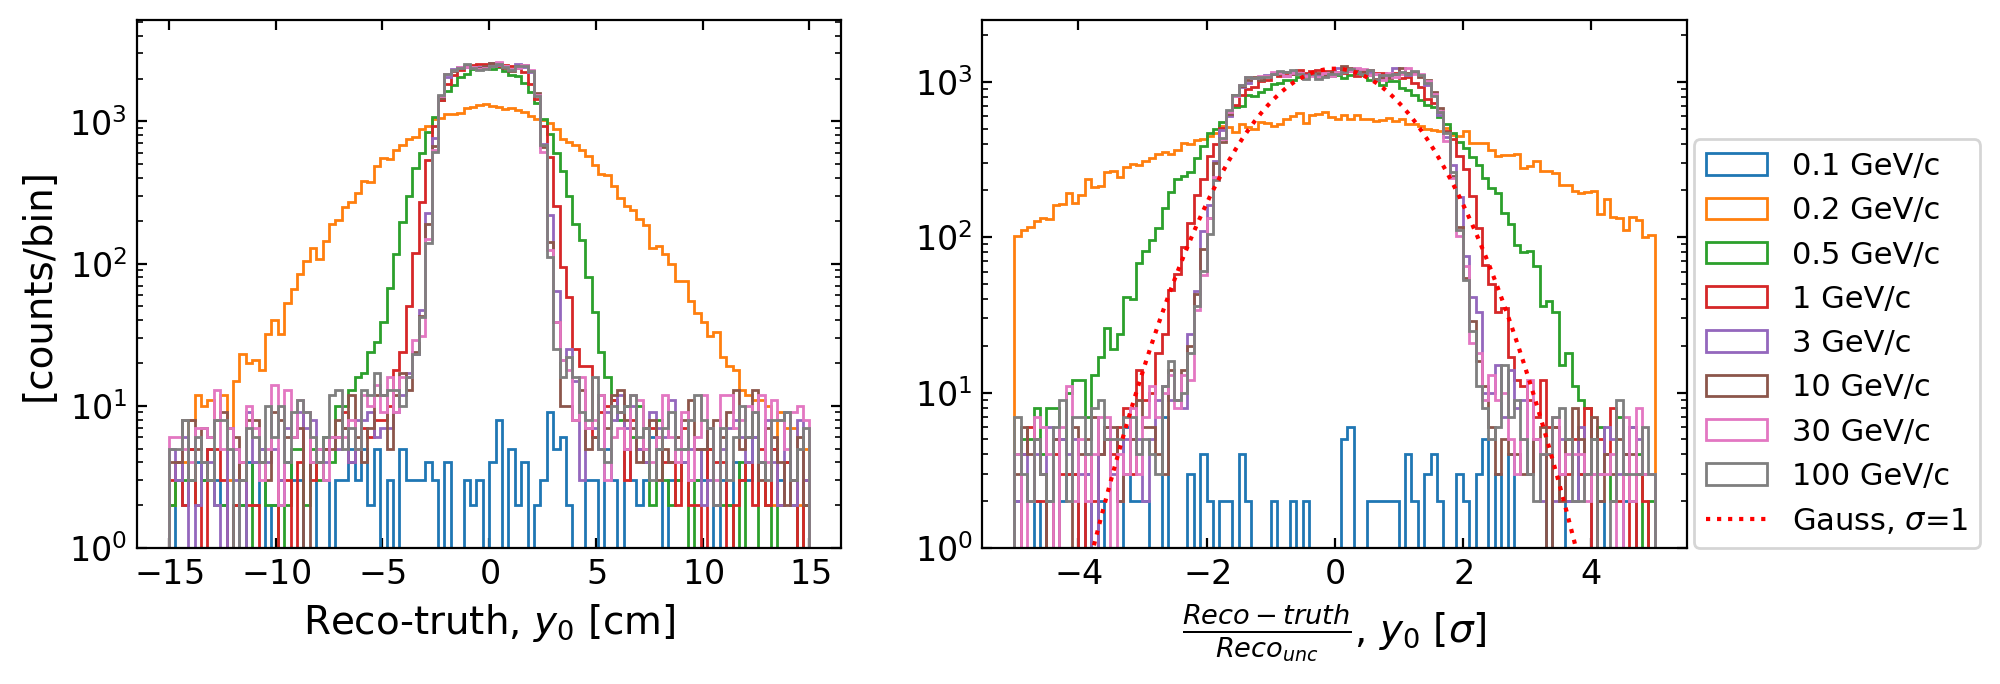

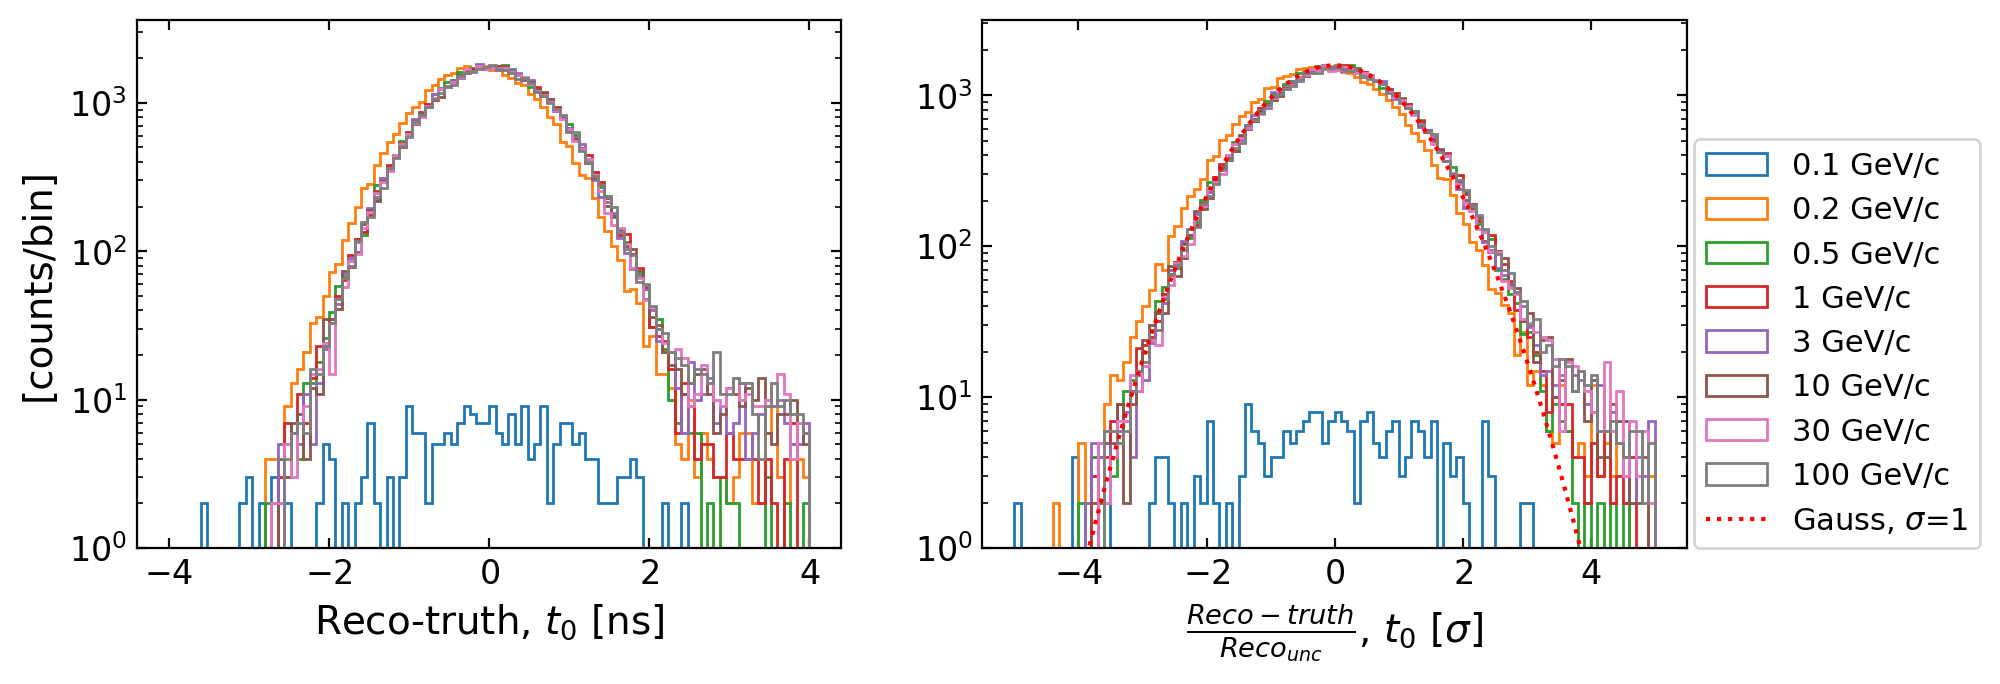

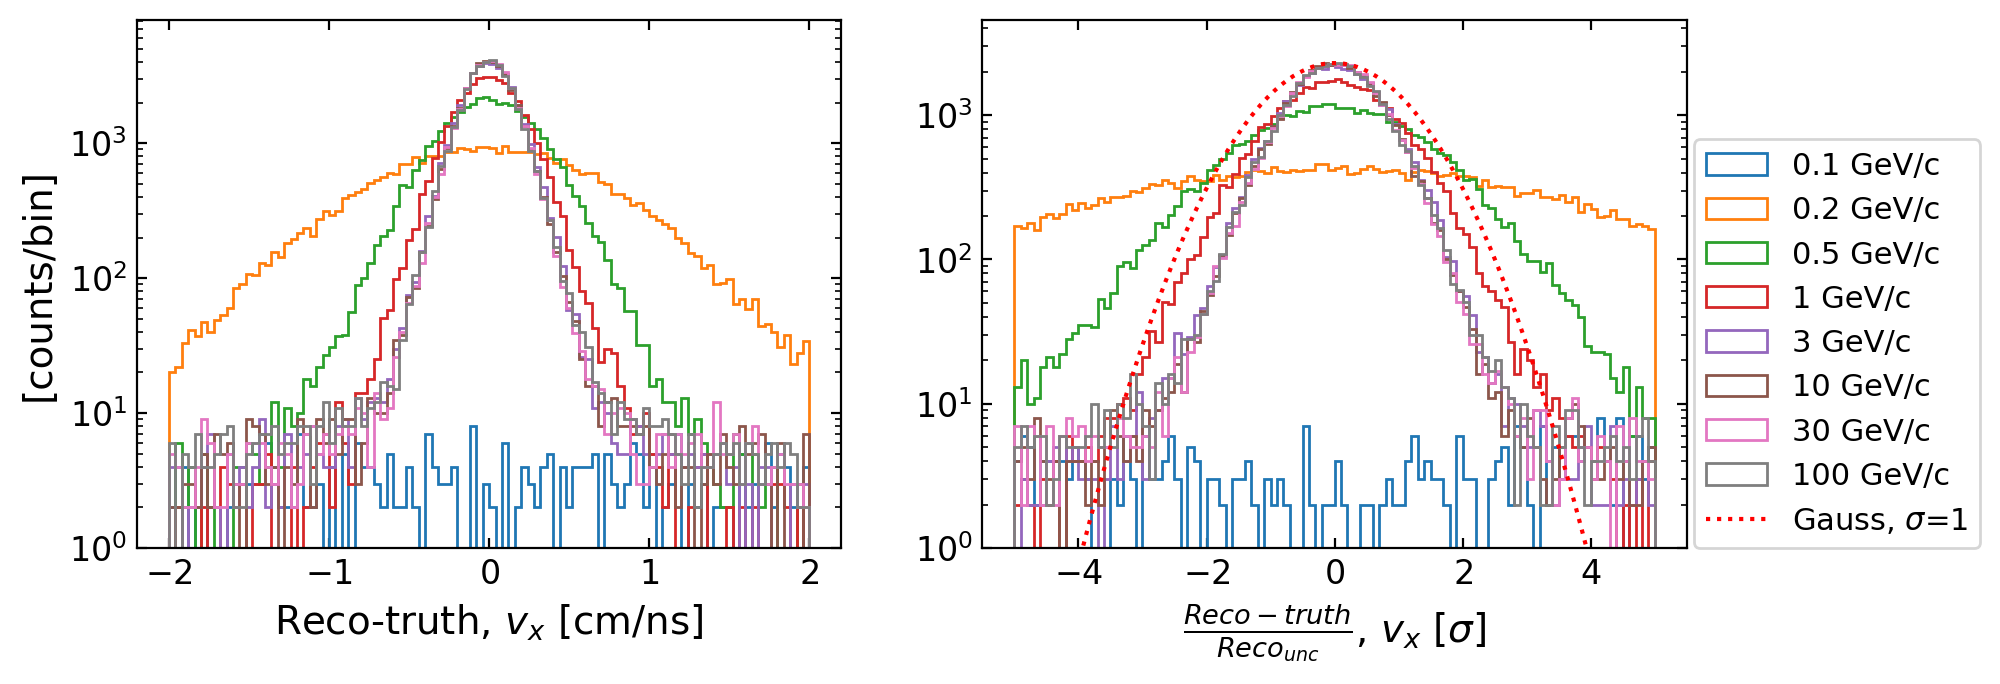

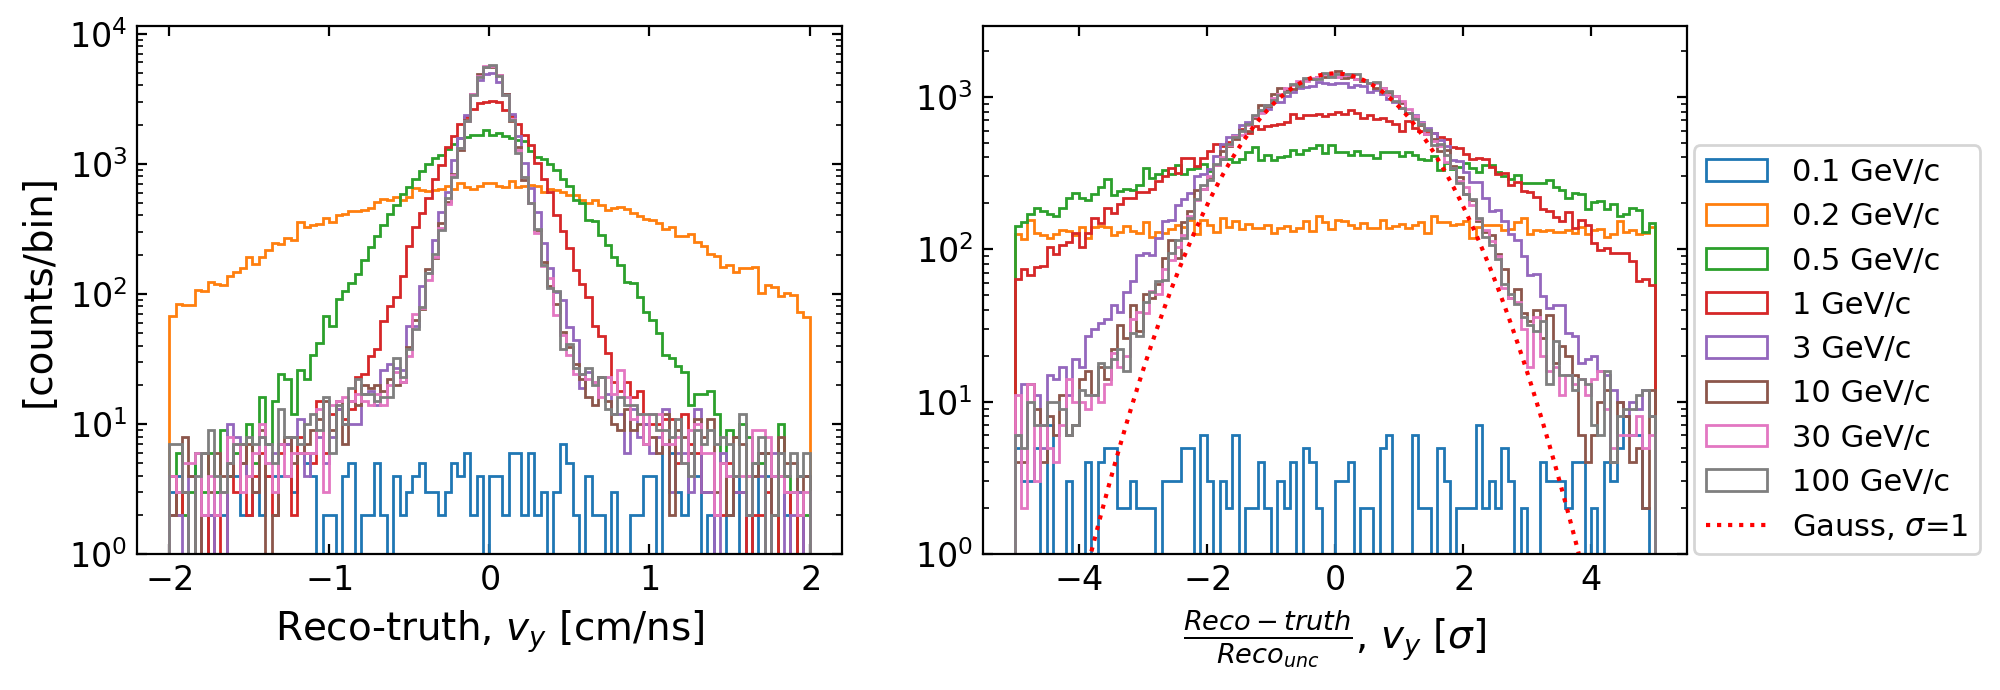

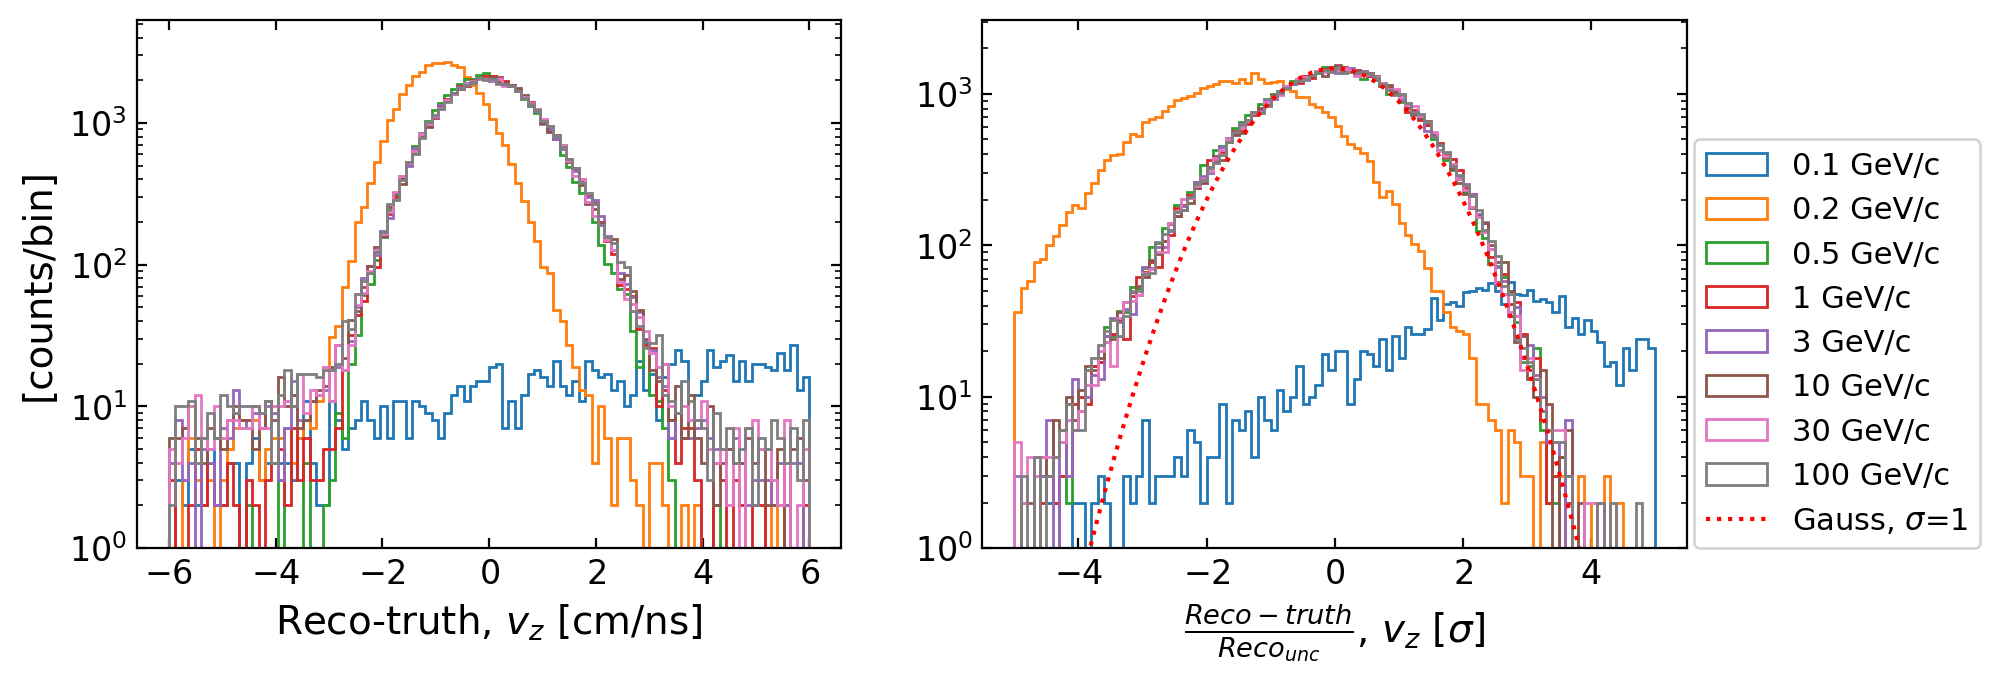

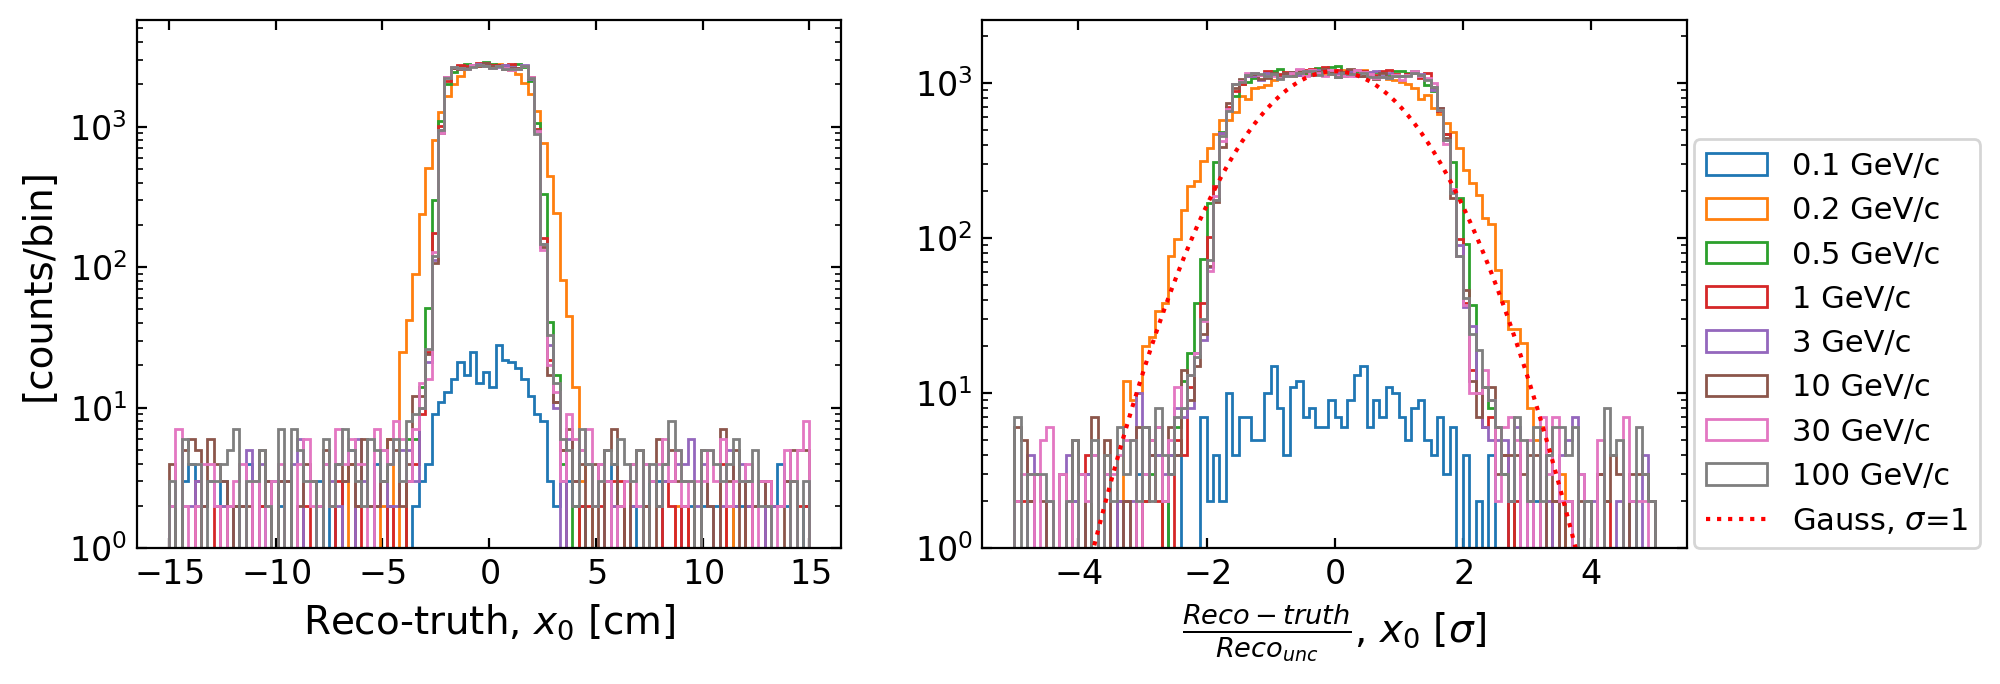

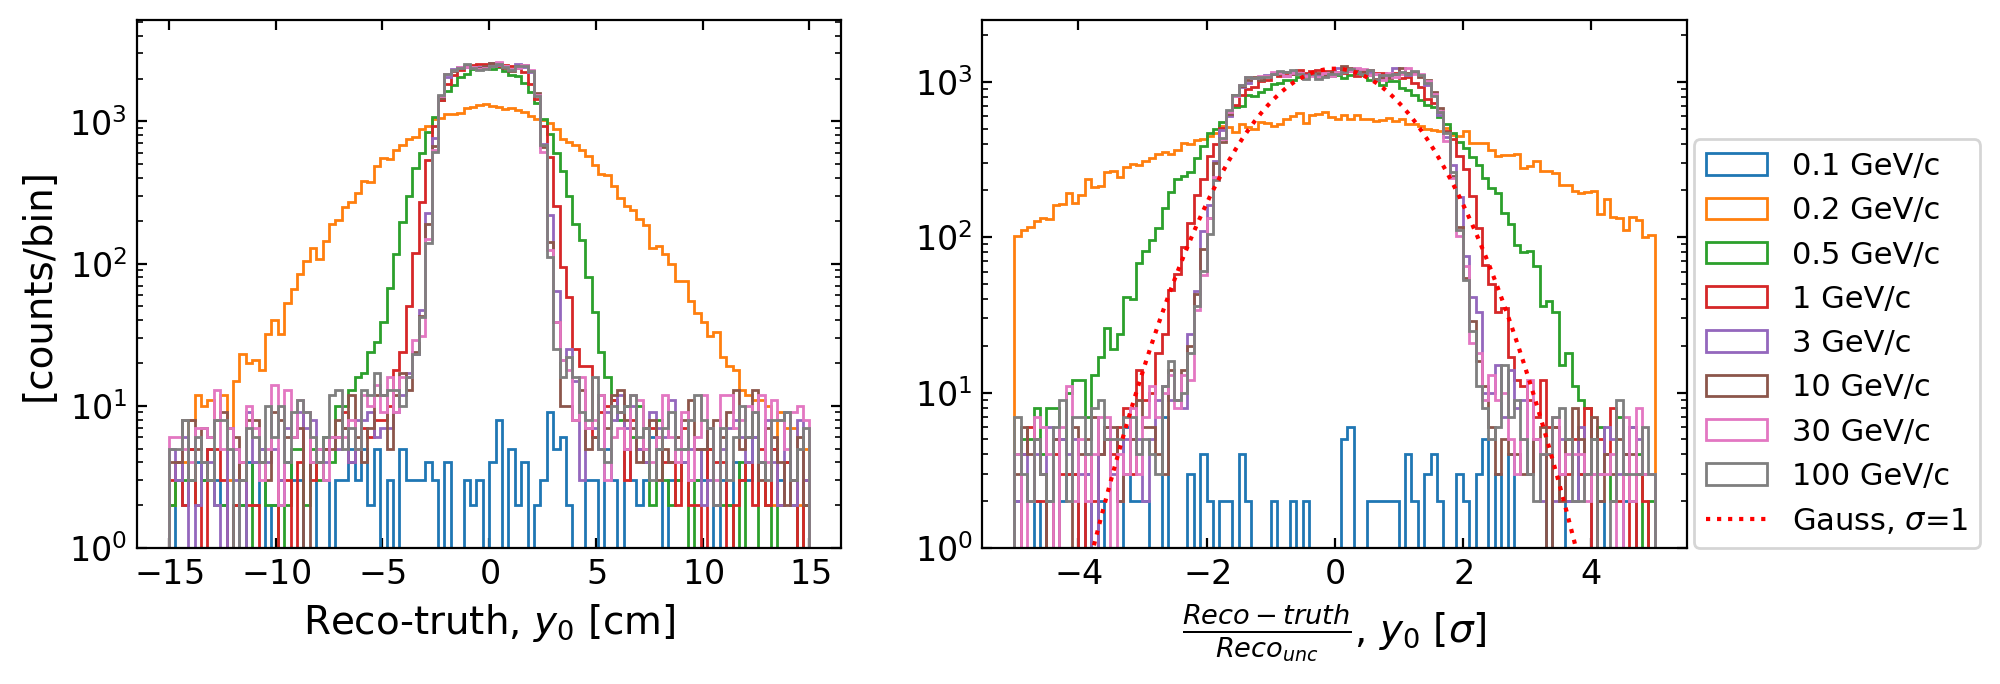

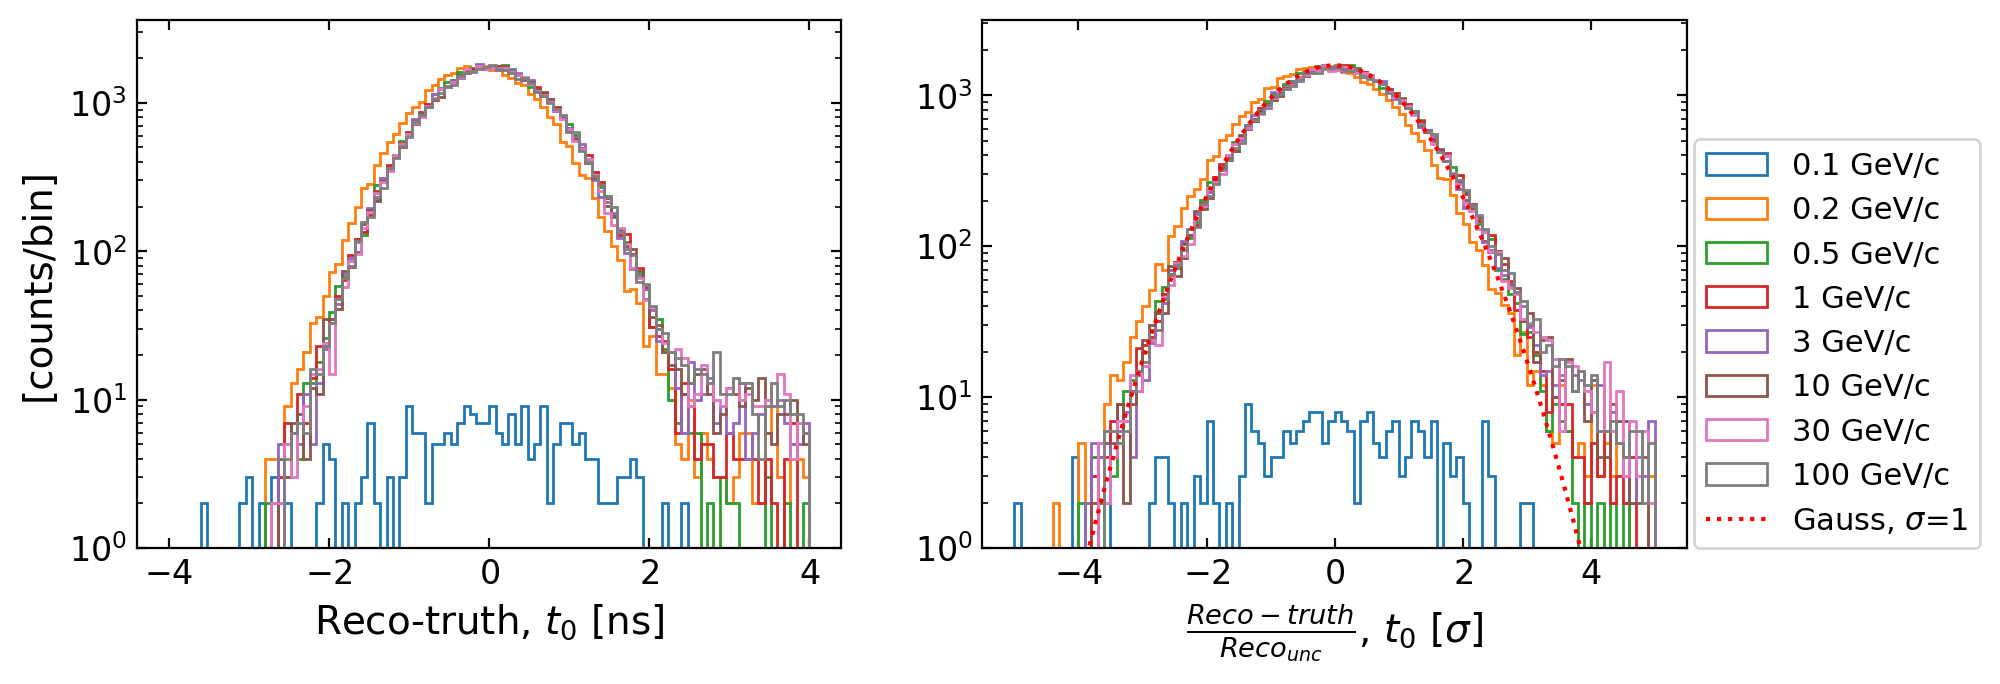

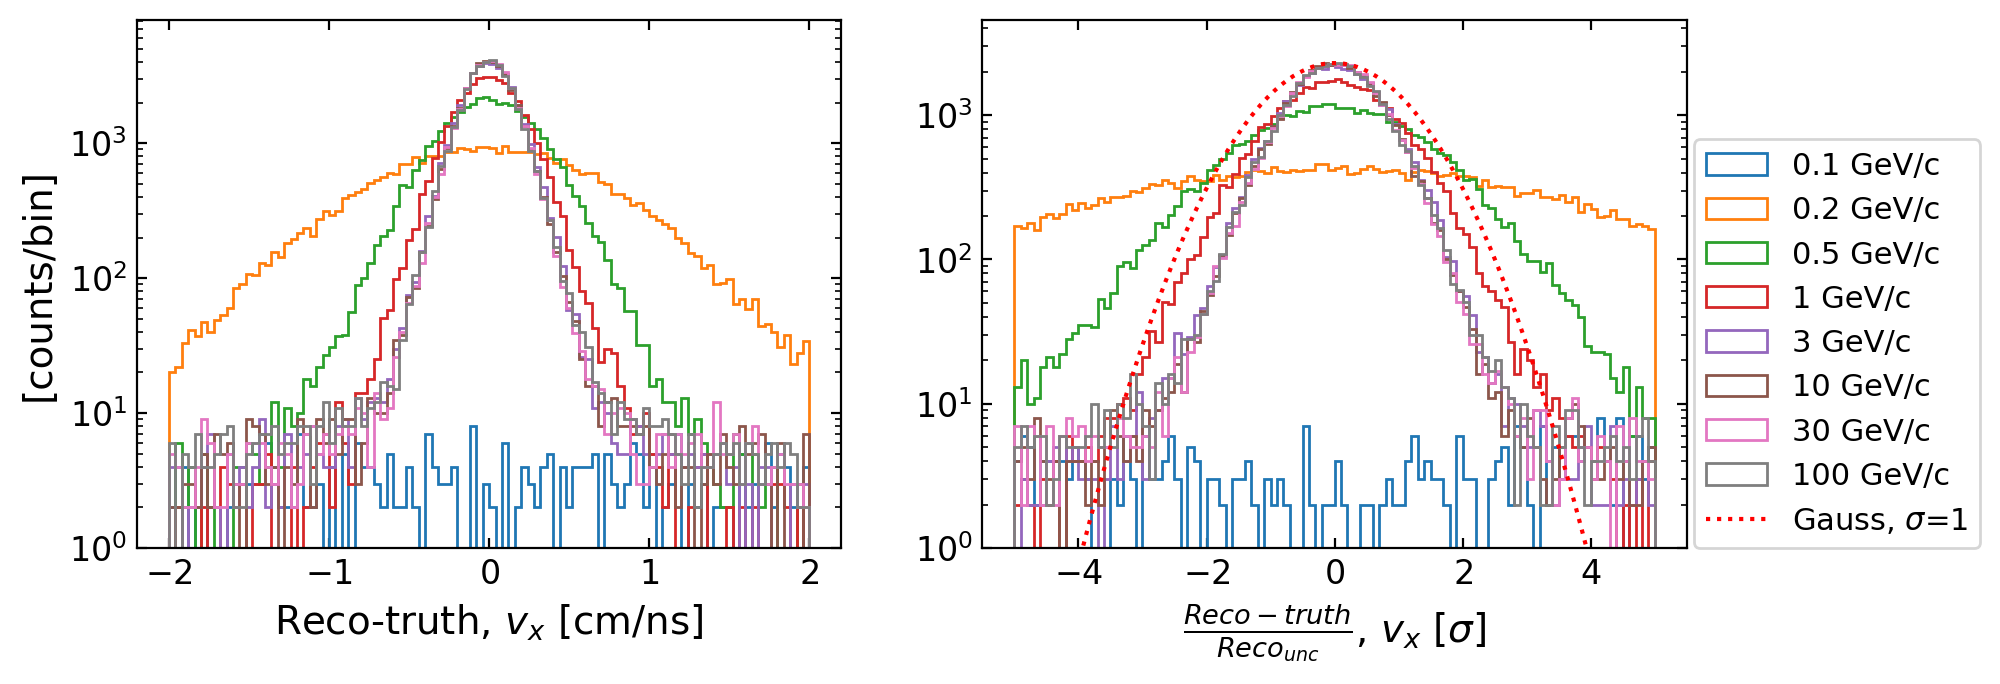

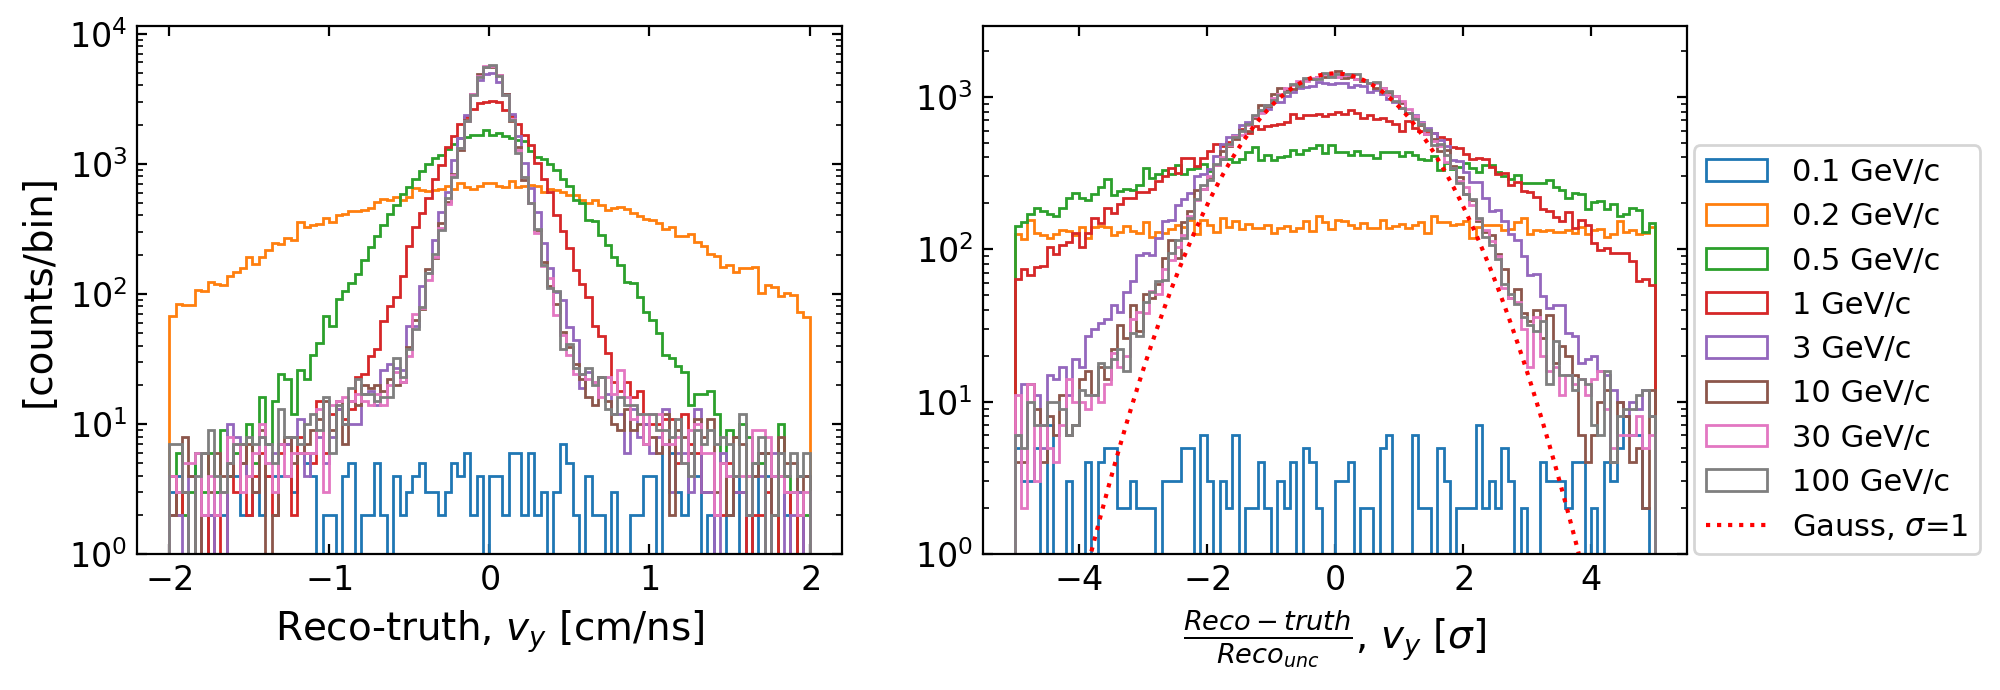

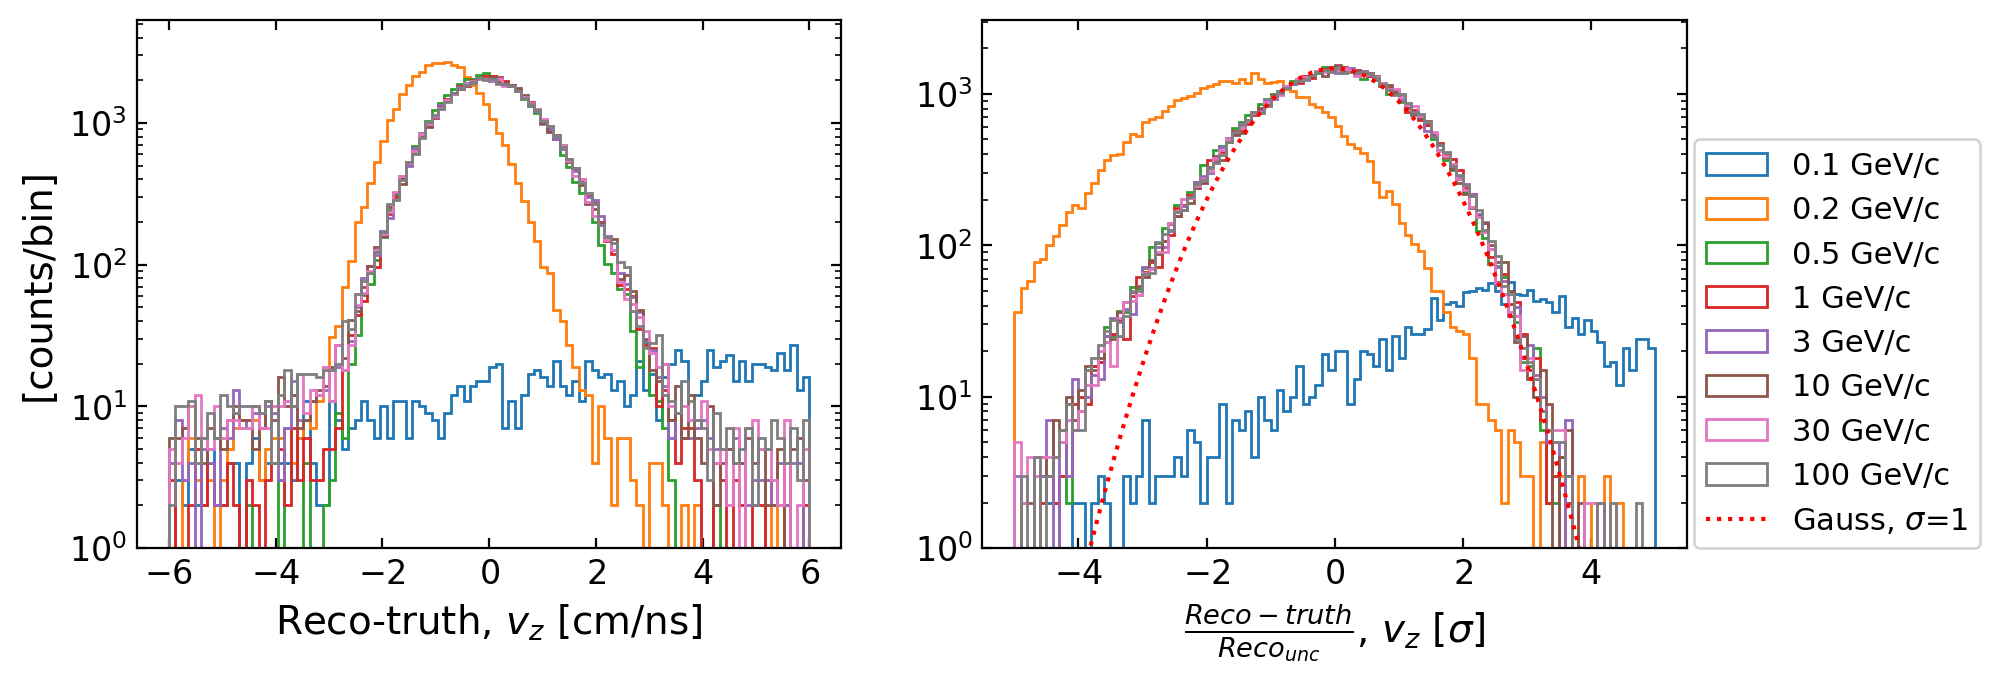

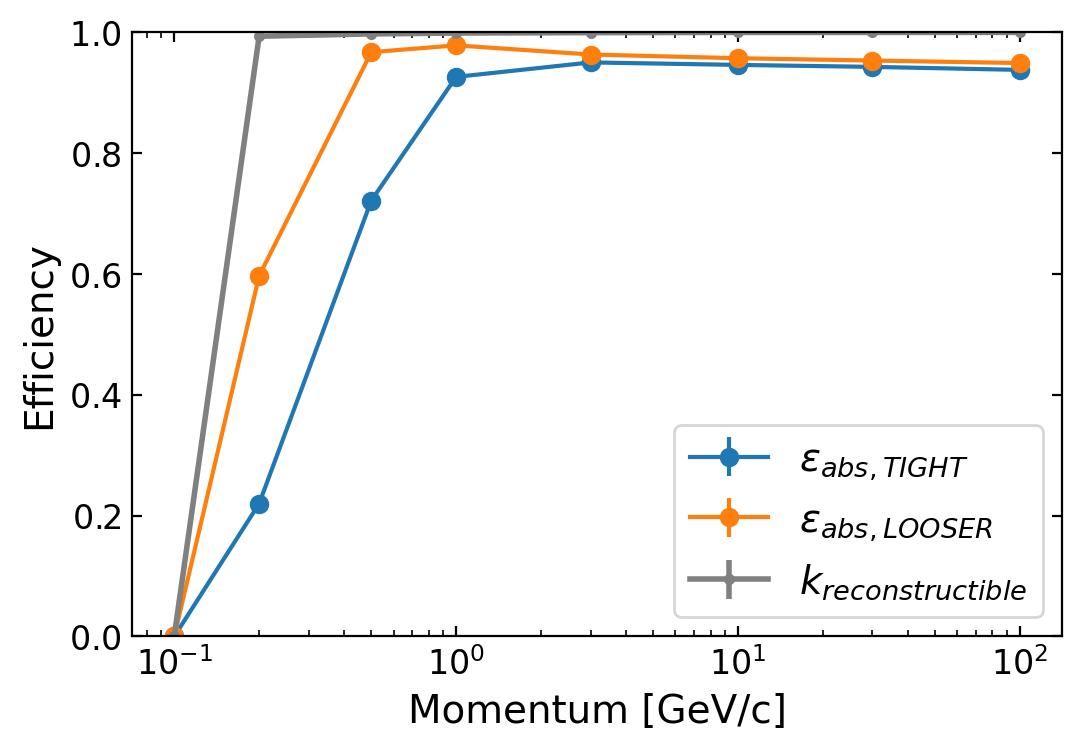

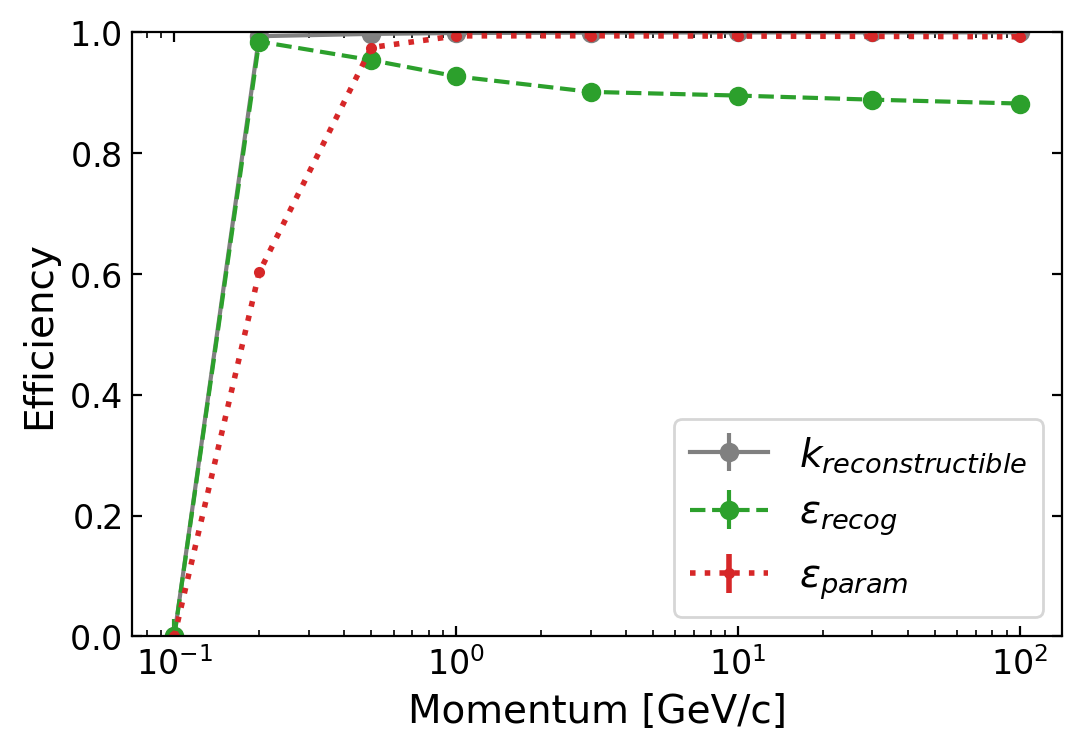

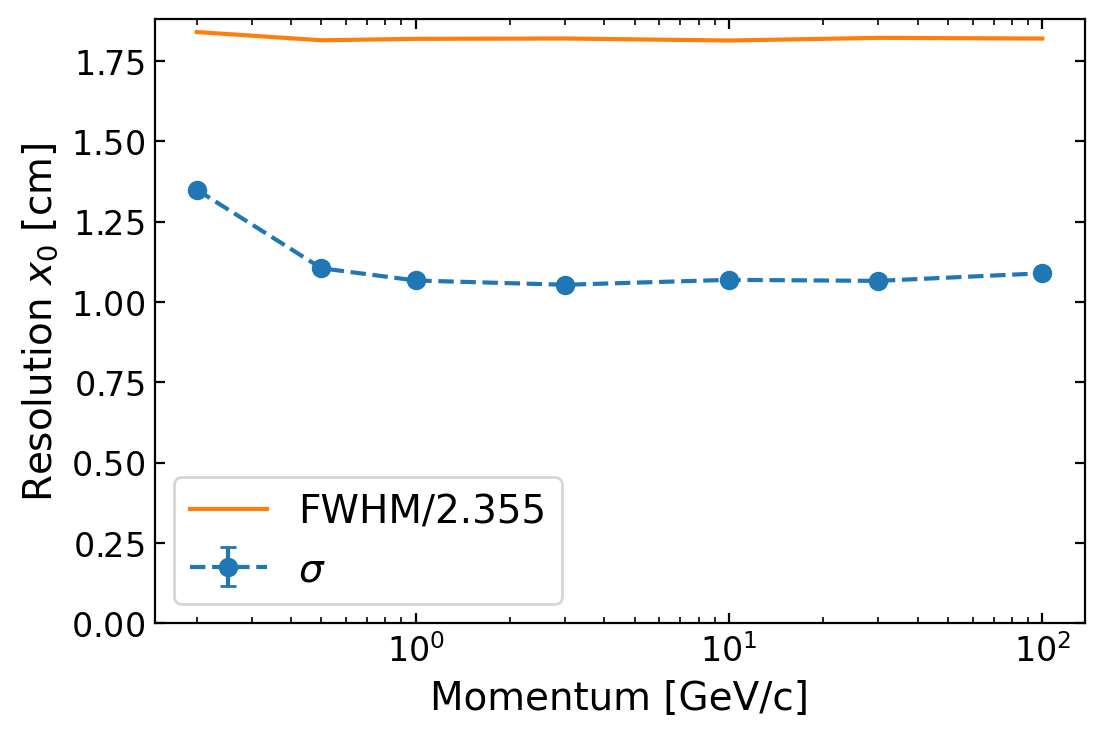

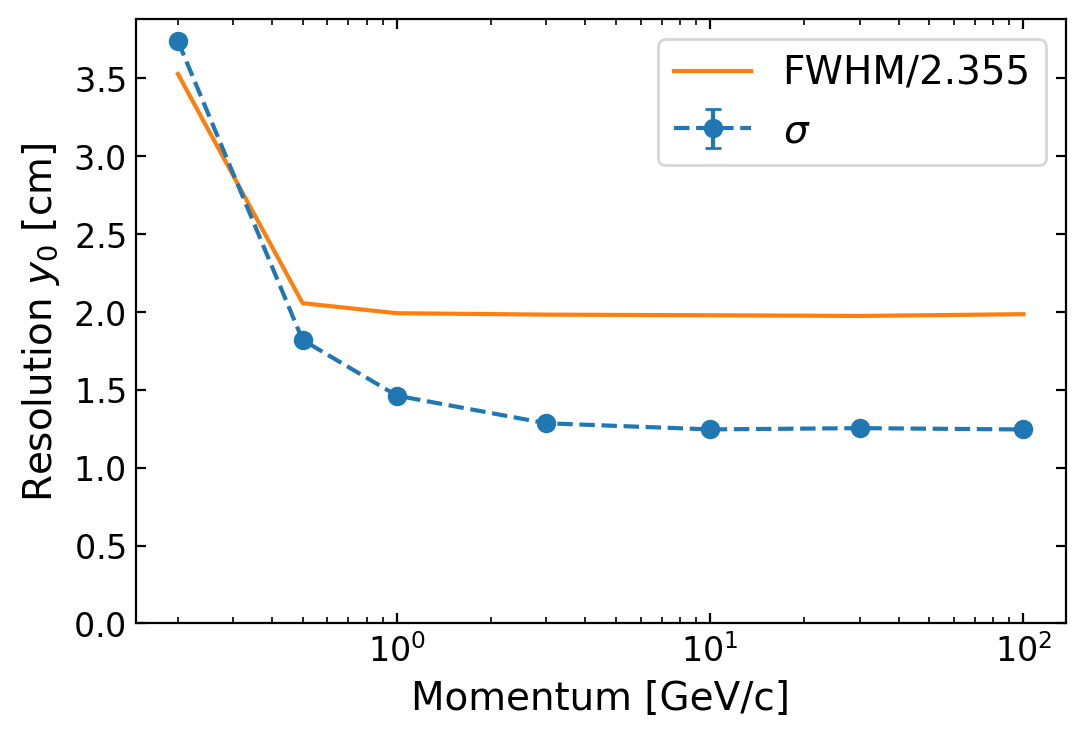

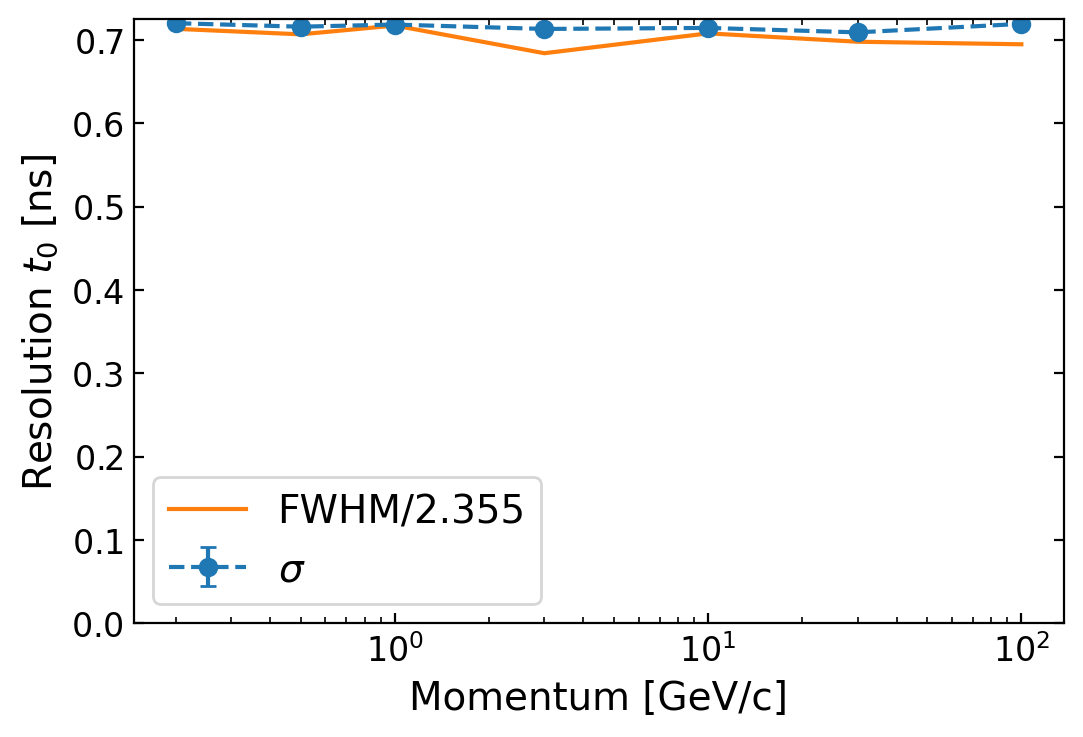

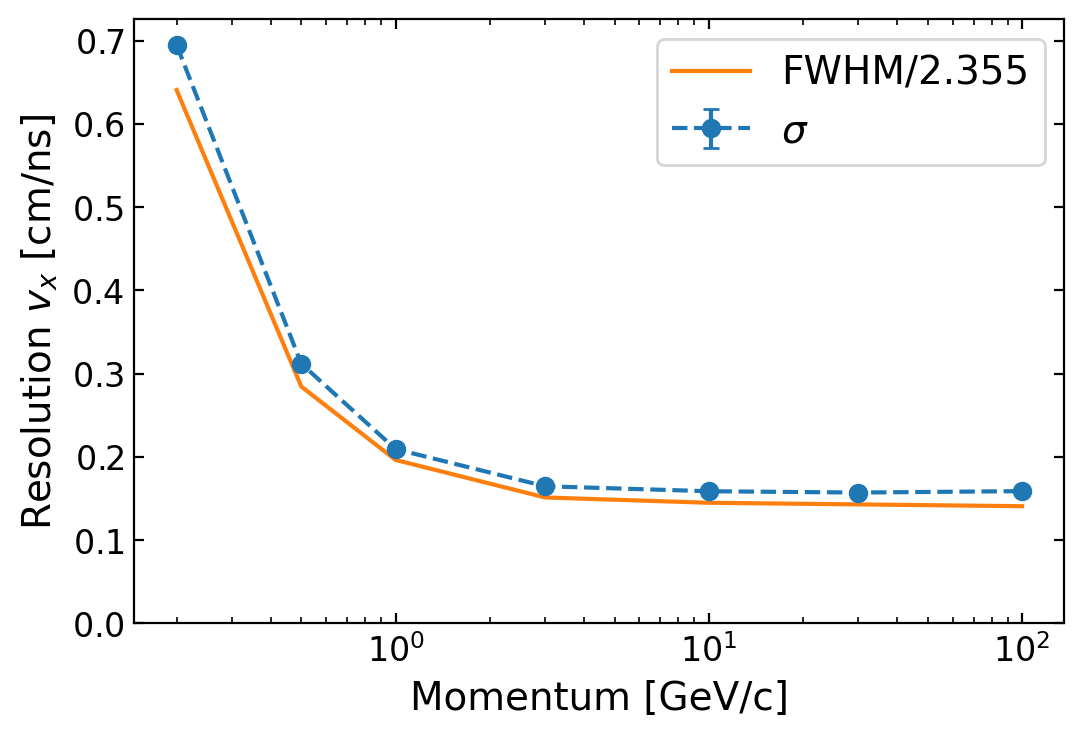

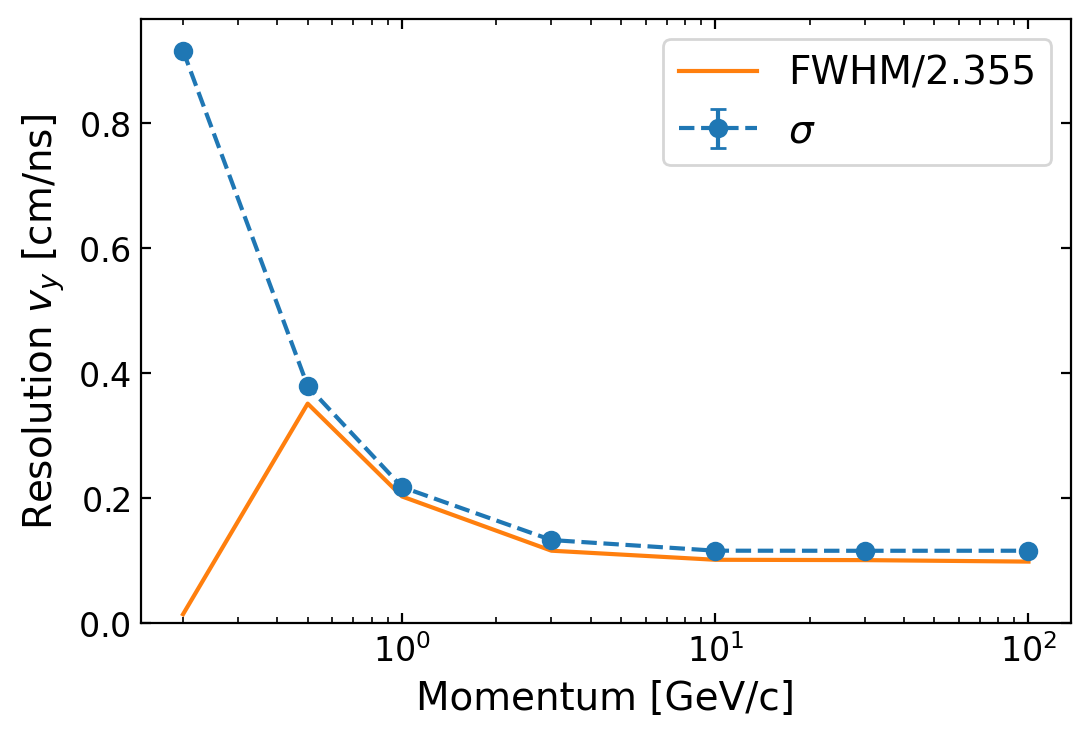

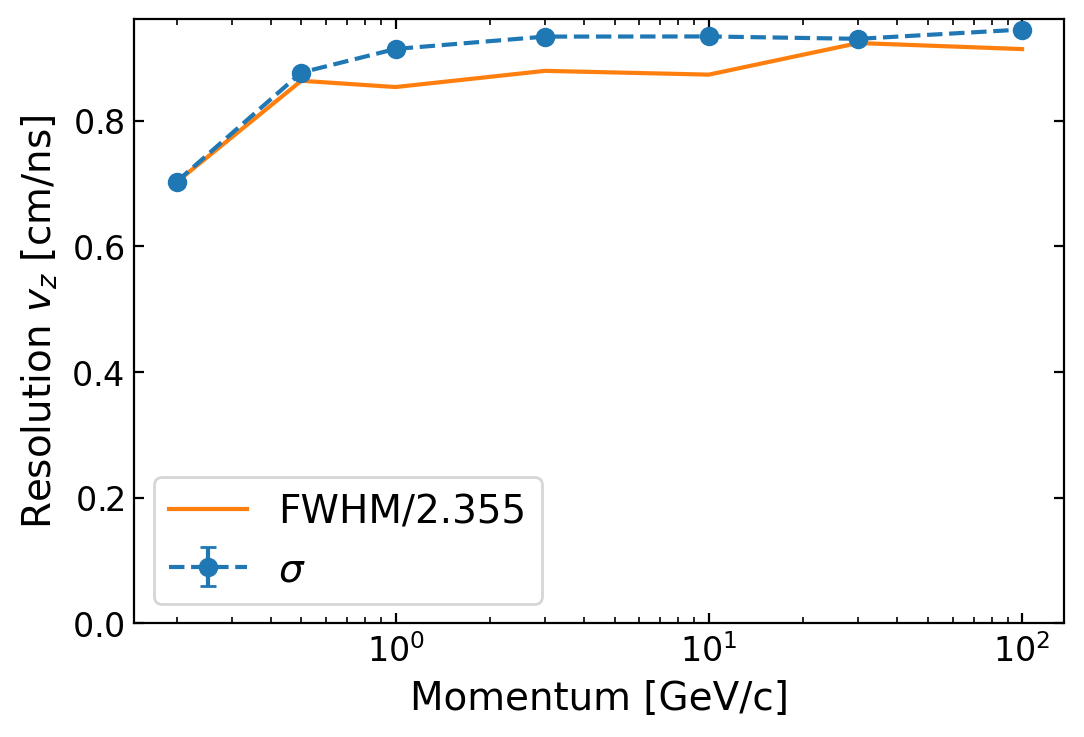

------------Reading pion files--------------


  0%|          | 0/39981 [00:00<?, ?it/s]/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:249: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 39981/39981 [00:12<00:00, 3180.20it/s]
/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:258: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_fit[key]=np.array(results_fit[key])
100%|██████████| 40000/40000 [00:41<00:00, 973.78it/s] 


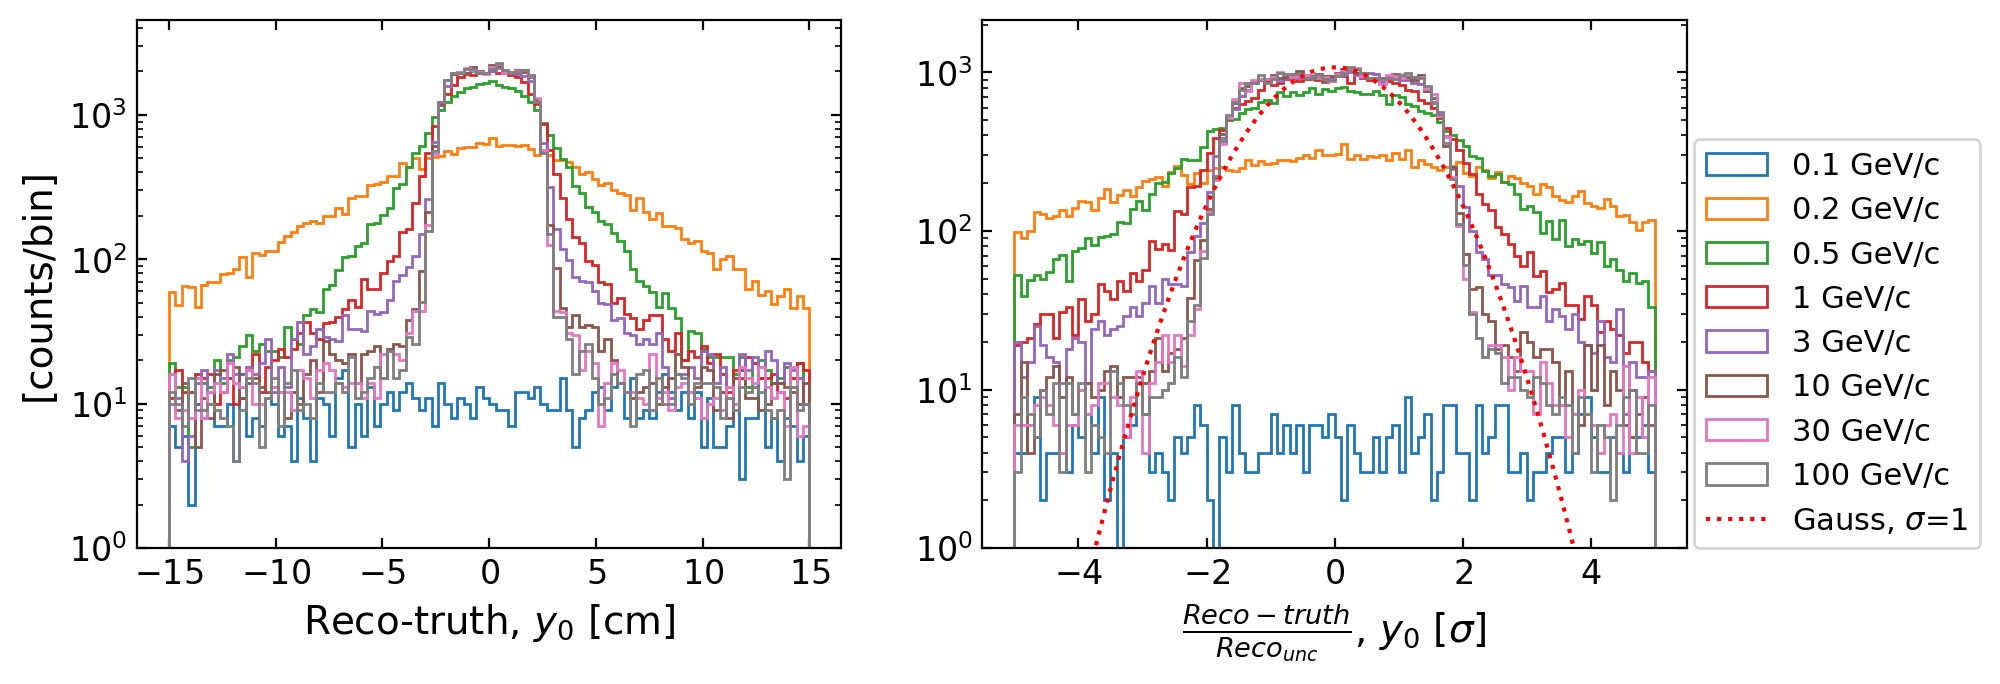

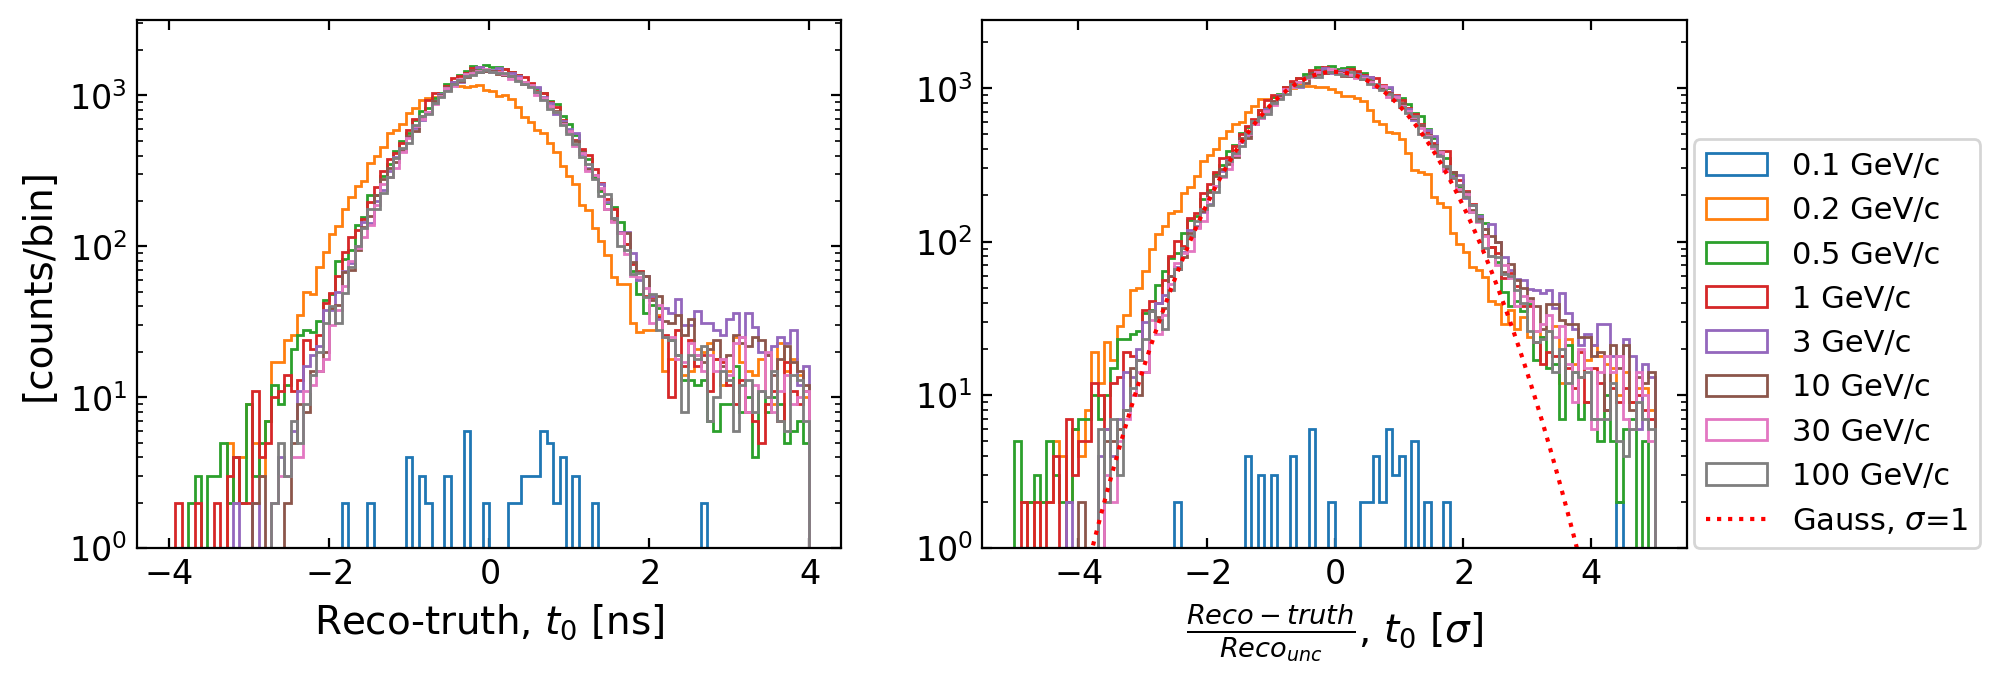

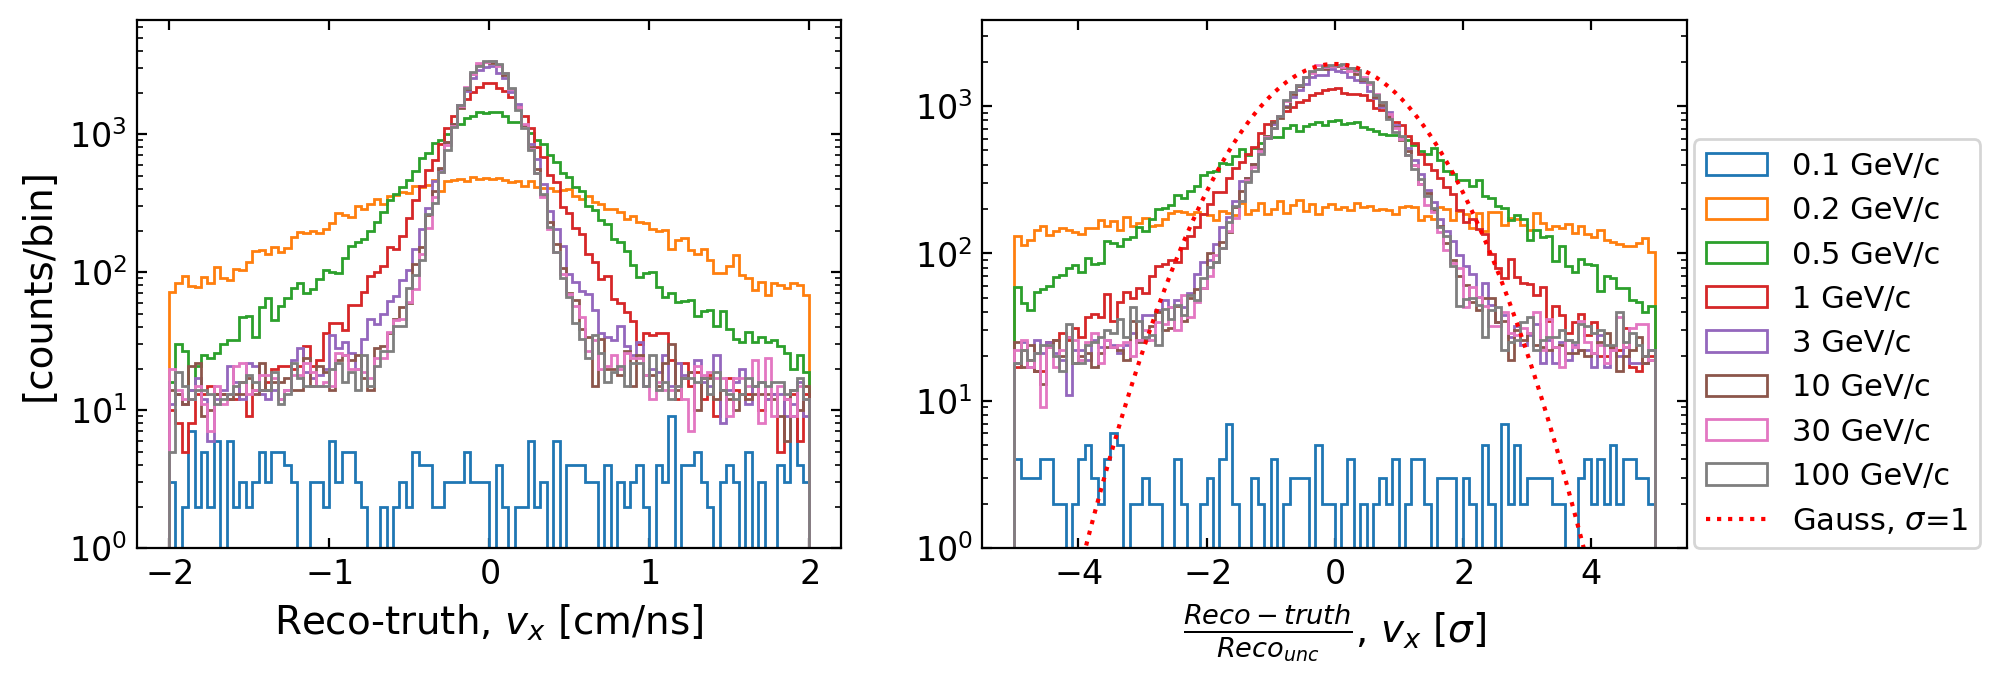

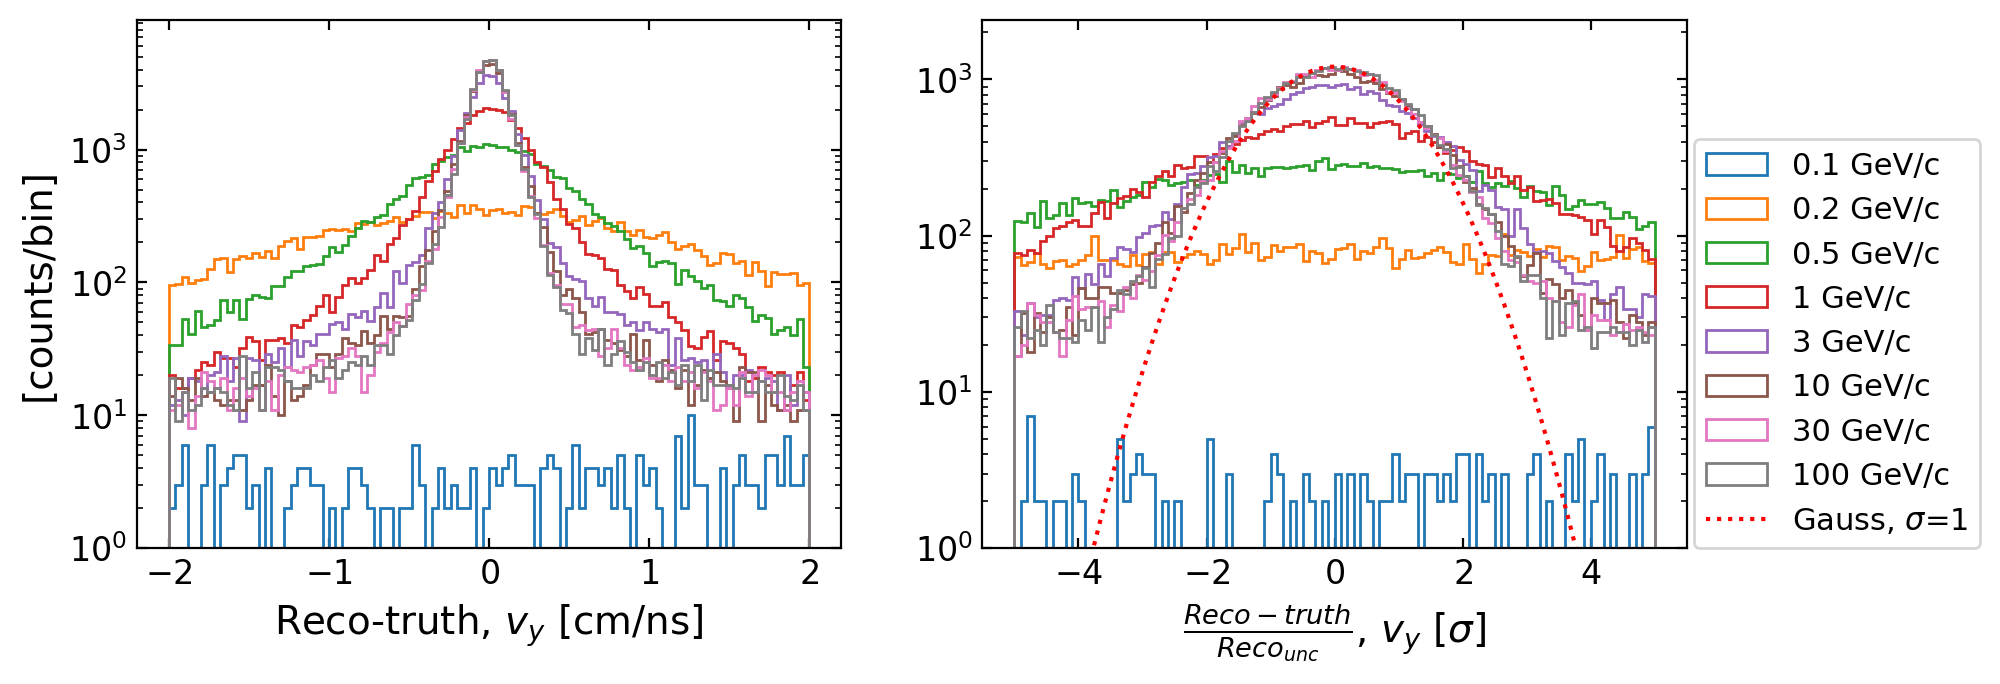

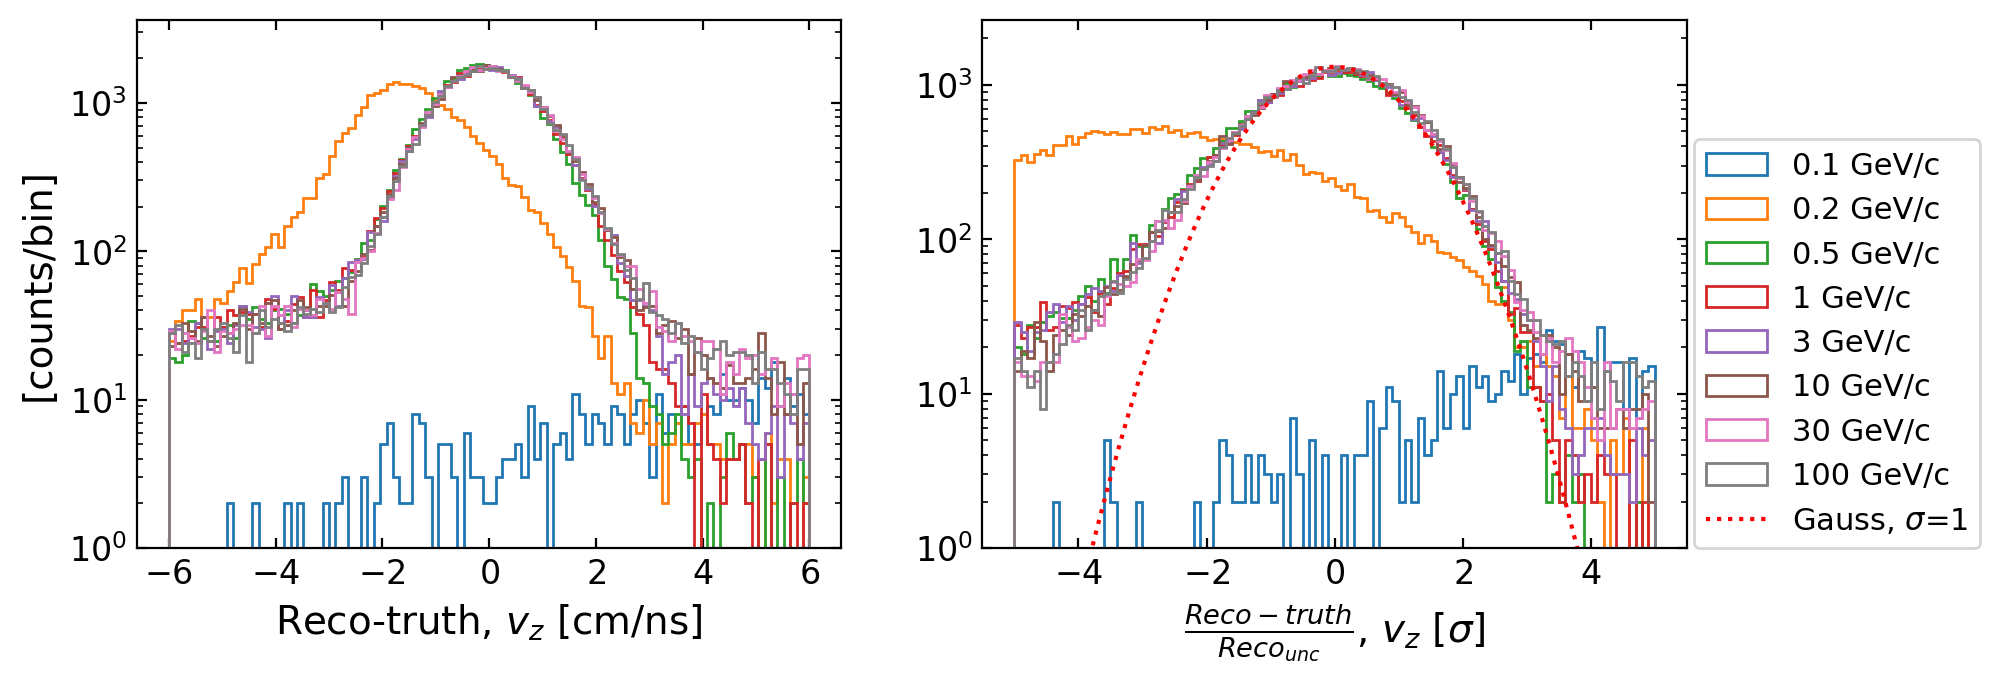

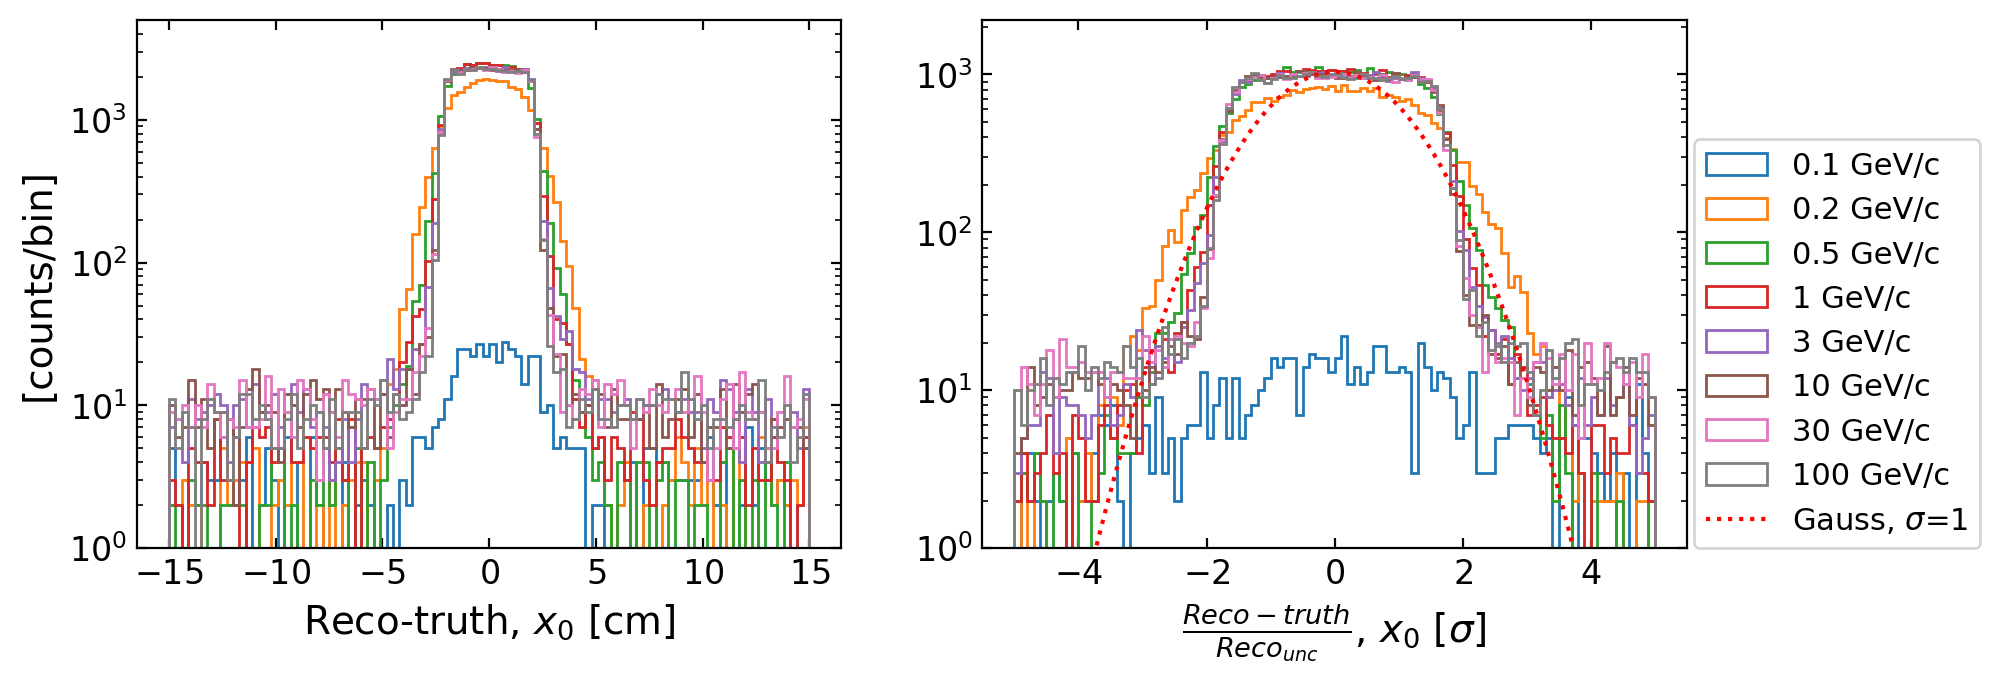

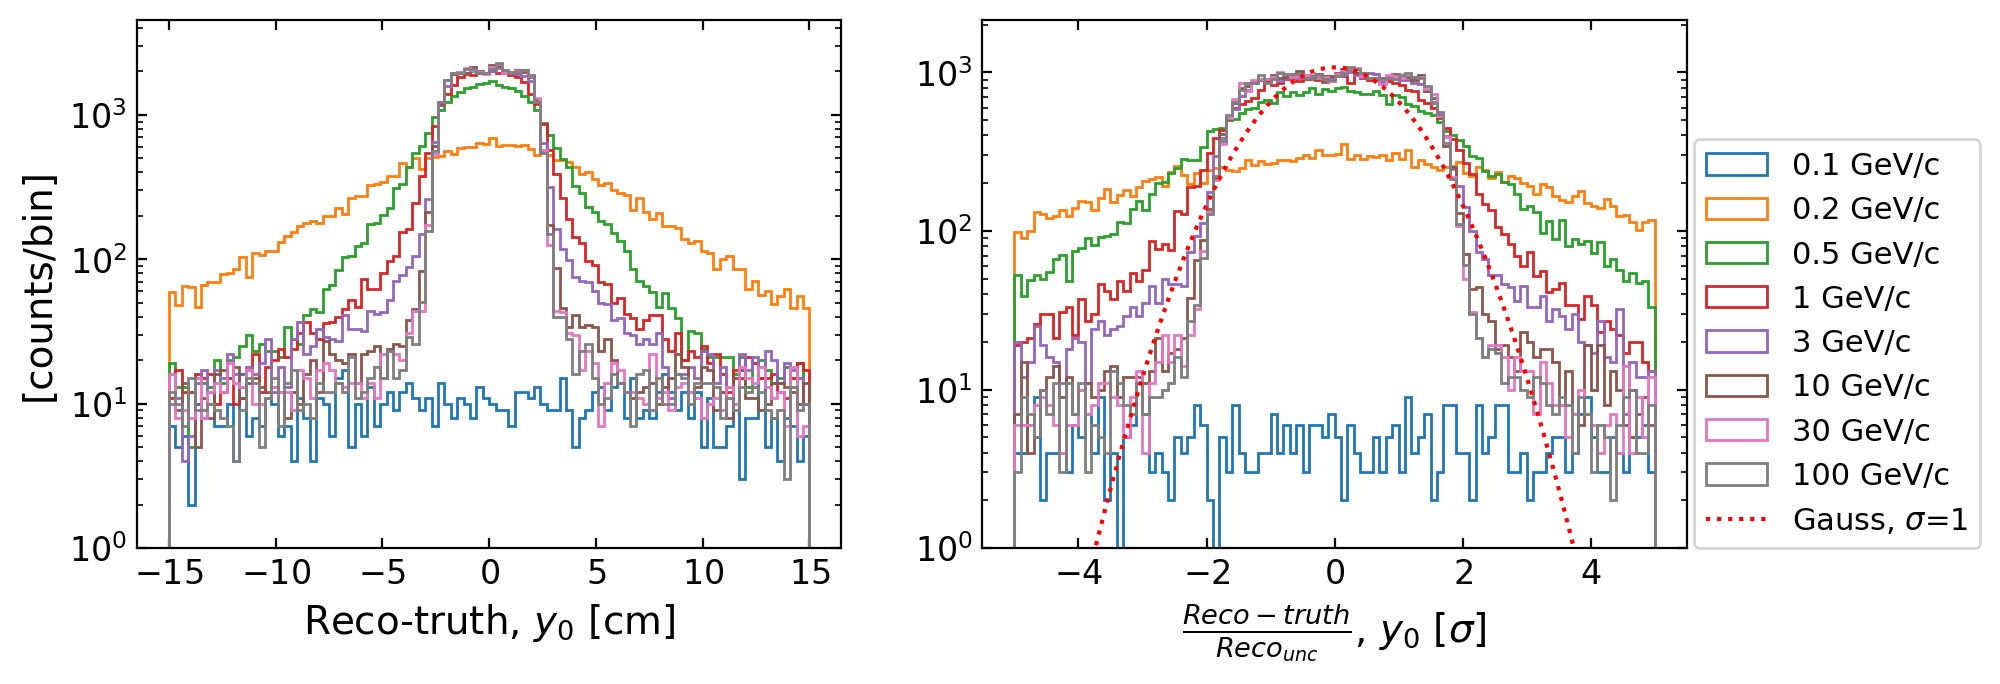

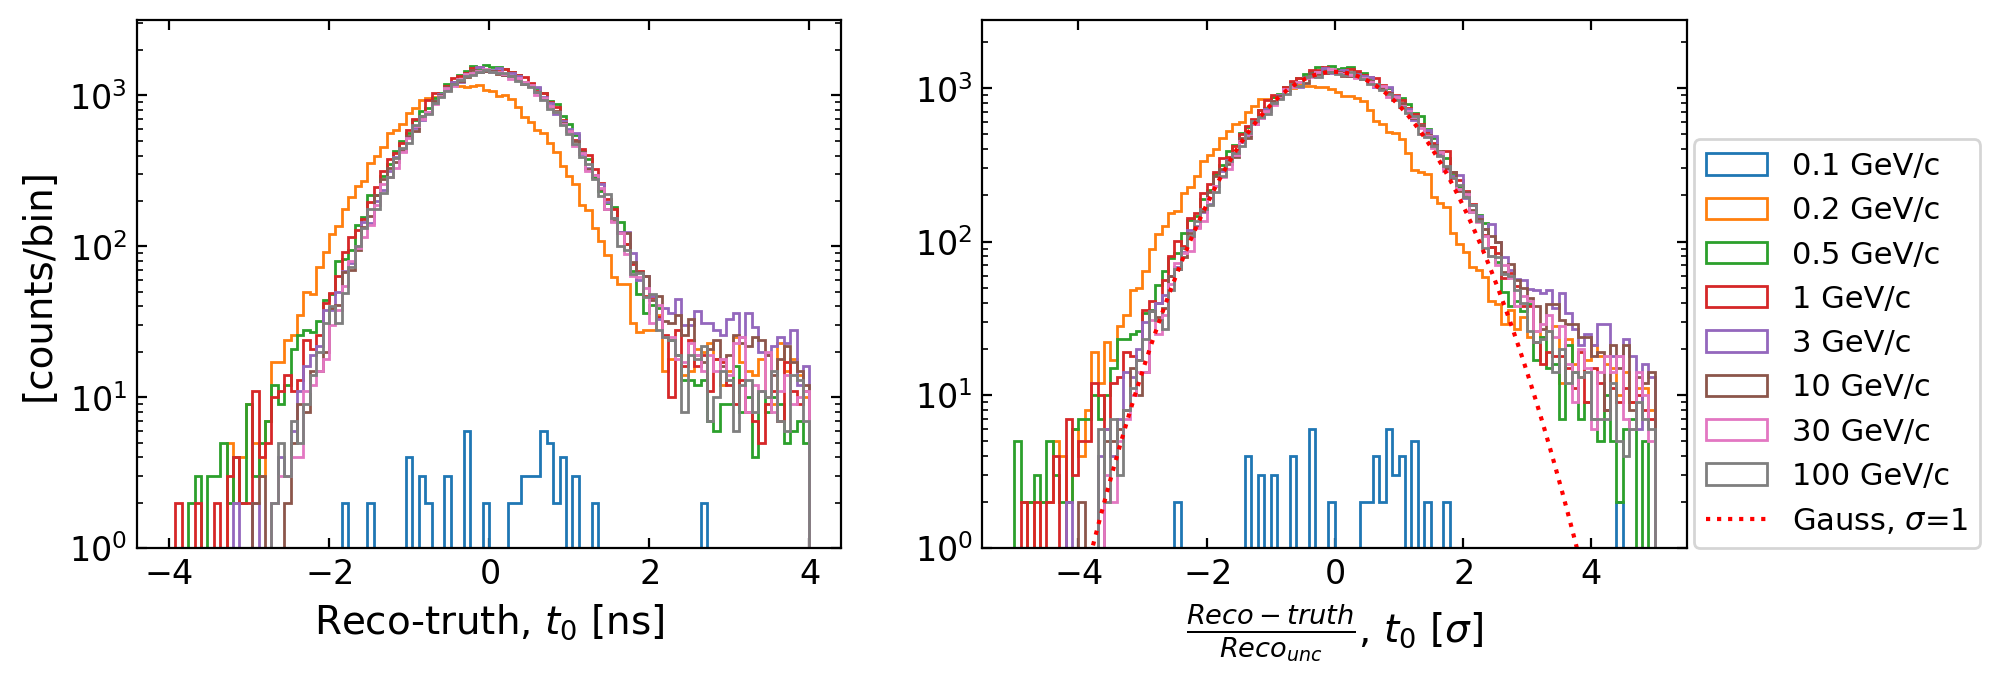

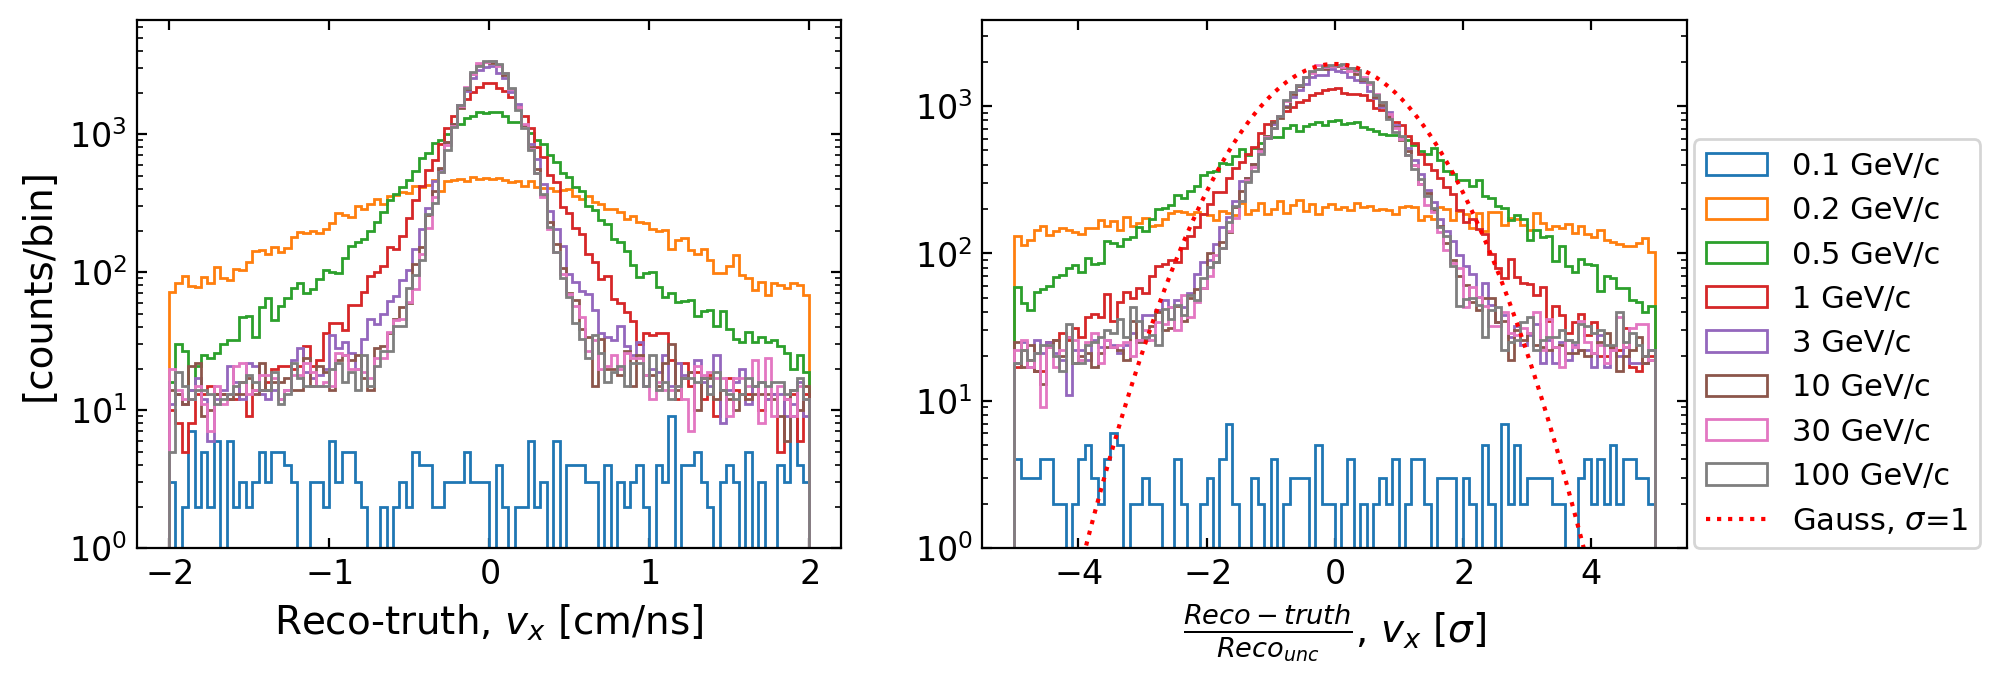

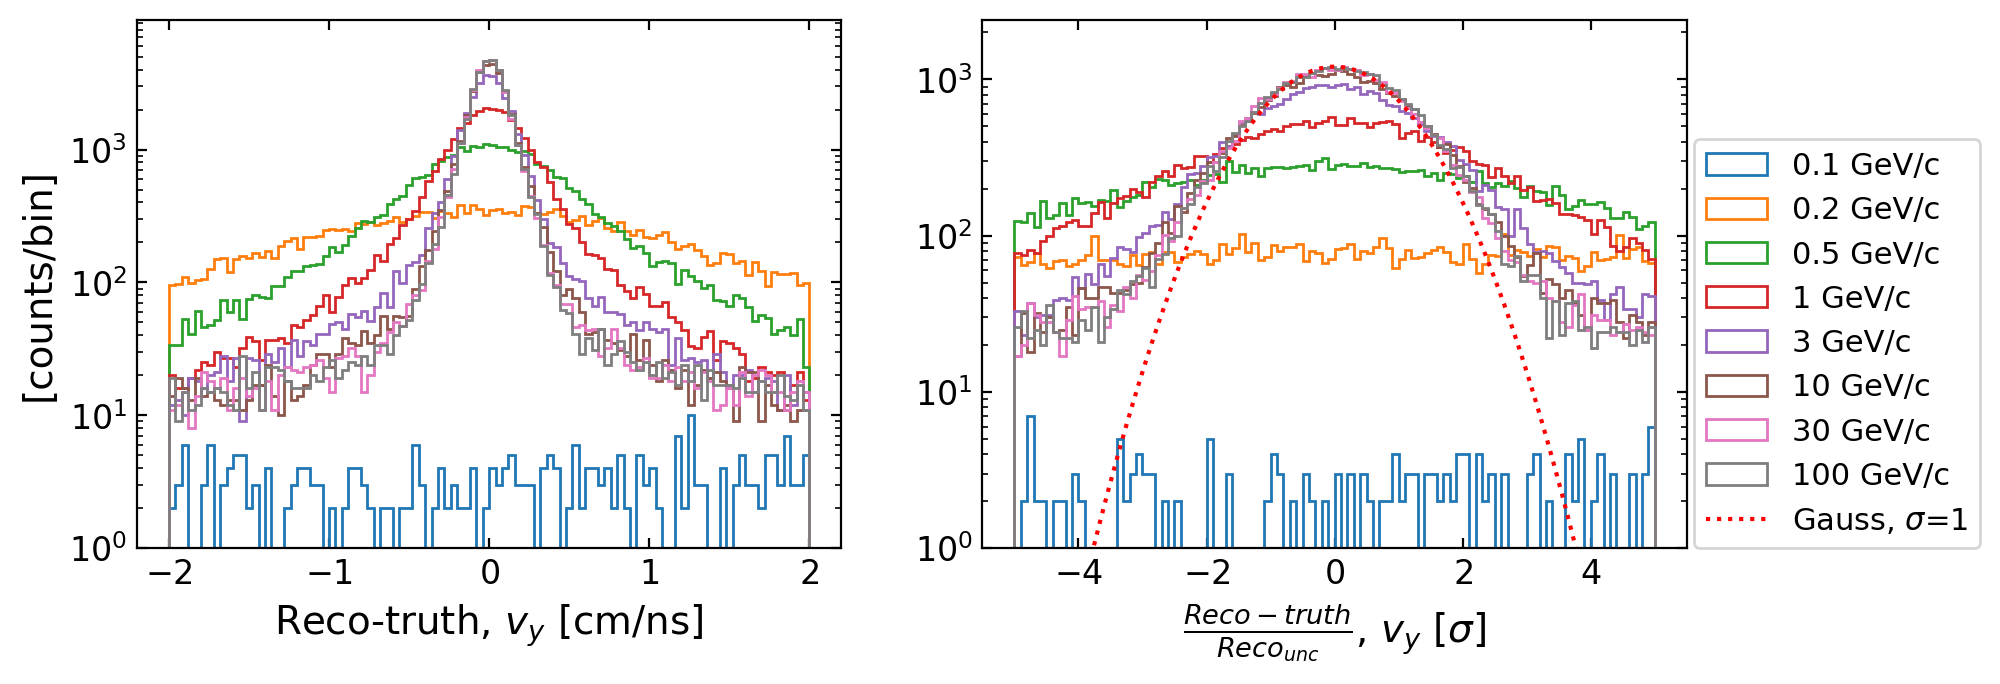

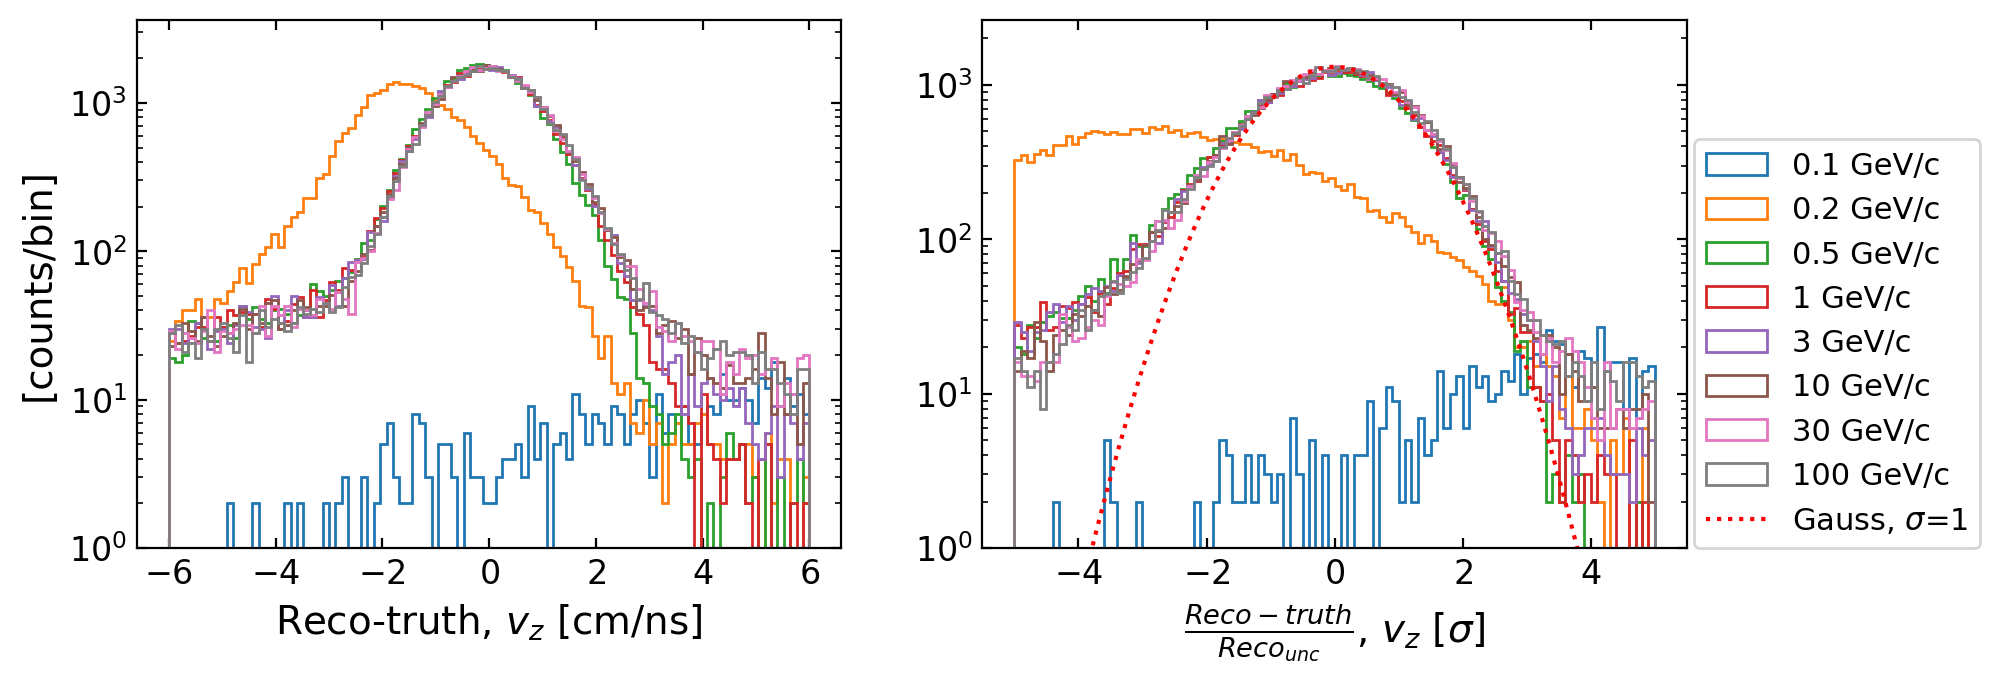

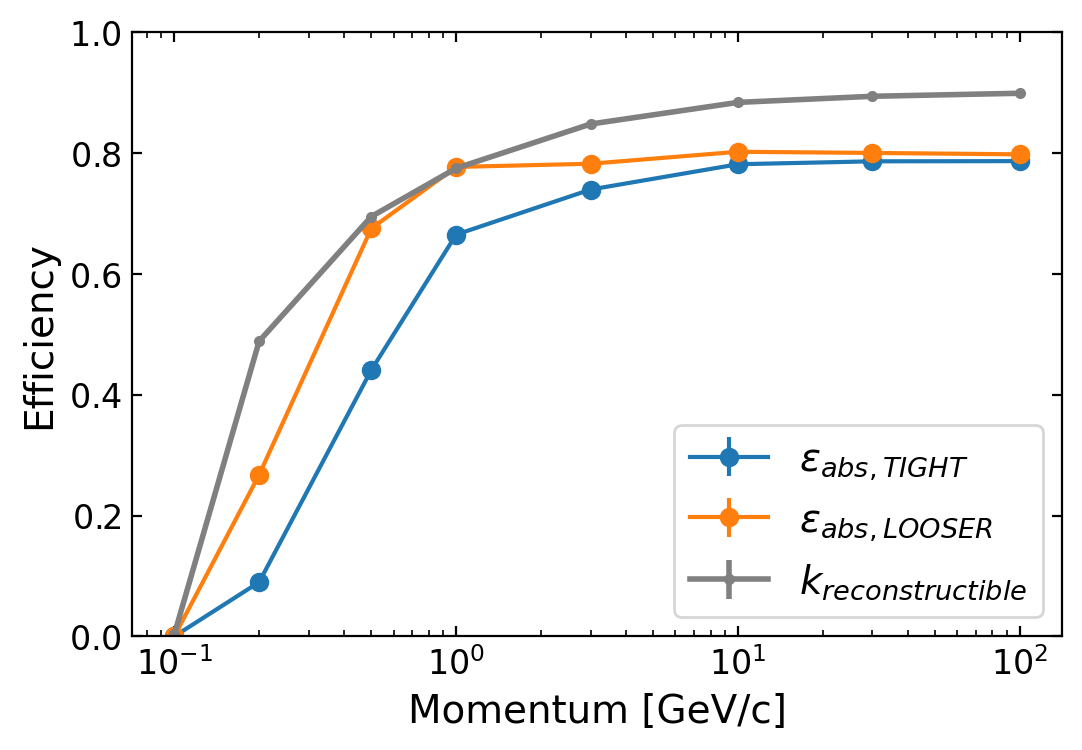

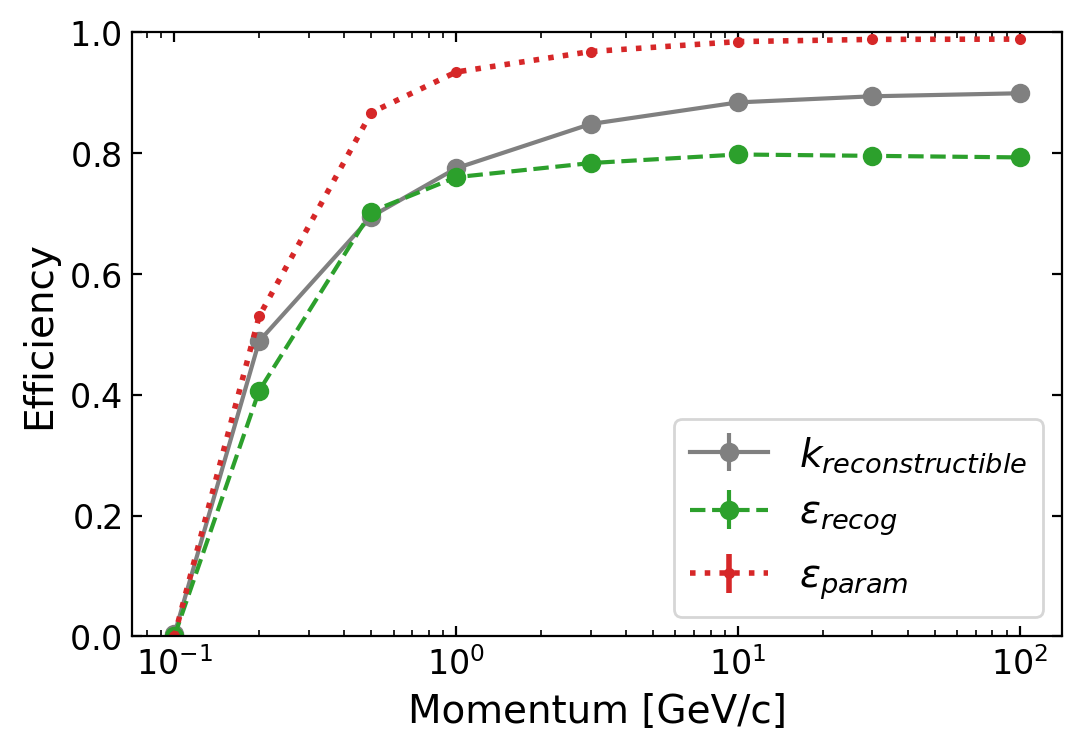

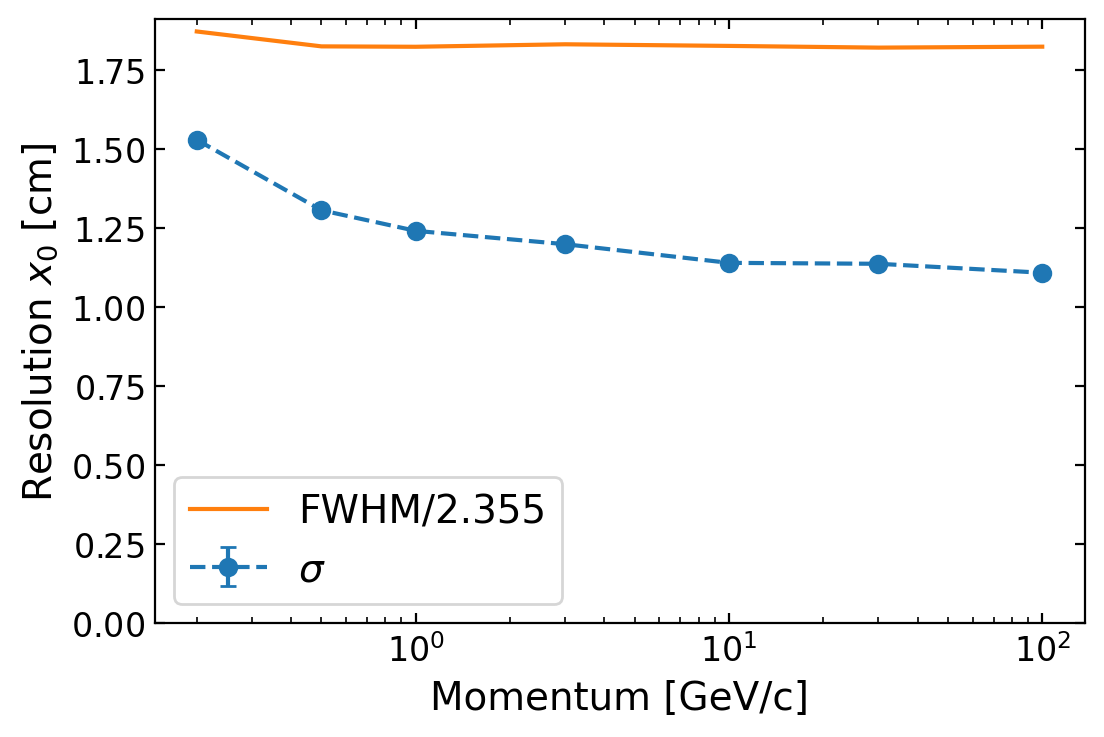

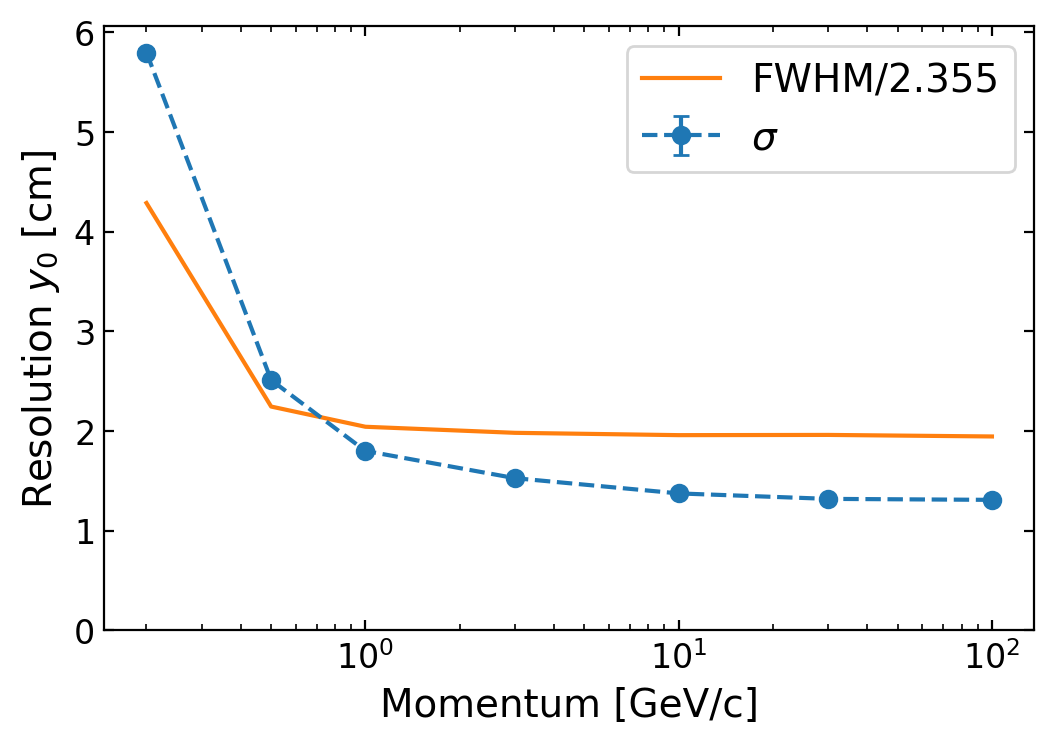

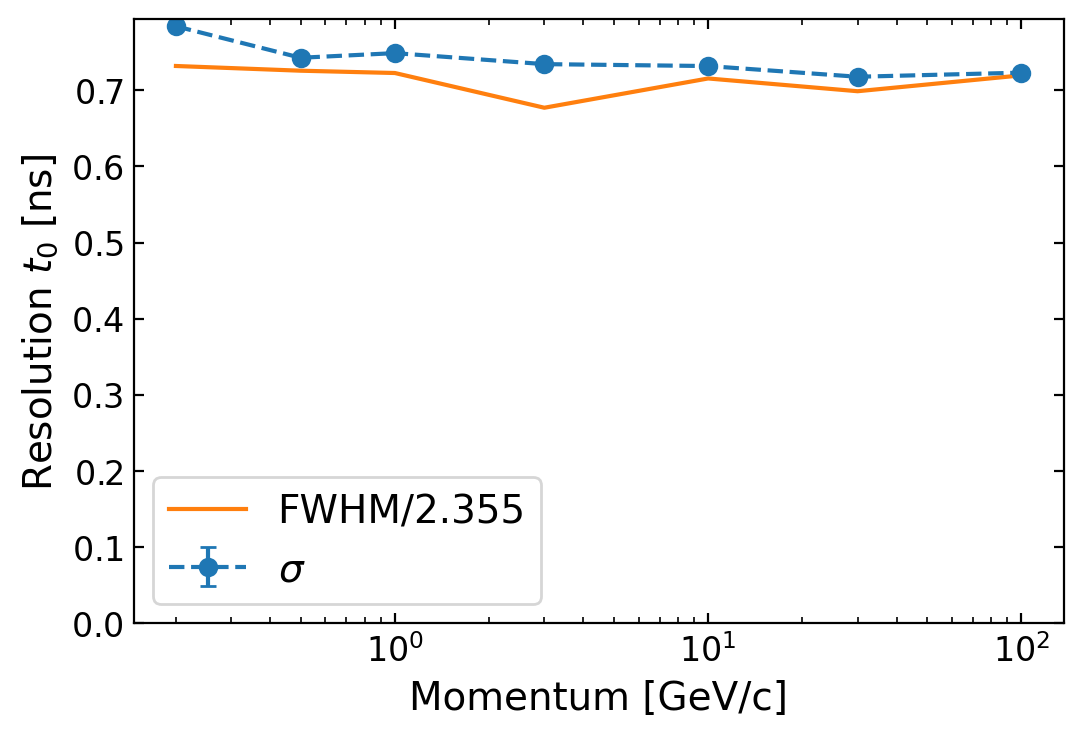

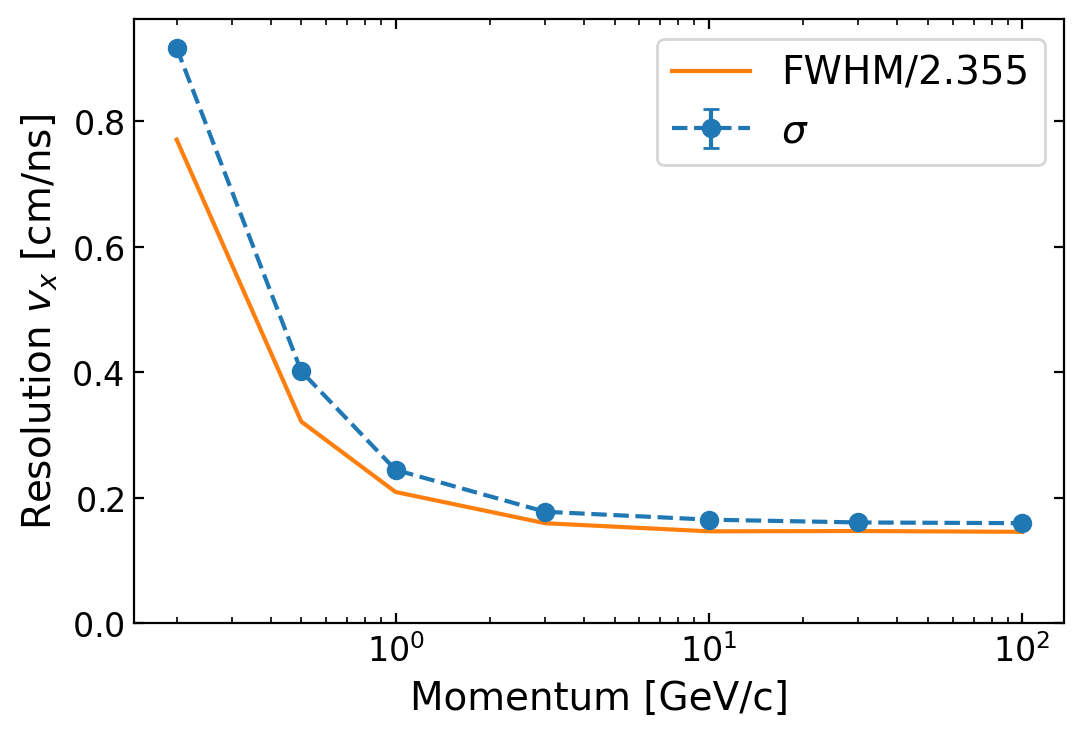

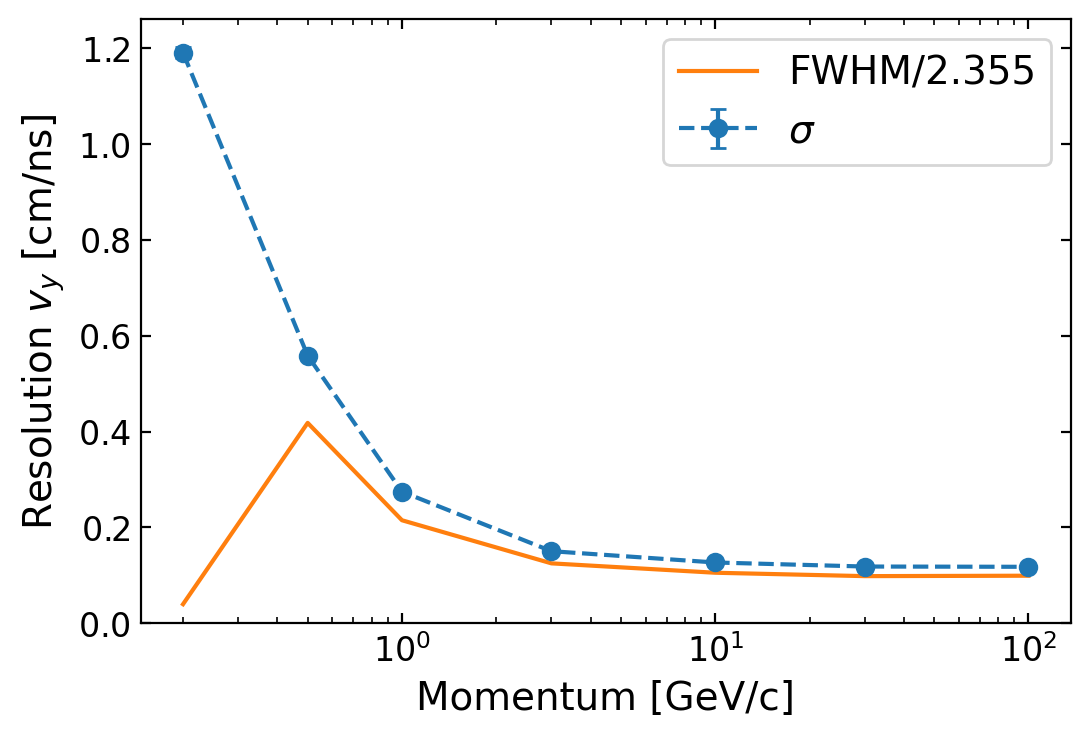

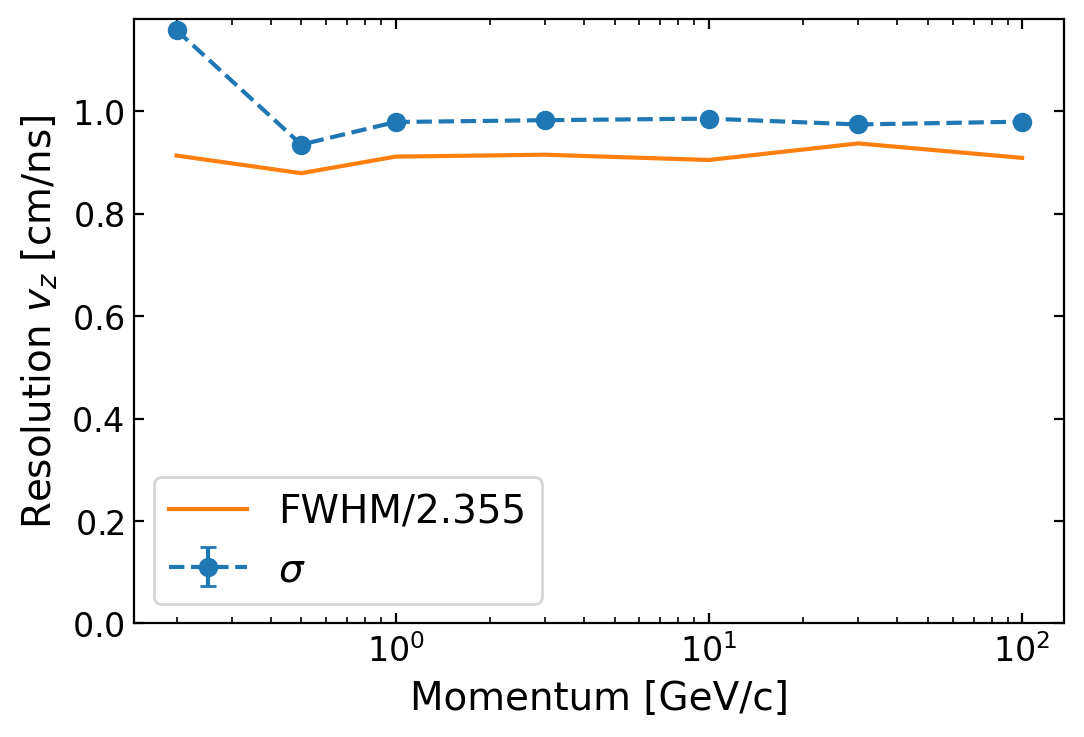

------------Reading electron files--------------


  0%|          | 1/39998 [00:00<2:21:28,  4.71it/s]/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:249: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 39998/39998 [00:18<00:00, 2147.05it/s]
/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:258: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_fit[key]=np.array(results_fit[key])
100%|██████████| 40000/40000 [00:35<00:00, 1138.87it/s]


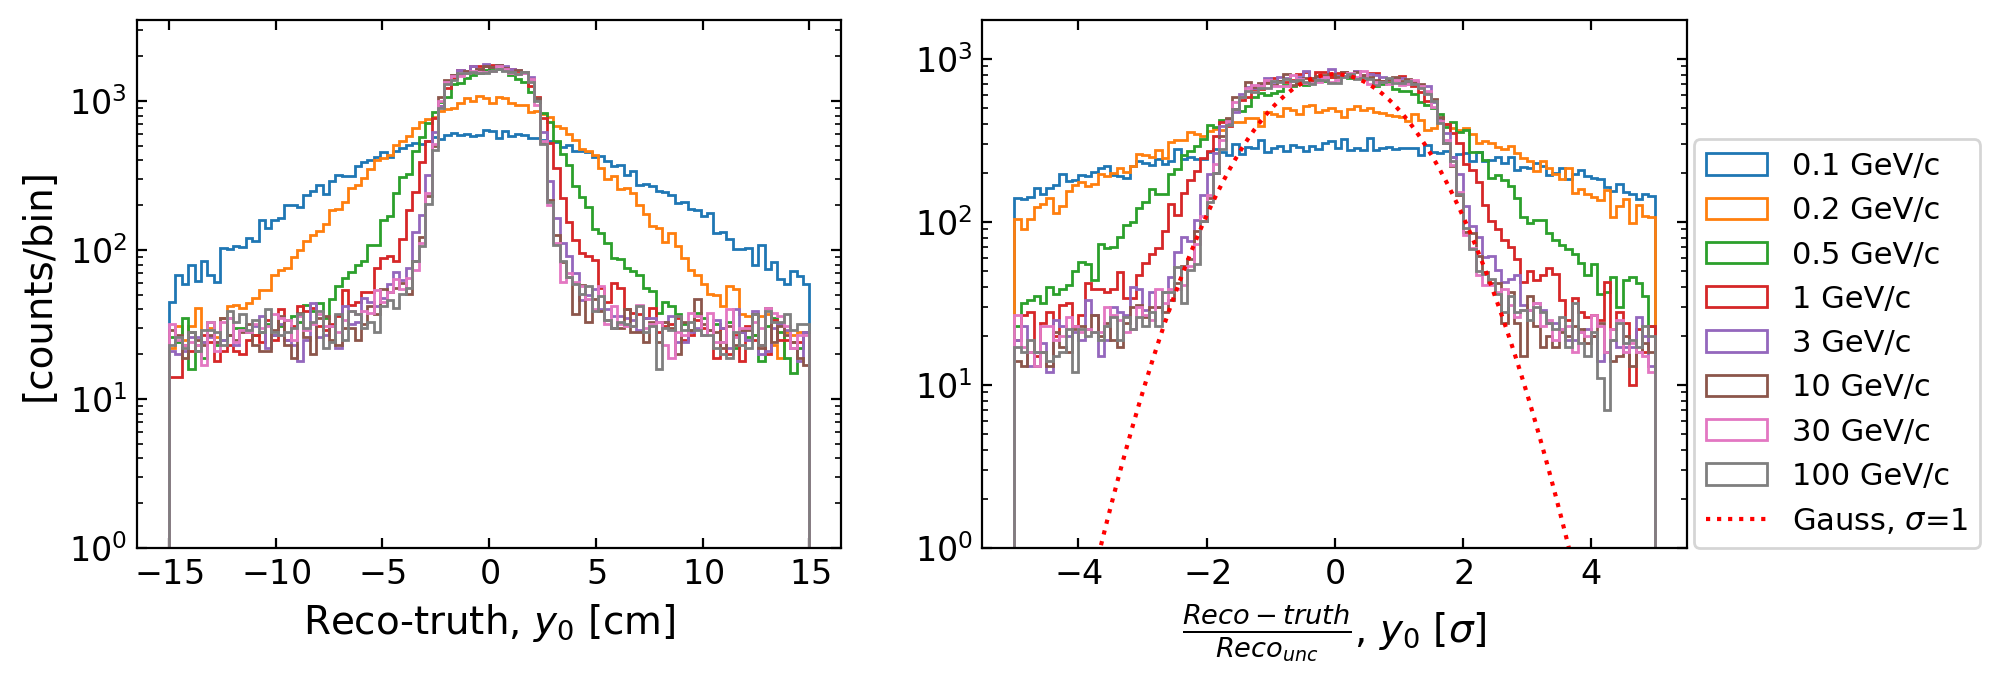

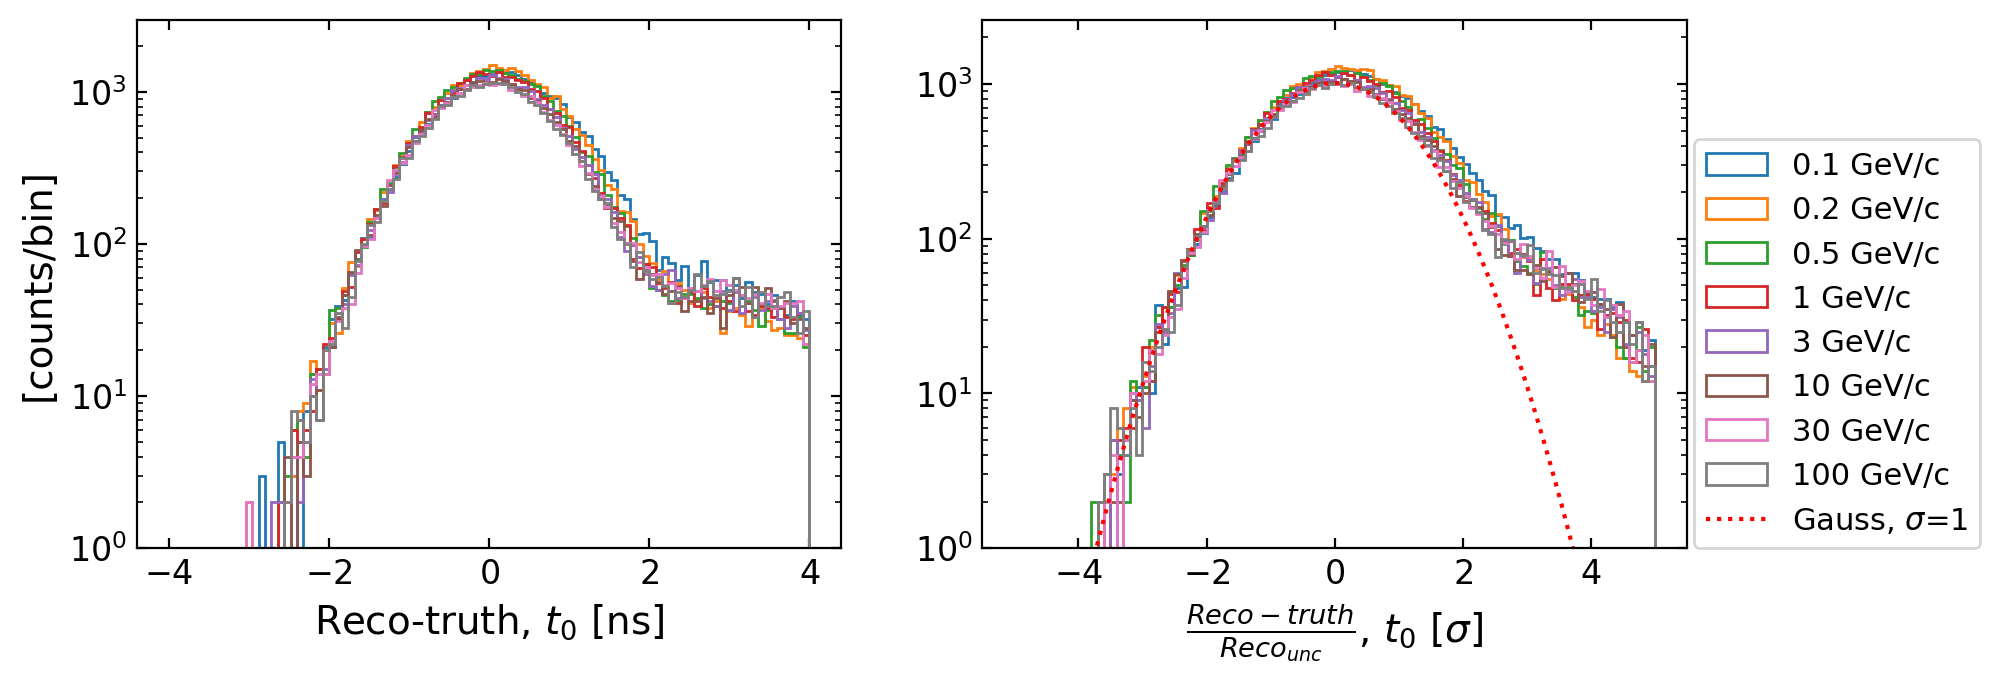

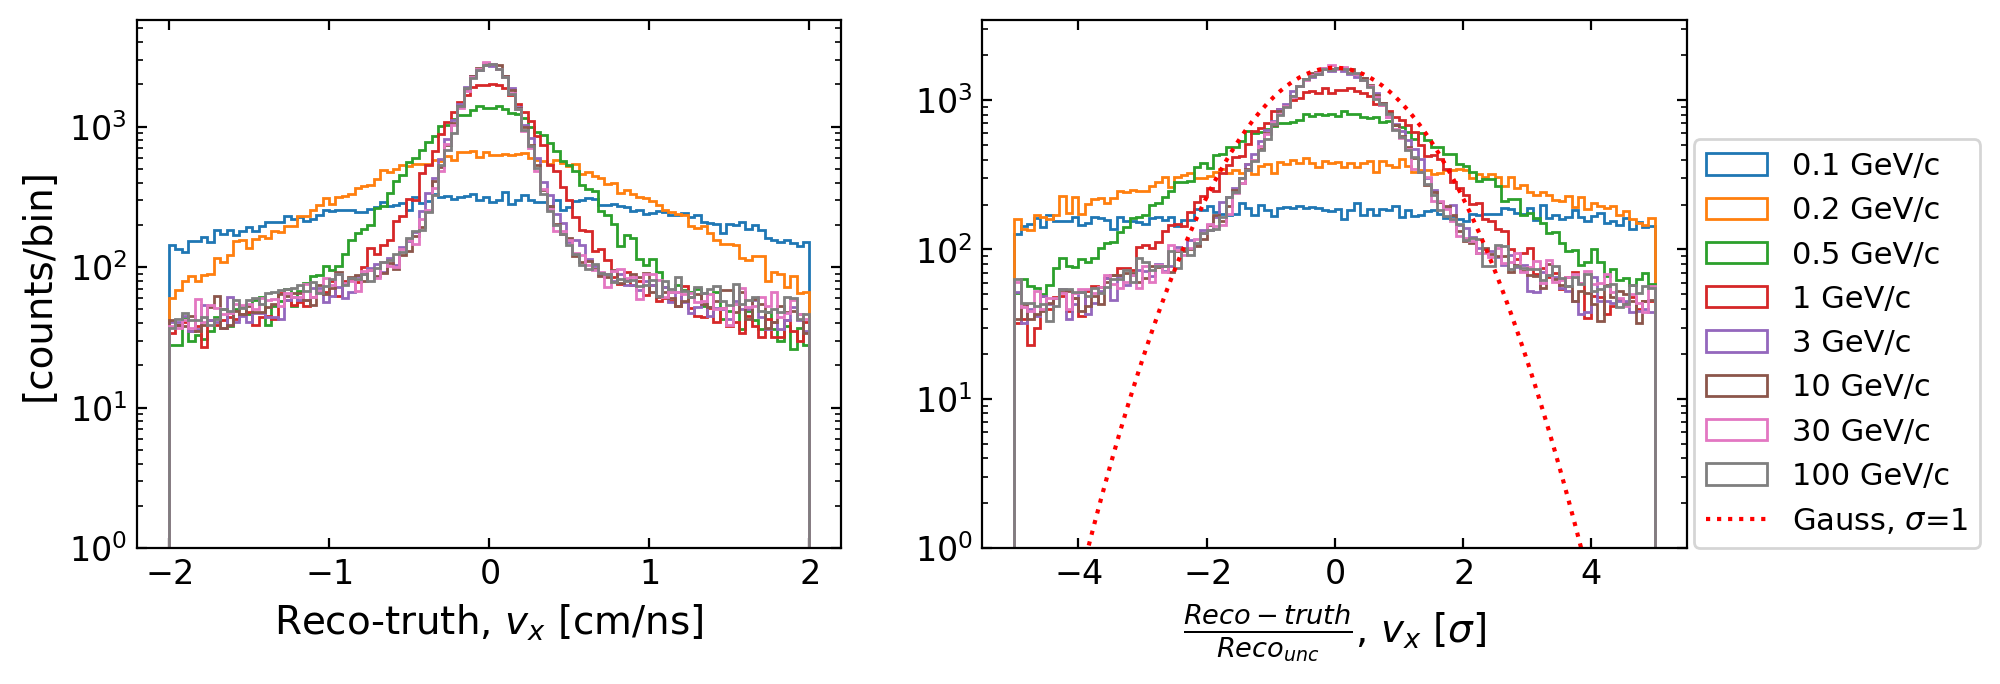

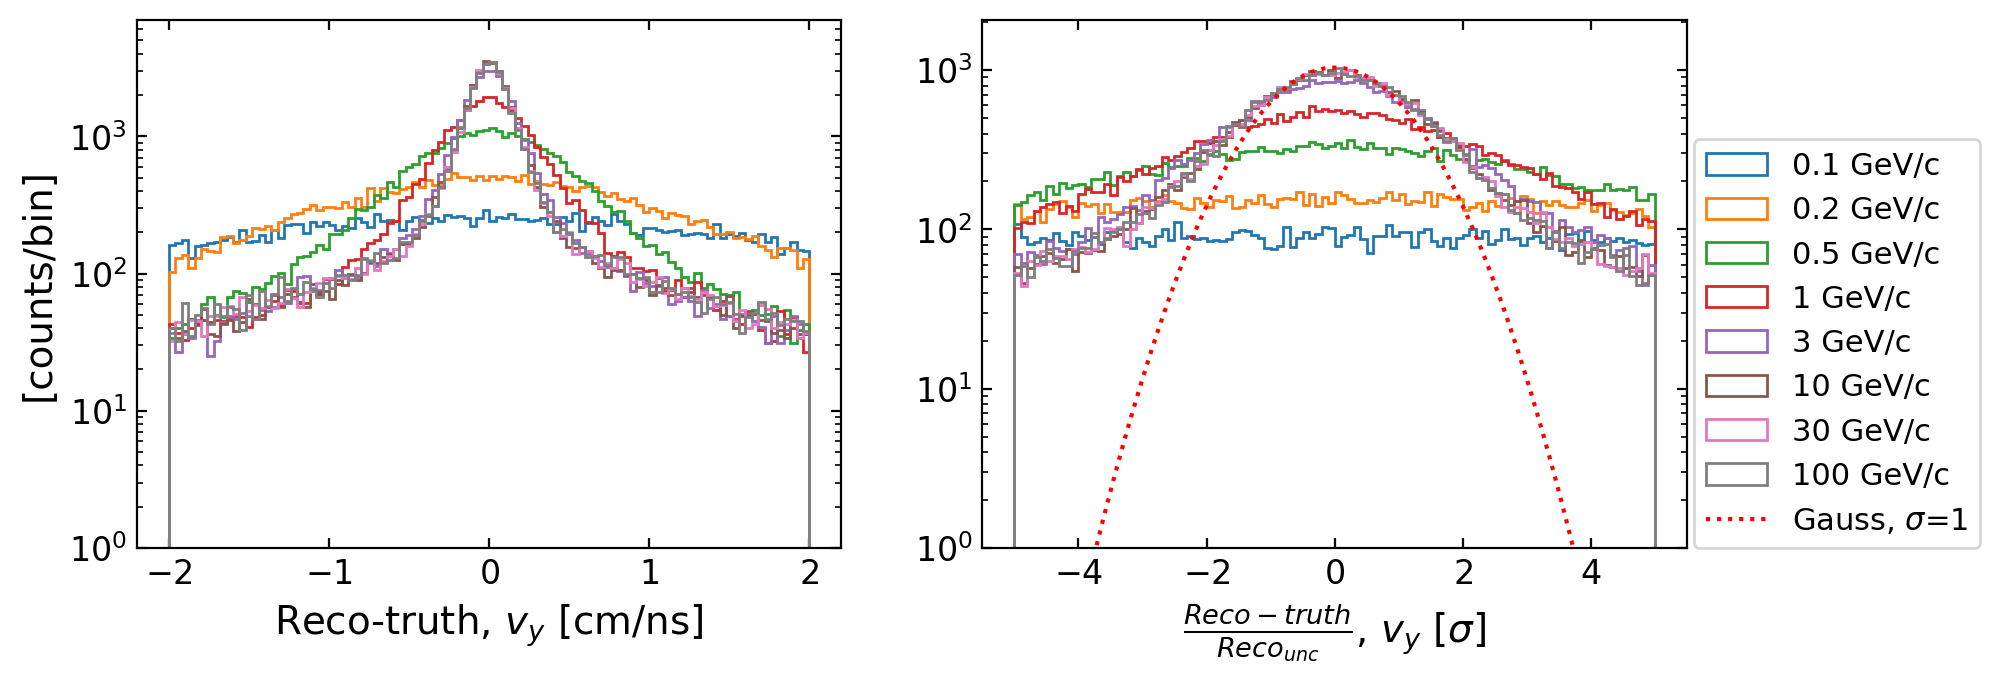

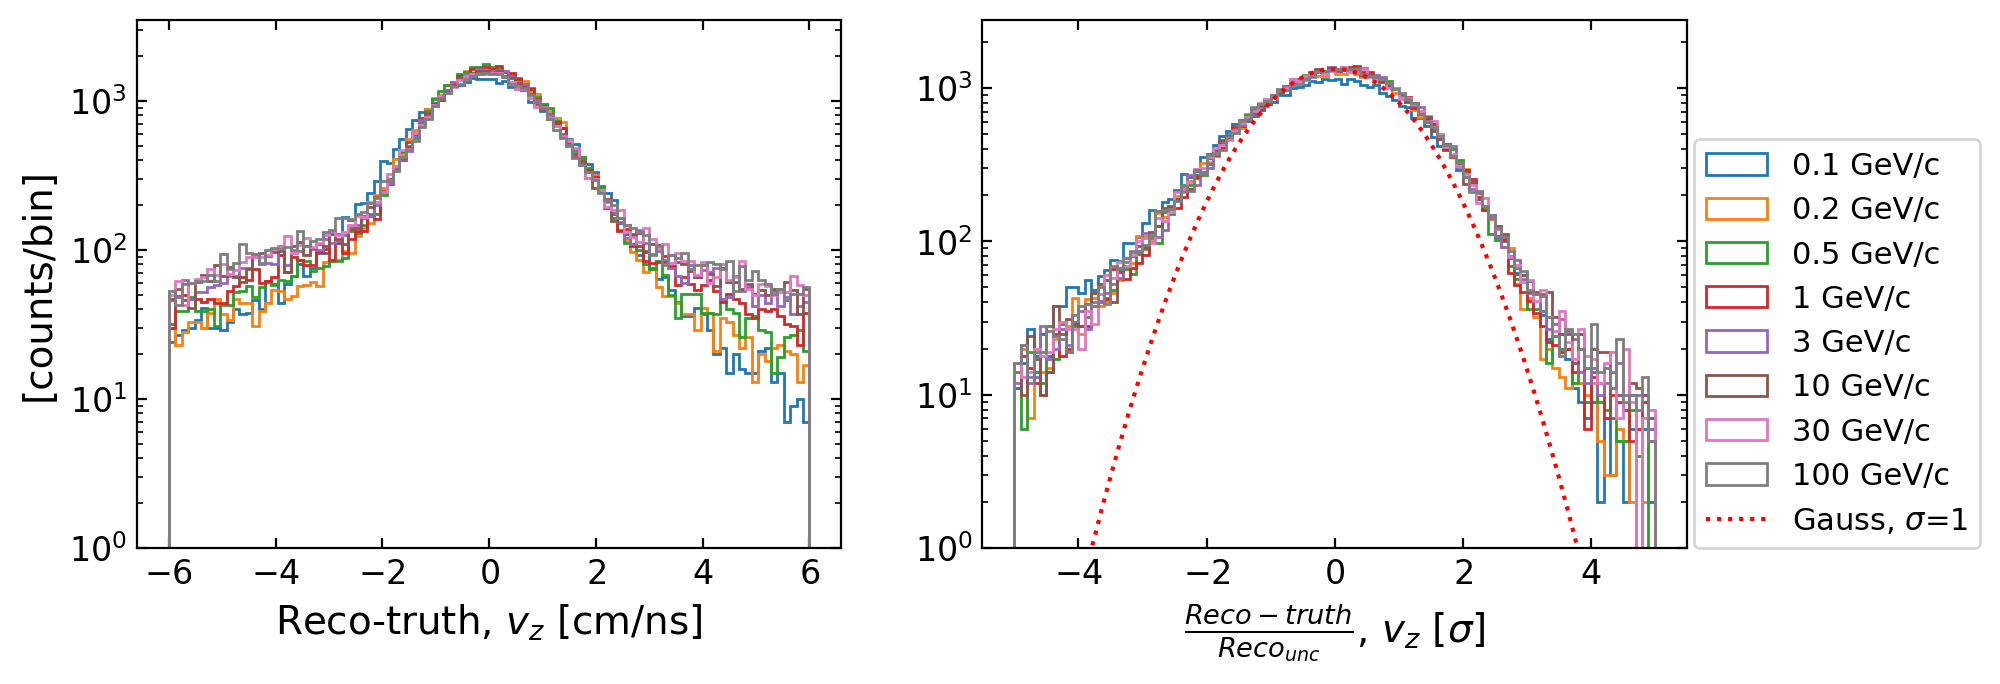

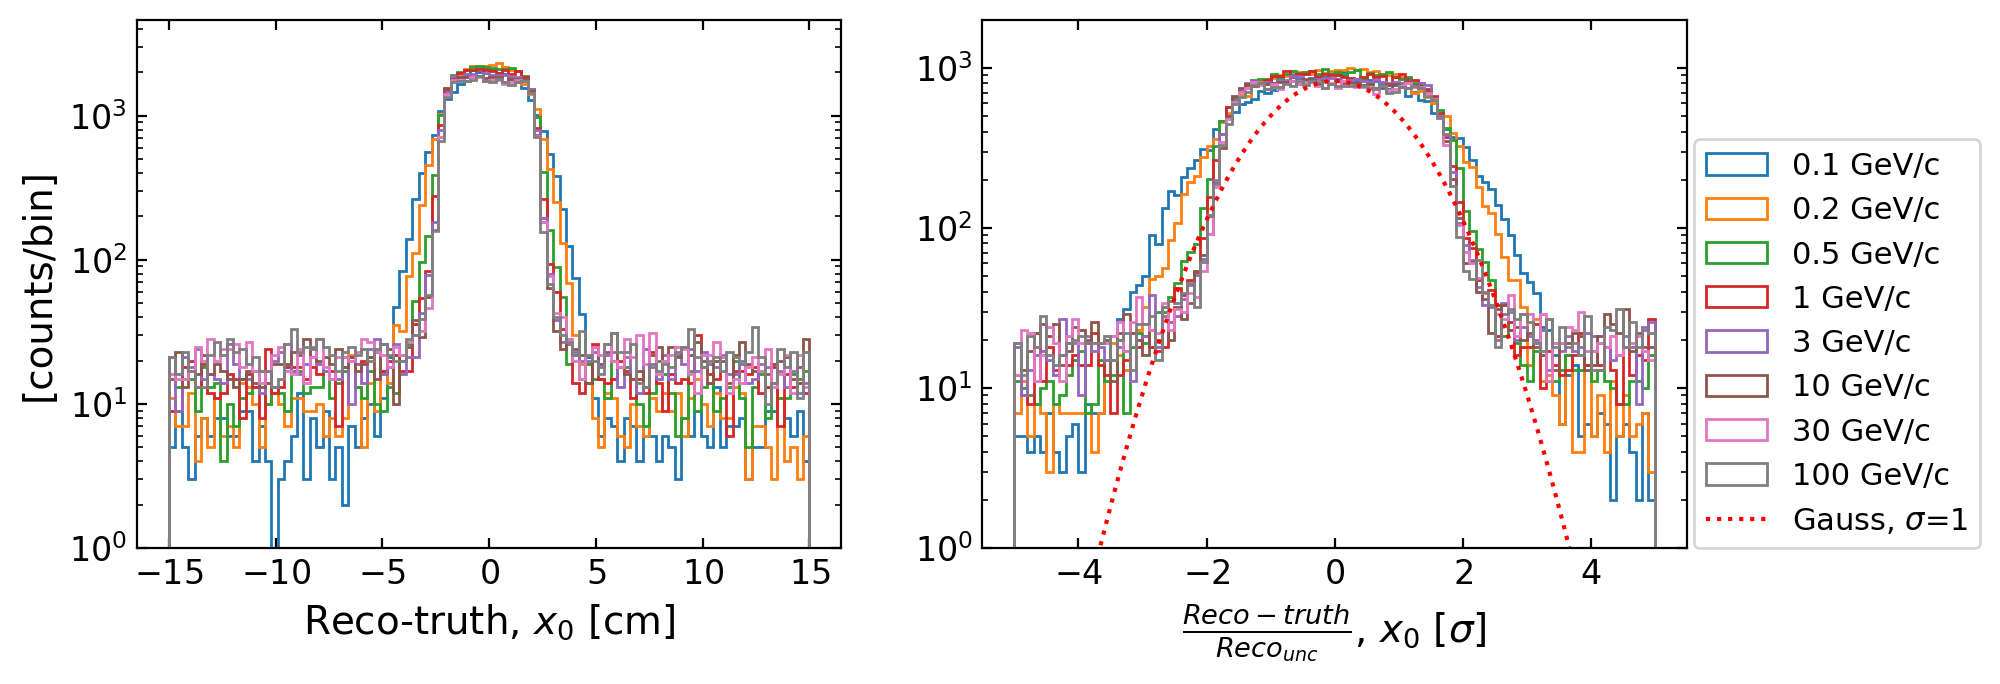

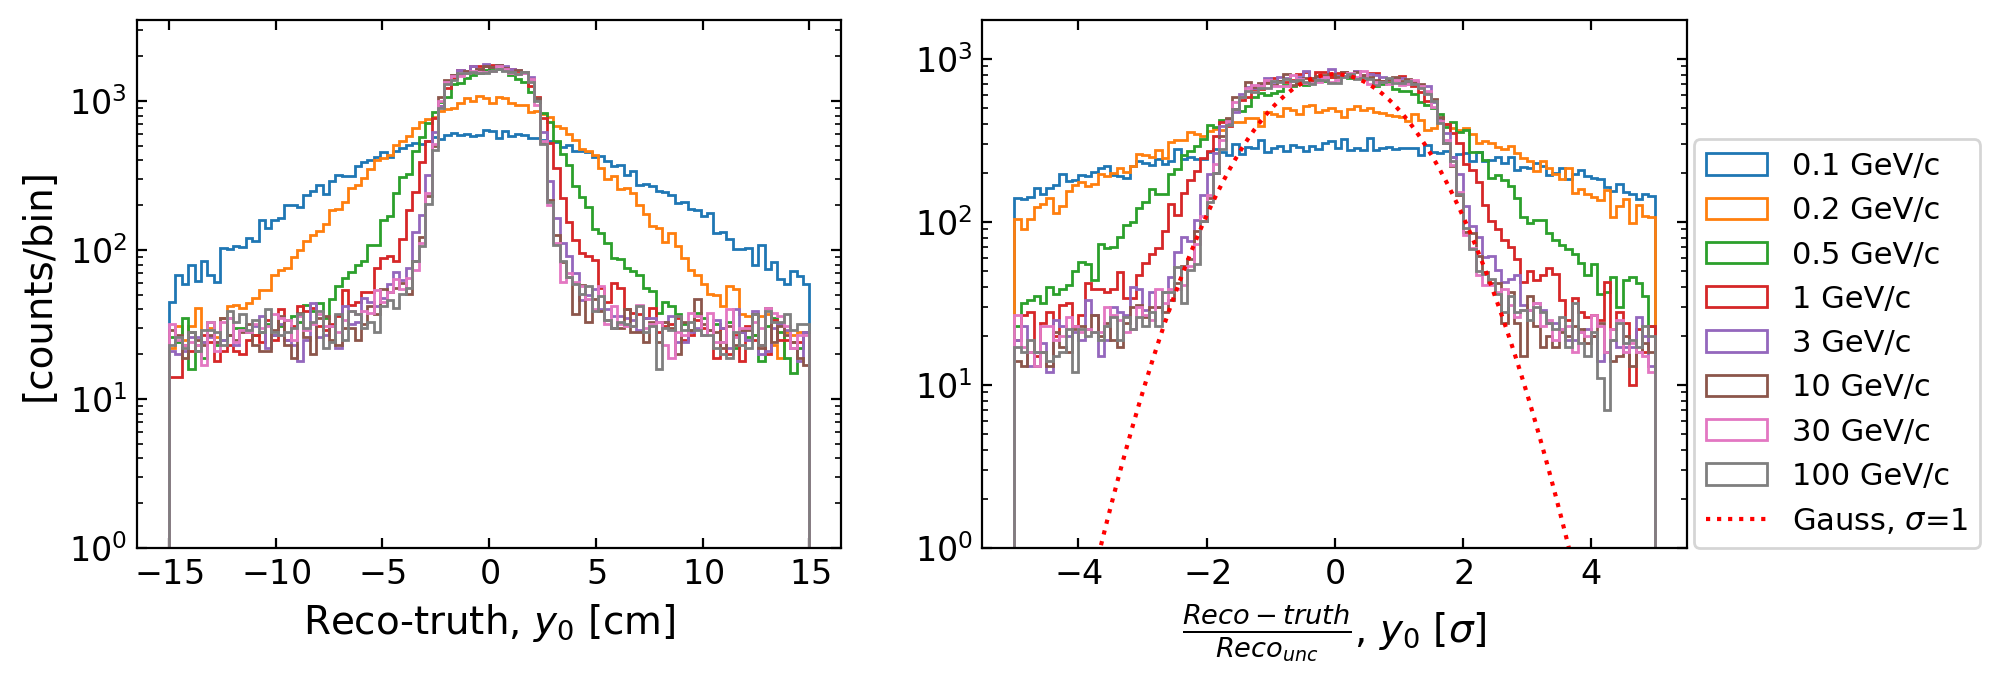

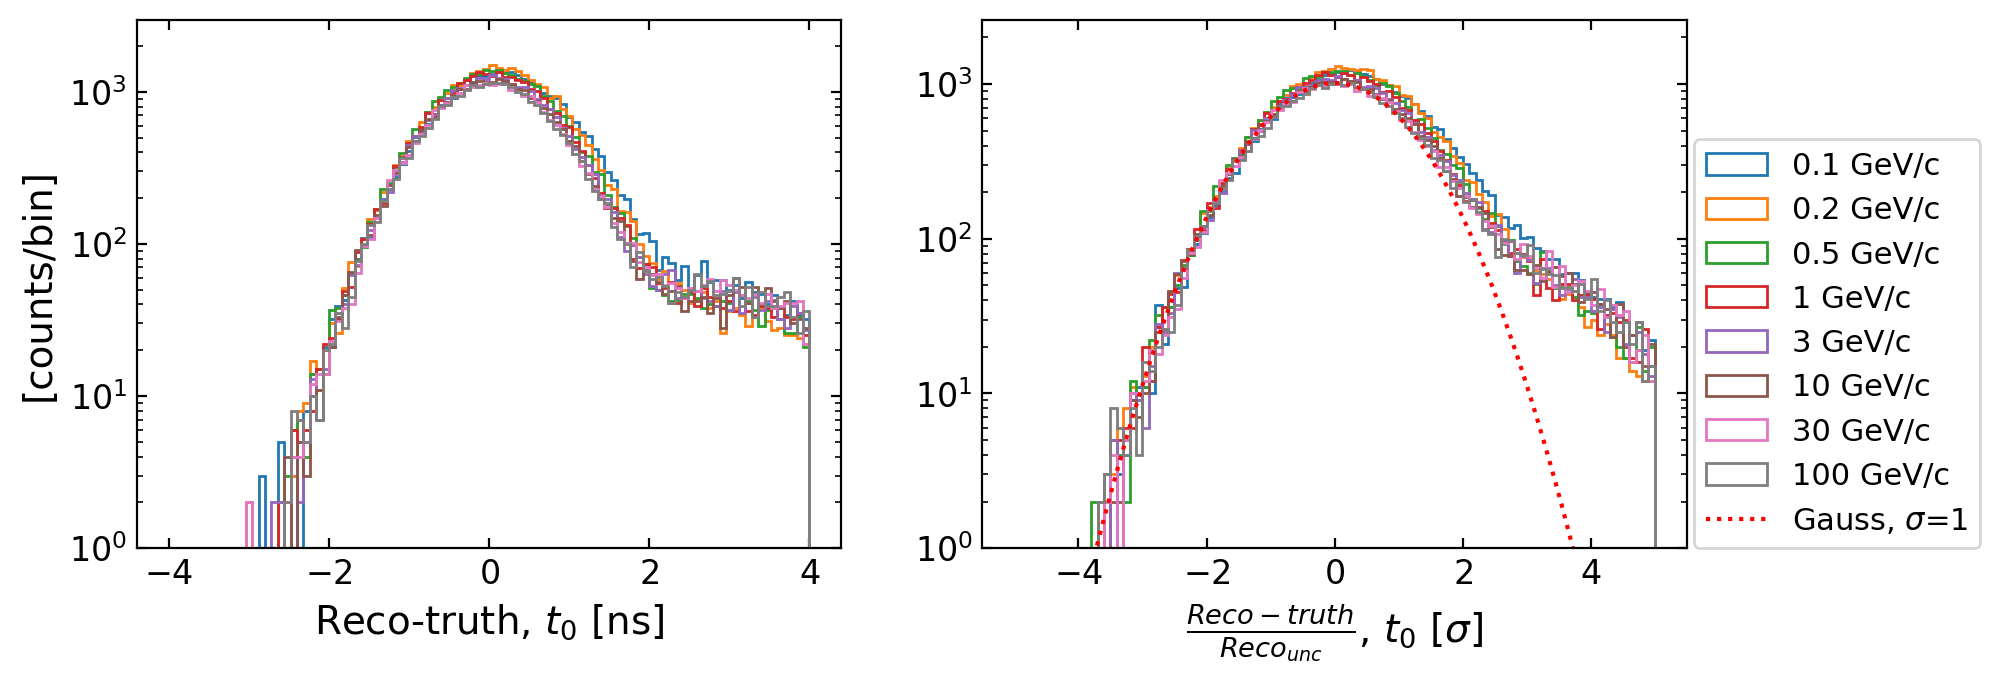

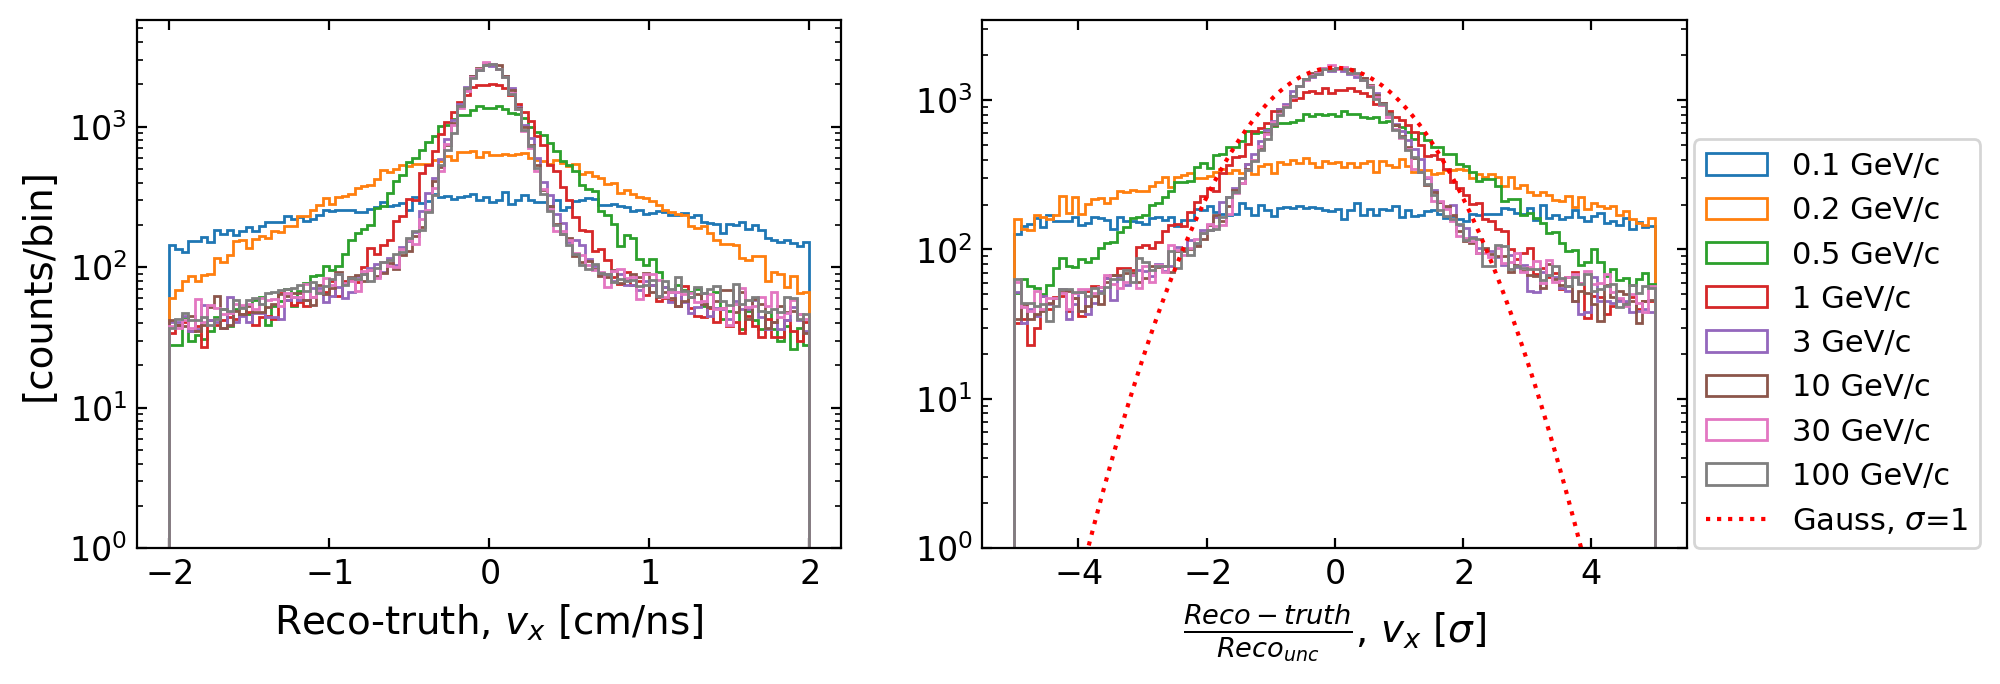

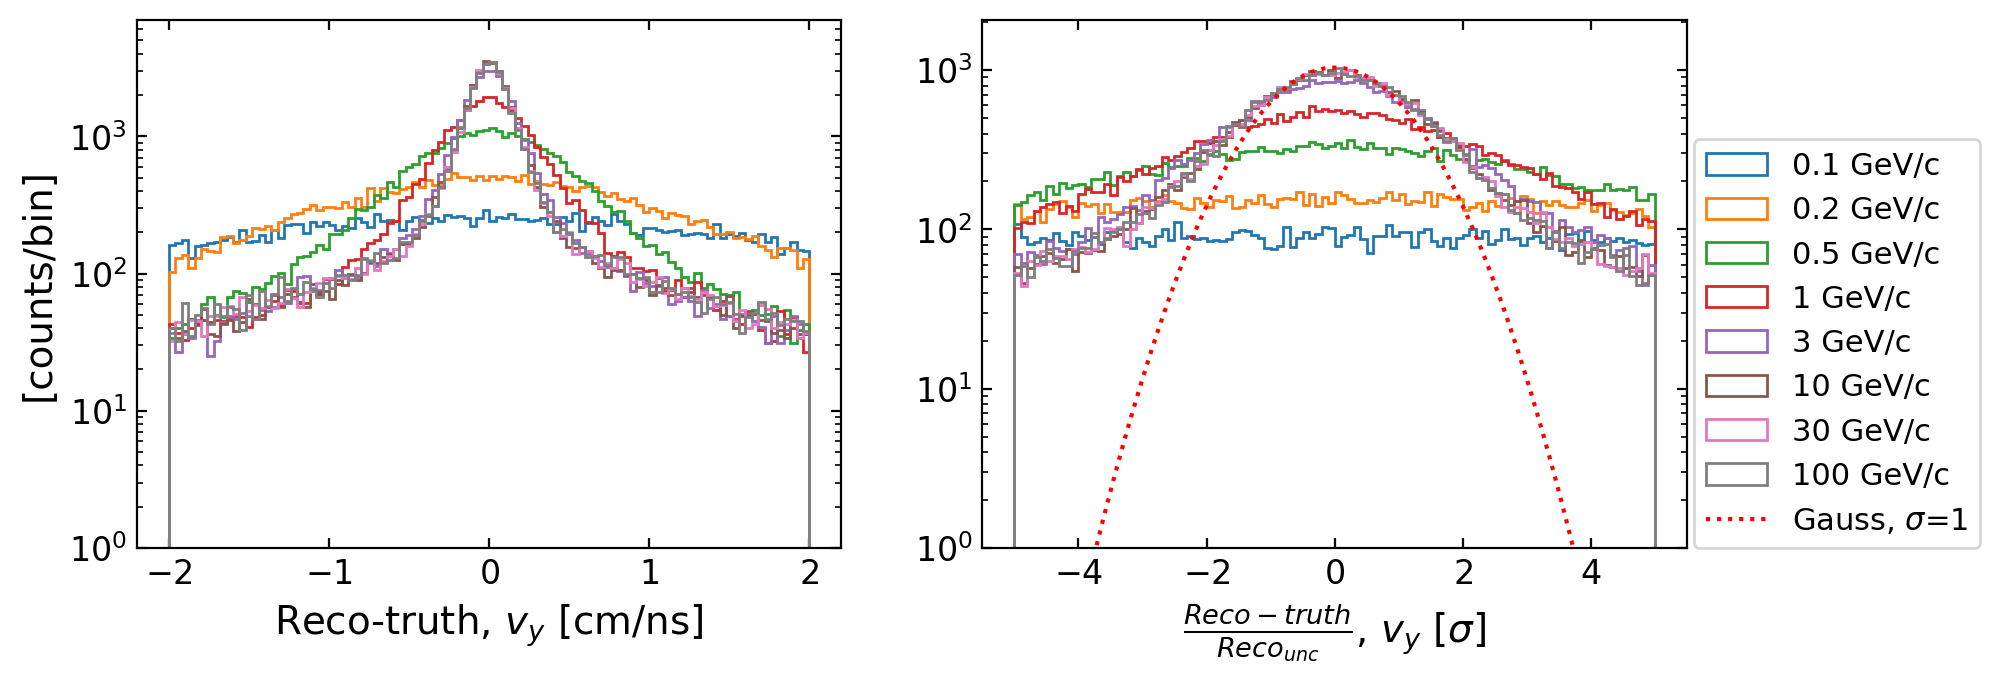

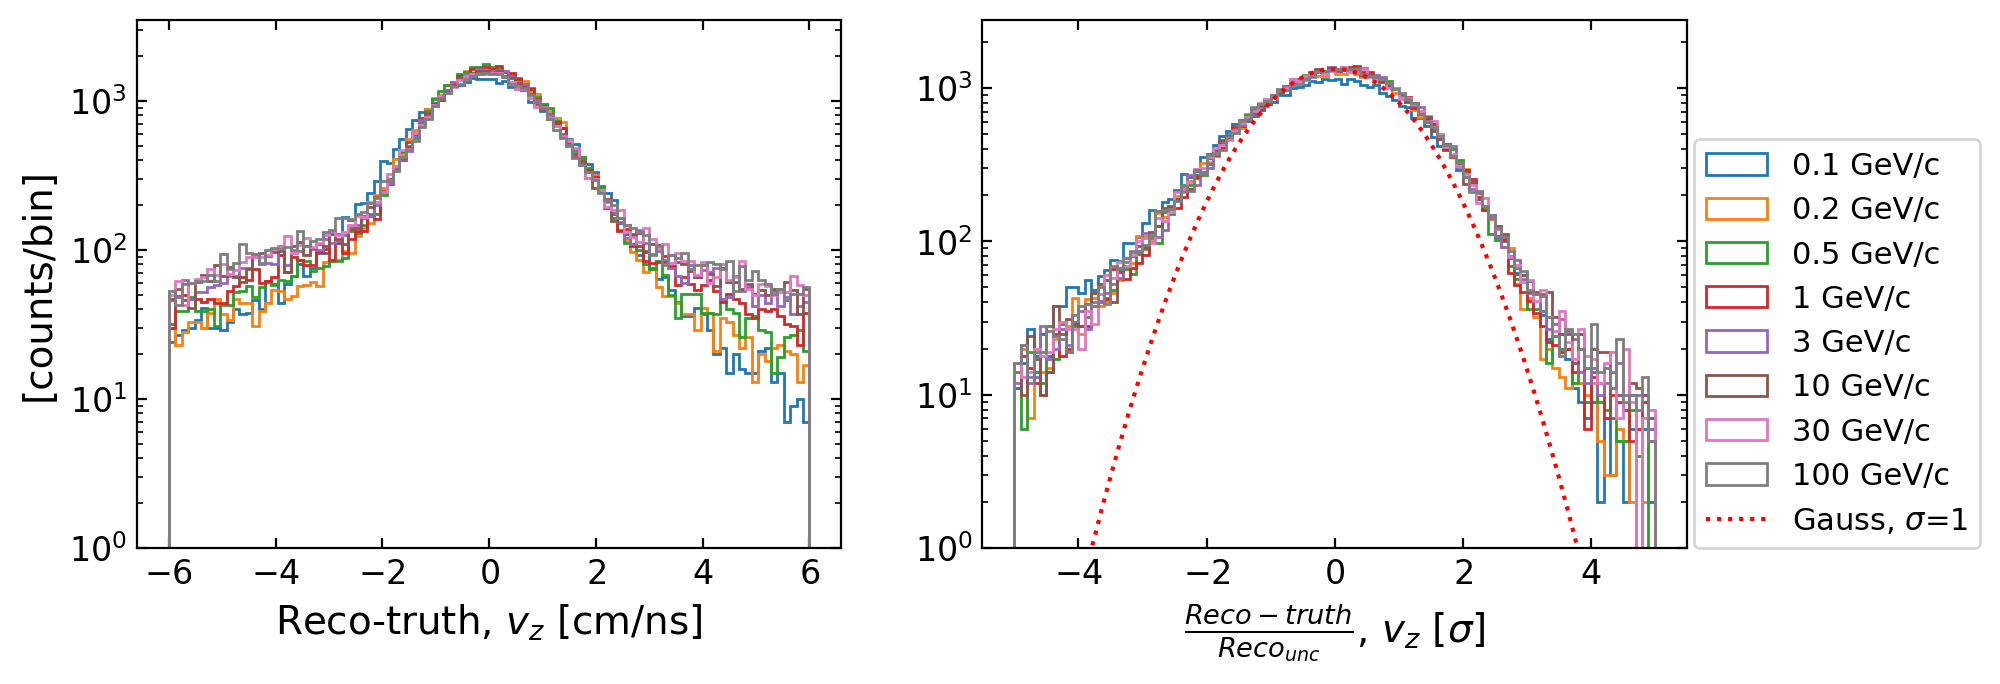

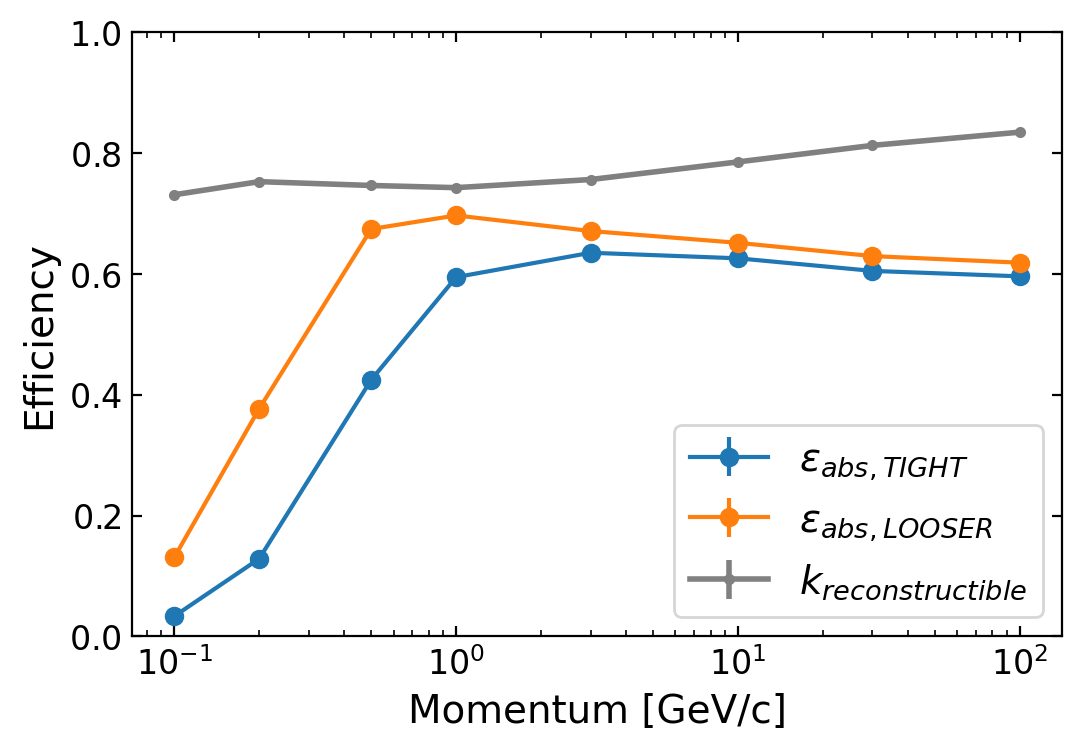

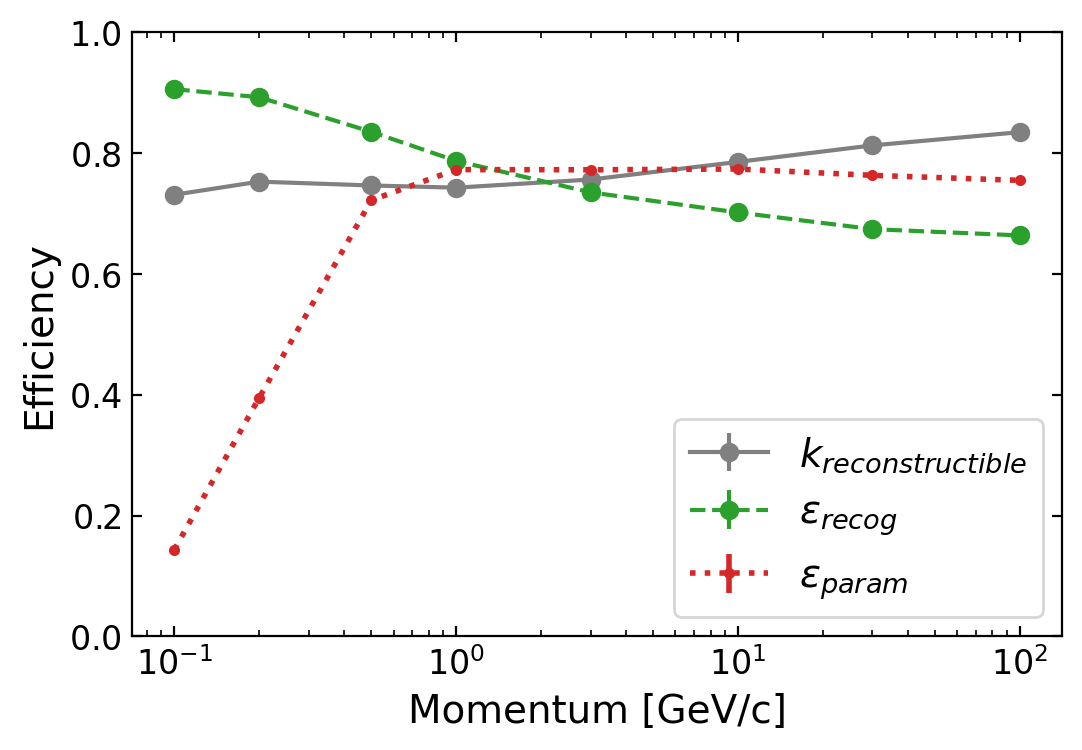

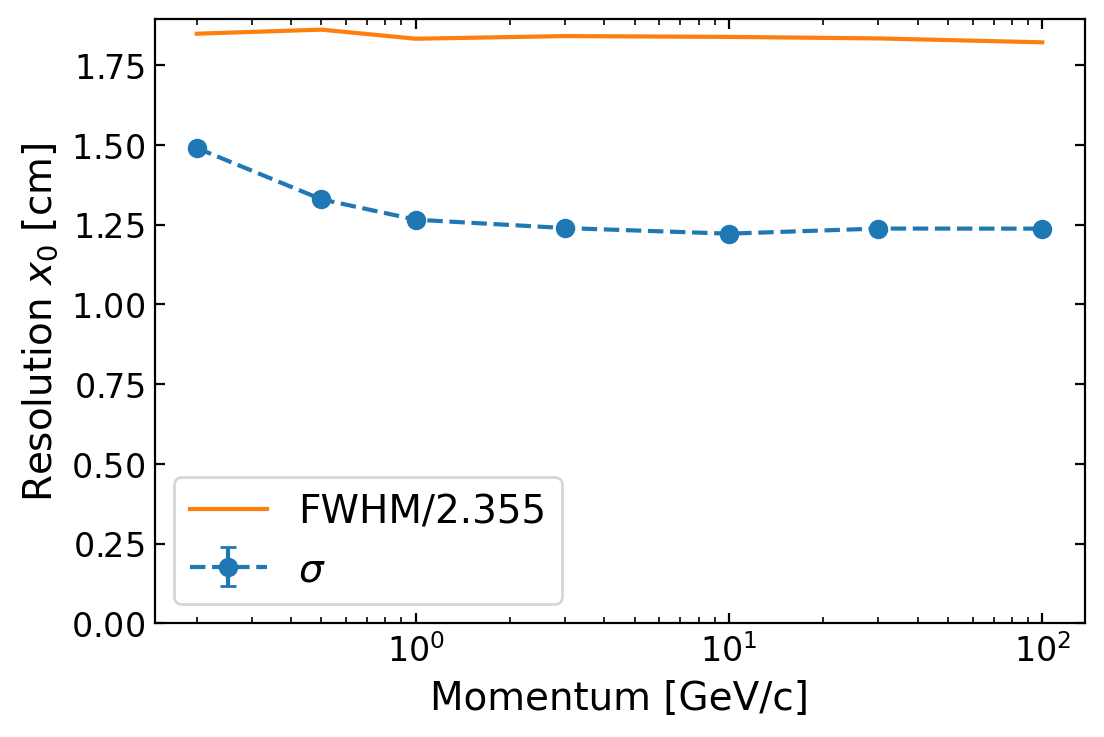

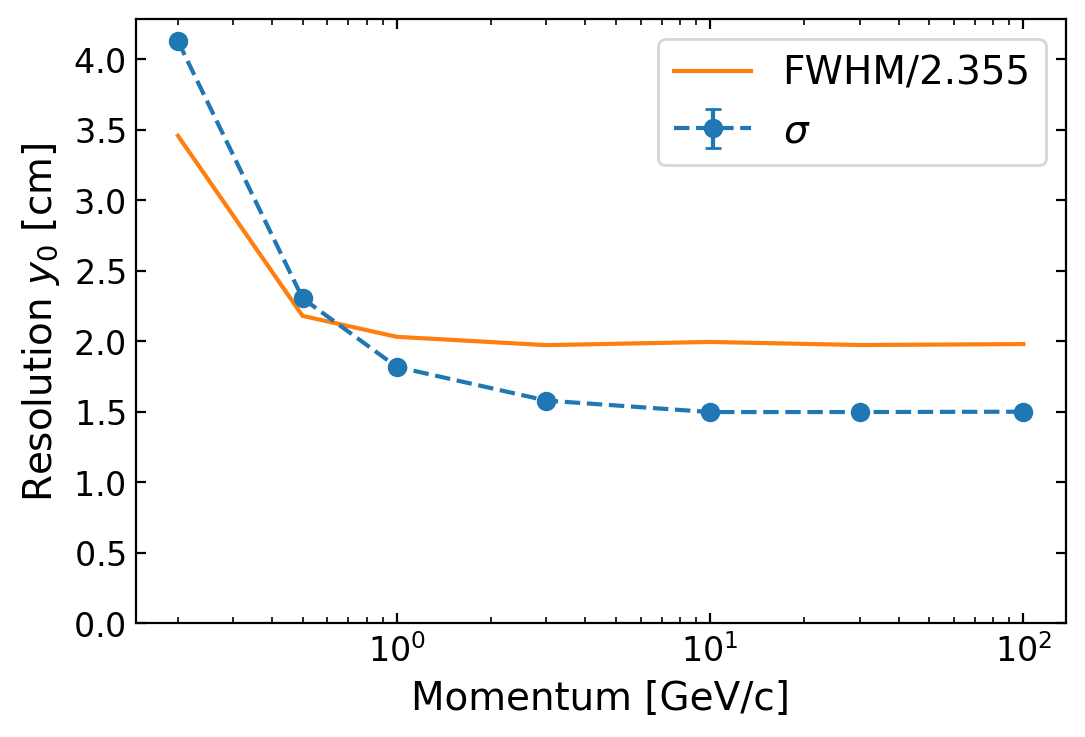

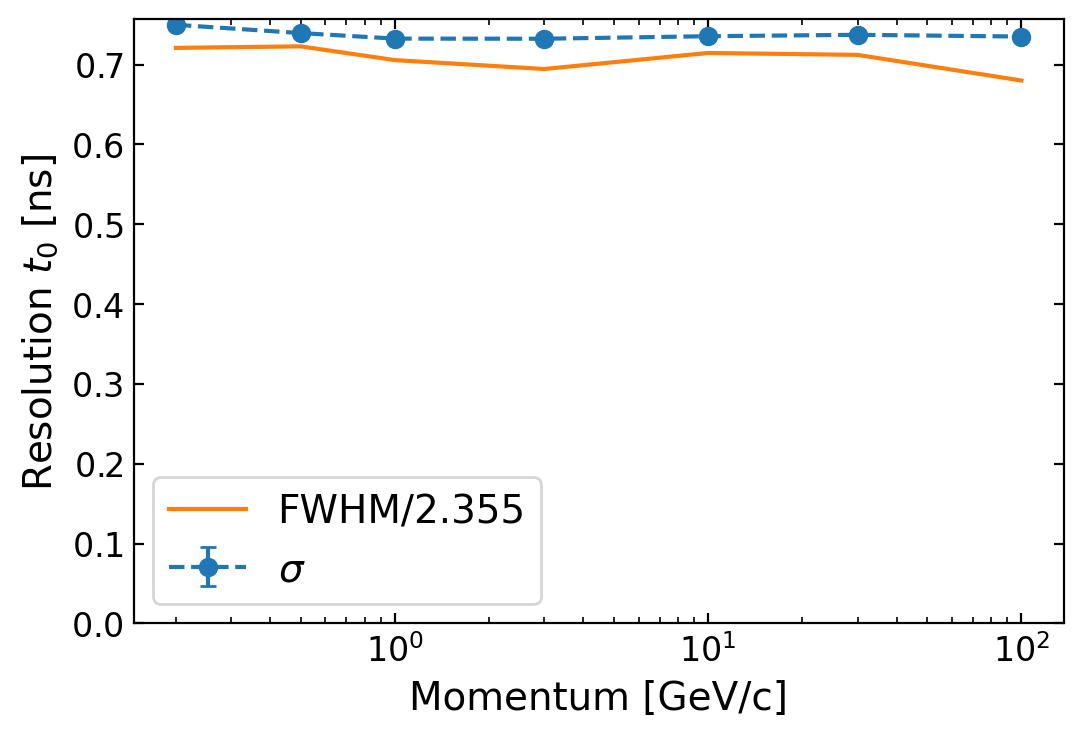

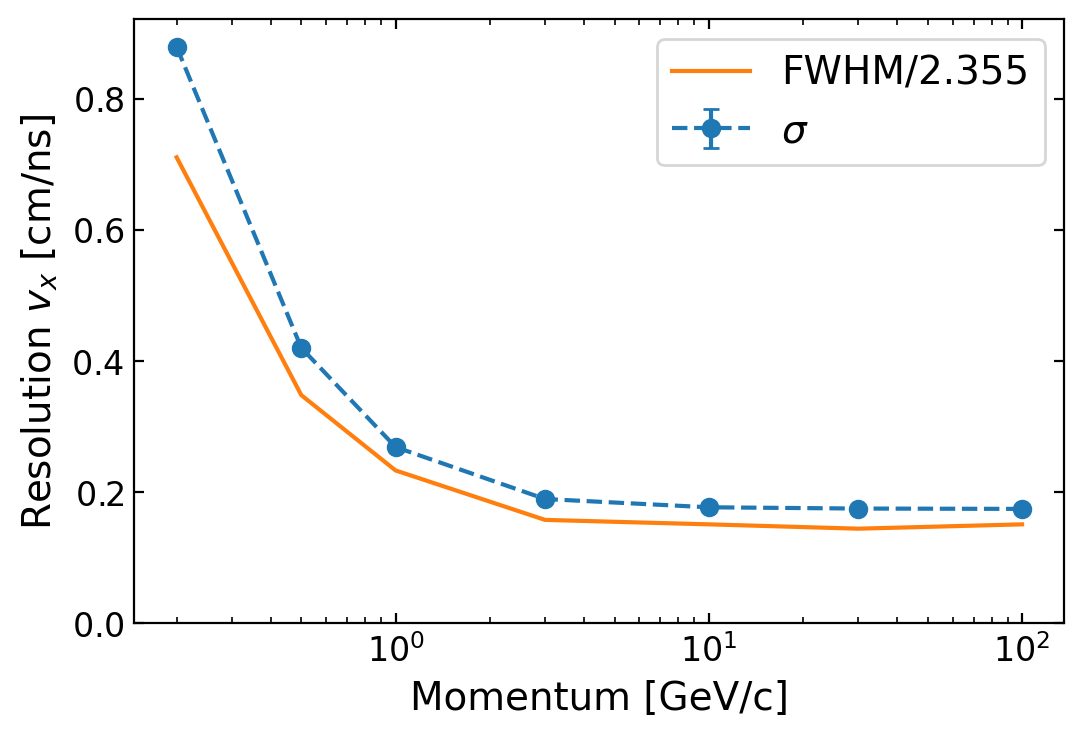

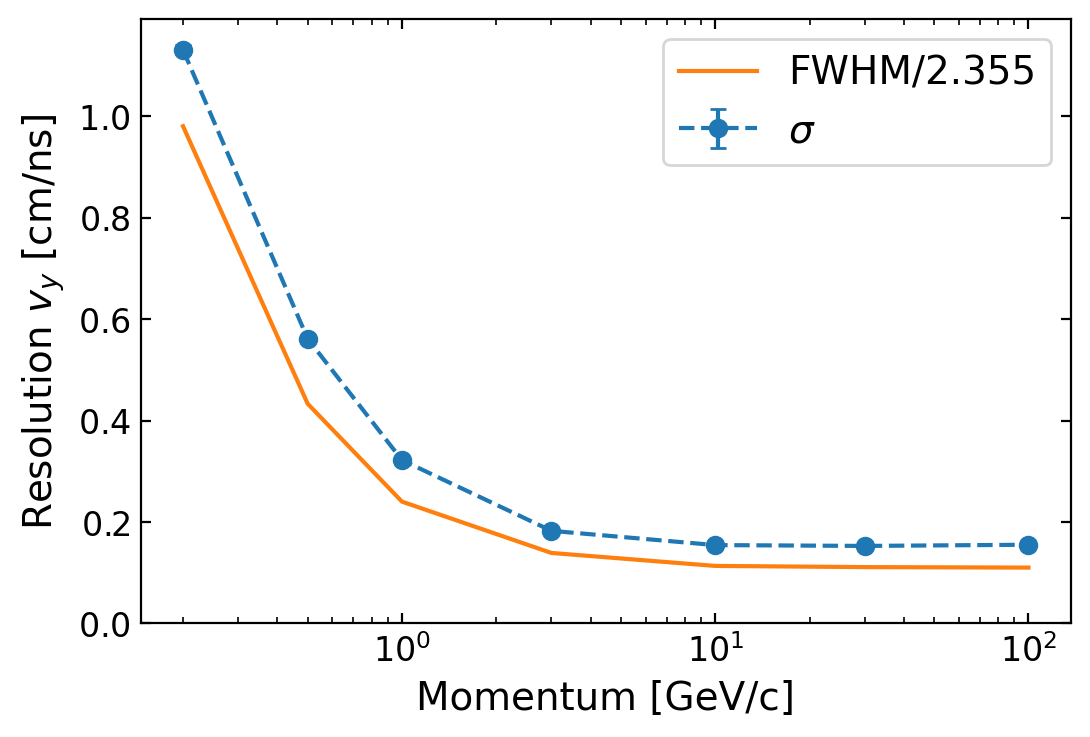

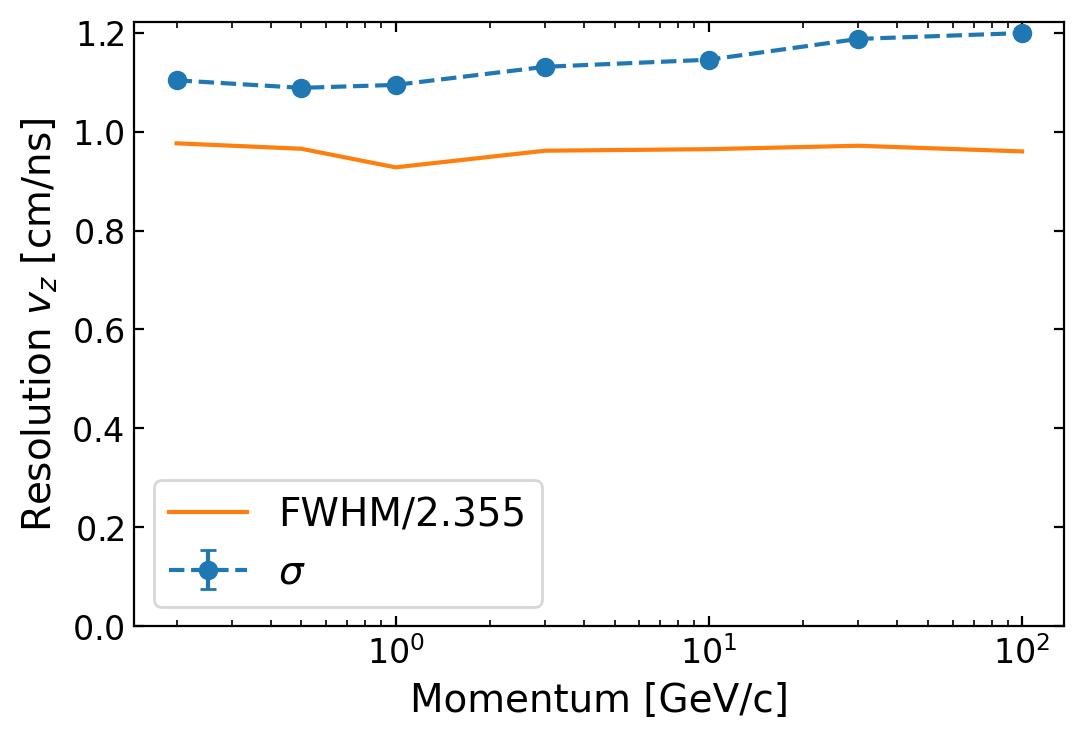

In [4]:
data_ind = 0
data_name = name_list[data_ind]
PDG_TRUTH = pdgid_list[data_ind]


for data_ind in range(len(name_list)):
    data_name = name_list[data_ind]
    PDG_TRUTH = pdgid_list[data_ind]
    
    print(f"------------Reading {data_name} files--------------")

    Data=[]
    for i in range(len(energy_list)):
        Data.append(lsfit.get_km(file_list[data_name][i]))
        

    effs=[]
    resolutions=[]
    for i in range(len(energy_list)):
        data=Data[i]
        if i==0:
            figs = plot_res_pull(data,              label=f"{energy_list[i]} GeV/c", make_legend=False,  plot_gauss1=False)
        elif i==len(energy_list)-1:
            figs = plot_res_pull(data, figs = figs, label=f"{energy_list[i]} GeV/c", make_legend=True,  plot_gauss1=True)
        else:
            figs = plot_res_pull(data, figs = figs, label=f"{energy_list[i]} GeV/c", make_legend=False,  plot_gauss1=False)


        # Calculate efficiency
        eff_i = calc_eff(data, PDG_TRUTH=PDG_TRUTH)
        effs.append(eff_i)

        # Calculate resolution
        res_i = calc_resolution(data)
        resolutions.append(res_i)


    # Save spectrum
    for i in range(6):
        figure(figs[i])
        savefig(f"Residual_Pull_{data_name}_{PAR_LABELS_RAW[INDS_PAR[i]]}")
        show()
        close() # Use close to not show figures again


    # Plot efficiency
    effs = np.array(effs)    
    errorbar(energy_list, effs[:,1,0], yerr=(effs[:,1,1], effs[:,1,2]),fmt="o-",label="$\epsilon_{abs, TIGHT}$")
    errorbar(energy_list, effs[:,2,0], yerr=(effs[:,2,1], effs[:,2,2]),fmt="o-",label="$\epsilon_{abs, LOOSER}$")
    errorbar(energy_list, effs[:,3,0], yerr=(effs[:,3,1], effs[:,3,2]),fmt=".-",color="grey", linewidth=2,label="$k_{reconstructible}$")
    legend()
    xscale("log")
    ylim(0,1)
    xlabel("Momentum [GeV/c]")
    ylabel("Efficiency")
    savefig(f"Efficiency_{data_name}")
    show()

    errorbar(energy_list, effs[:,3,0], yerr=(effs[:,3,1], effs[:,3,2]),fmt="o-",color="grey",label="$k_{reconstructible}$")
    errorbar(energy_list, effs[:,4,0], yerr=(effs[:,4,1], effs[:,4,2]),fmt="o--",color="C2",label="$\epsilon_{recog}$")
    errorbar(energy_list, effs[:,5,0], yerr=(effs[:,5,1], effs[:,5,2]),fmt=".:",color="C3", linewidth=2,label="$\epsilon_{param}$")
    legend()
    xscale("log")
    ylim(0,1)
    xlabel("Momentum [GeV/c]")
    ylabel("Efficiency")
    savefig(f"Efficiency_breakdown_{data_name}")
    show()


    # Plot Resolution
    resolutions = np.array(resolutions)
    for i  in range(6):
        errorbar(energy_list[1:], resolutions[1:,0,i], yerr= resolutions[1:,1,i], label="$\sigma$",fmt="o--", capsize=3)
        plot(energy_list[1:], resolutions[1:,2,i]/2.355, label="FWHM/2.355")
        xlabel("Momentum [GeV/c]")
        ylabel("Resolution "+PAR_LABELS[i])
        ylim(bottom=0)
        xscale("log")
        legend()
        savefig(f"Resolution_{data_name}_{PAR_LABELS_RAW[i]}")
        show()
        
        
    # Save the data points
    results={"energy_list":energy_list,
            "efficiencies":effs,
            "resolutions":resolutions}
    joblib.dump(results, f"data/plotdata_{data_name}_efficiency_resolution.joblib")

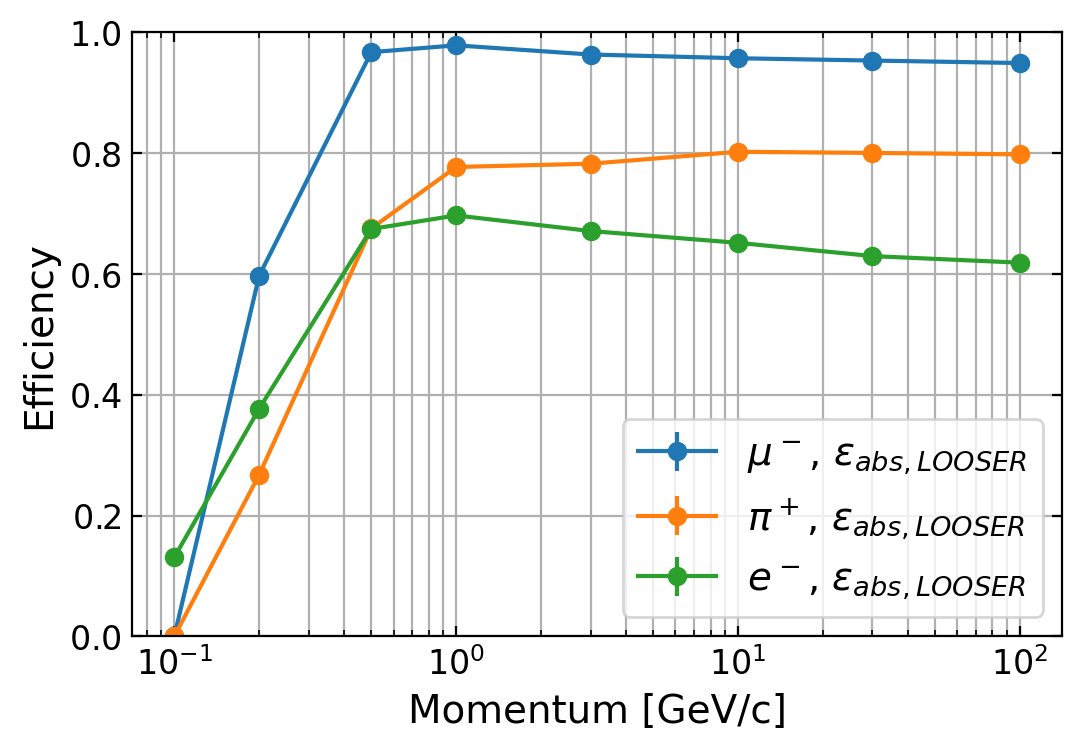

In [12]:
i_eff =2
for data_ind in range(len(name_list)):
    data_name = name_list[data_ind]
    PDG_TRUTH = pdgid_list[data_ind]
    
    results=joblib.load(f"data/plotdata_{data_name}_efficiency_resolution.joblib")
    energy_list = results["energy_list"]
    effs = results["efficiencies"]
    resolutions = results["resolutions"]
                          
                          
    # errorbar(energy_list, effs[:,2,0], yerr=(effs[:,2,1], effs[:,2,2]),fmt="o-")
    errorbar(energy_list, effs[:,i_eff,0], yerr=(effs[:,i_eff,1], effs[:,i_eff,2]),fmt="o-",label=name_list_latex[data_ind]+", $\epsilon_{abs, LOOSER}$")
    
legend()
xscale("log")
ylim(0,1)
xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
grid(which="both")
savefig(f"Efficiency_e_mu_pi_LOOSER")
show()


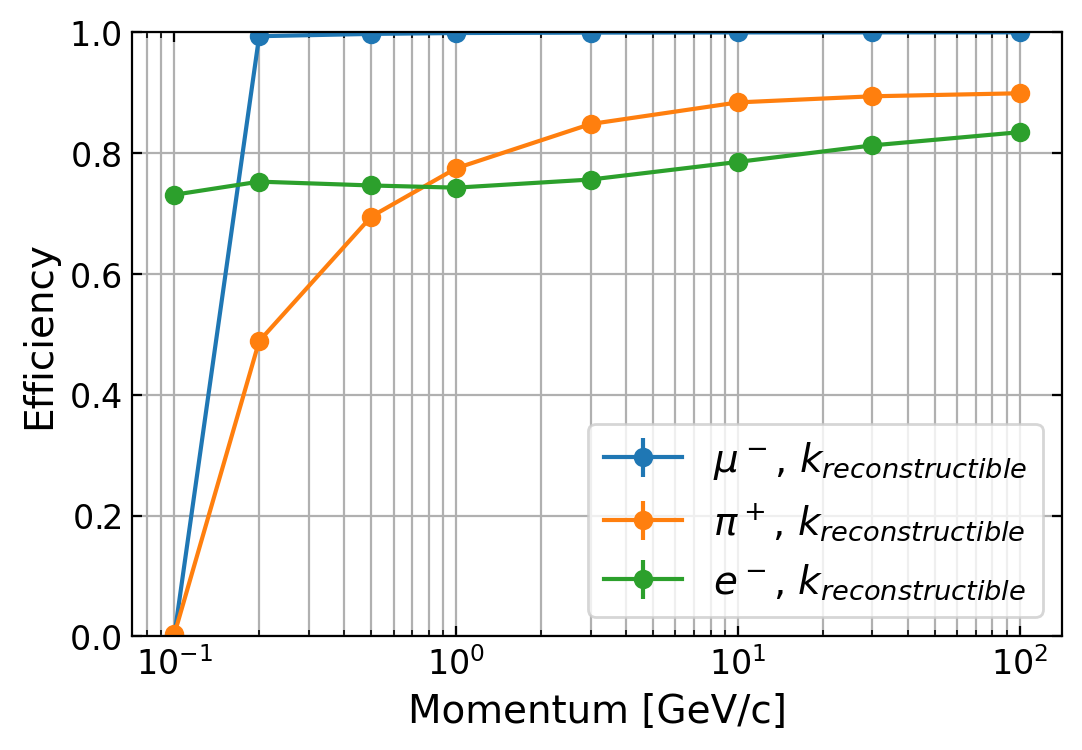

In [16]:
i_eff =3
for data_ind in range(len(name_list)):
    data_name = name_list[data_ind]
    PDG_TRUTH = pdgid_list[data_ind]
    
    results=joblib.load(f"data/plotdata_{data_name}_efficiency_resolution.joblib")
    energy_list = results["energy_list"]
    effs = results["efficiencies"]
    resolutions = results["resolutions"]
                          
                          
    # errorbar(energy_list, effs[:,2,0], yerr=(effs[:,2,1], effs[:,2,2]),fmt="o-")
    errorbar(energy_list, effs[:,i_eff,0], yerr=(effs[:,i_eff,1], effs[:,i_eff,2]),fmt="o-",label=name_list_latex[data_ind]+", $k_{reconstructible}$")
    
legend()
xscale("log")
ylim(0,1)
xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
grid(which="both")
savefig(f"Efficiency_e_mu_pi_KRECON")
show()


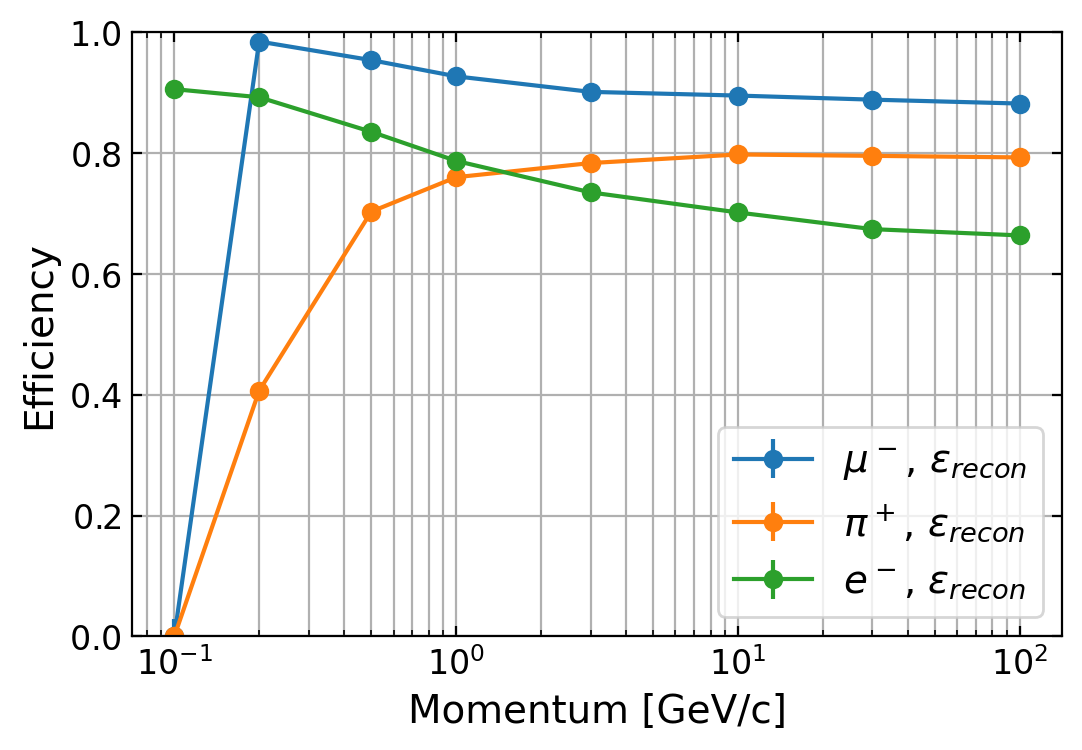

In [17]:
i_eff =4
for data_ind in range(len(name_list)):
    data_name = name_list[data_ind]
    PDG_TRUTH = pdgid_list[data_ind]
    
    results=joblib.load(f"data/plotdata_{data_name}_efficiency_resolution.joblib")
    energy_list = results["energy_list"]
    effs = results["efficiencies"]
    resolutions = results["resolutions"]
                          
                          
    # errorbar(energy_list, effs[:,2,0], yerr=(effs[:,2,1], effs[:,2,2]),fmt="o-")
    errorbar(energy_list, effs[:,i_eff,0], yerr=(effs[:,i_eff,1], effs[:,i_eff,2]),fmt="o-",label=name_list_latex[data_ind]+", $\epsilon_{recon}$")
    
legend()
xscale("log")
ylim(0,1)
xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
grid(which="both")
savefig(f"Efficiency_e_mu_pi_EpsilonRECON")
show()


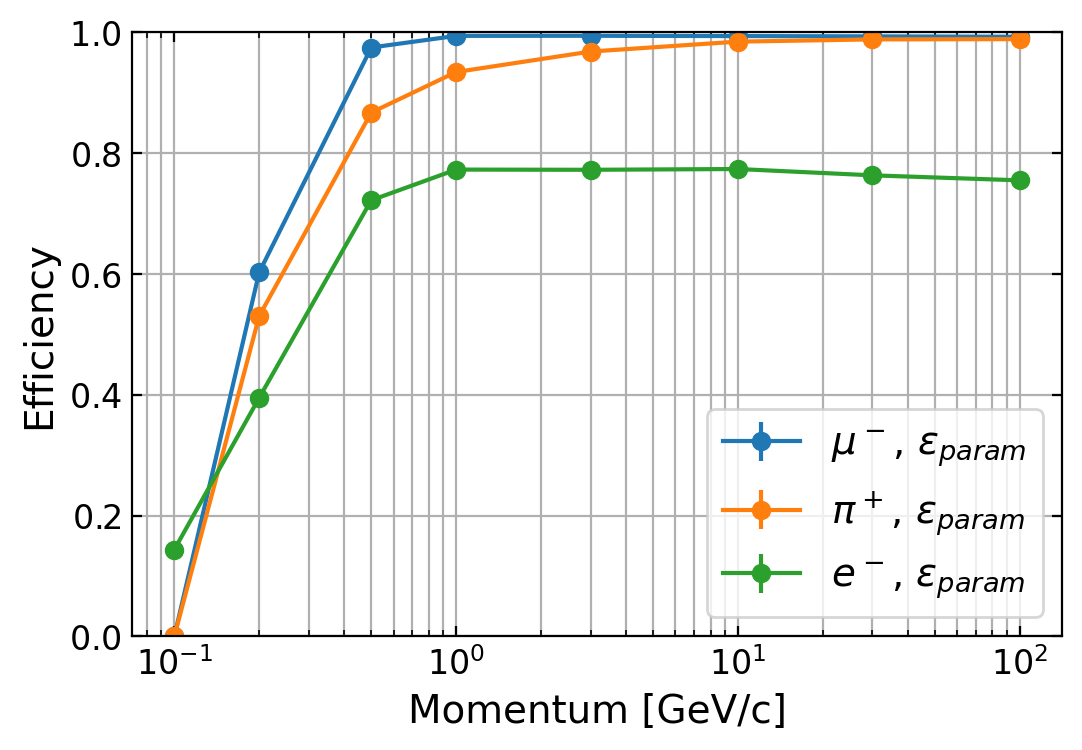

In [18]:
i_eff =5
for data_ind in range(len(name_list)):
    data_name = name_list[data_ind]
    PDG_TRUTH = pdgid_list[data_ind]
    
    results=joblib.load(f"data/plotdata_{data_name}_efficiency_resolution.joblib")
    energy_list = results["energy_list"]
    effs = results["efficiencies"]
    resolutions = results["resolutions"]
                          
                          
    # errorbar(energy_list, effs[:,2,0], yerr=(effs[:,2,1], effs[:,2,2]),fmt="o-")
    errorbar(energy_list, effs[:,i_eff,0], yerr=(effs[:,i_eff,1], effs[:,i_eff,2]),fmt="o-",label=name_list_latex[data_ind]+", $\epsilon_{param}$")
    
legend()
xscale("log")
ylim(0,1)
xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
grid(which="both")
savefig(f"Efficiency_e_mu_pi_EpsilonPARMA")
show()


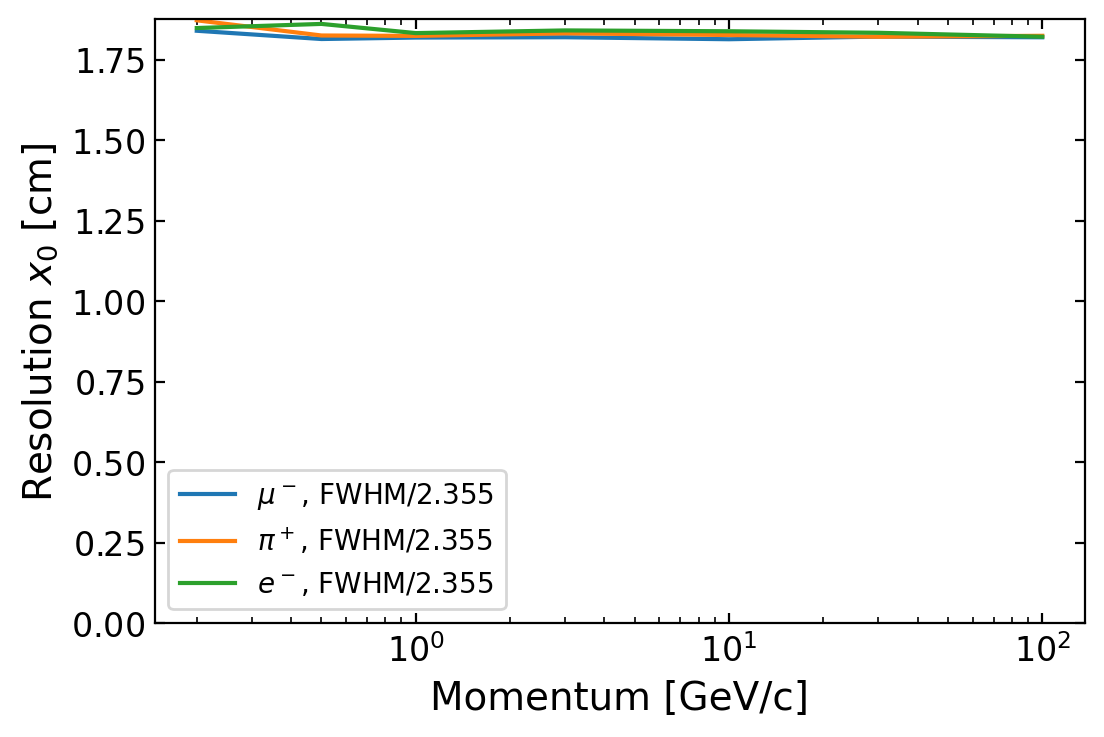

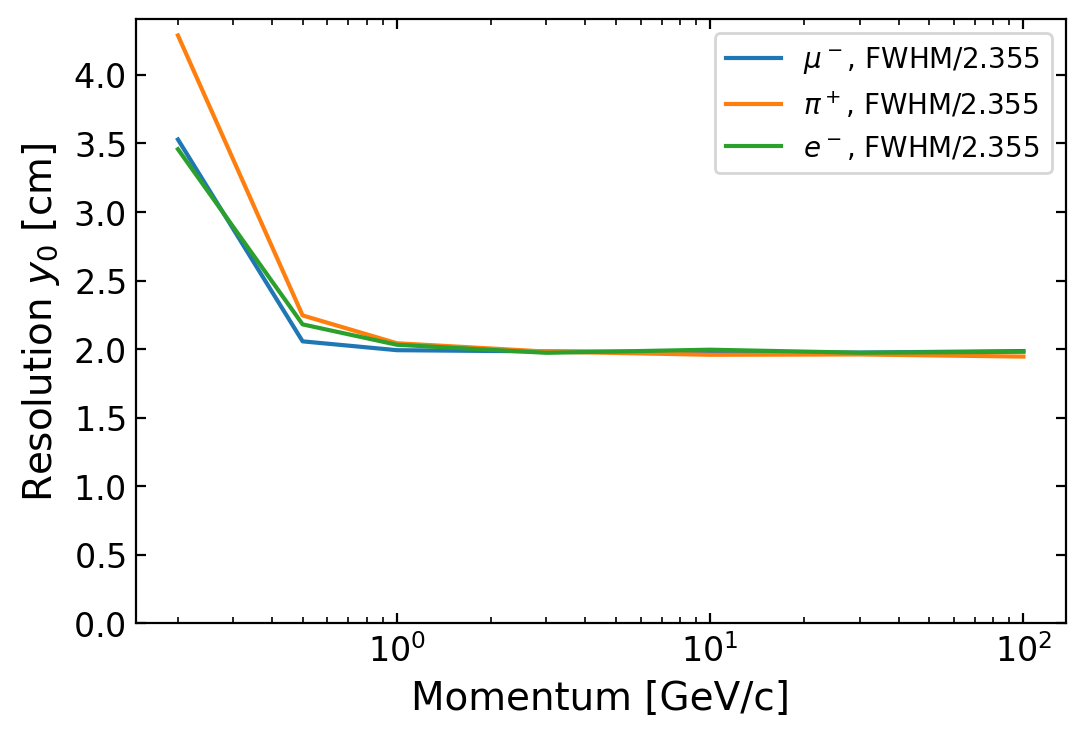

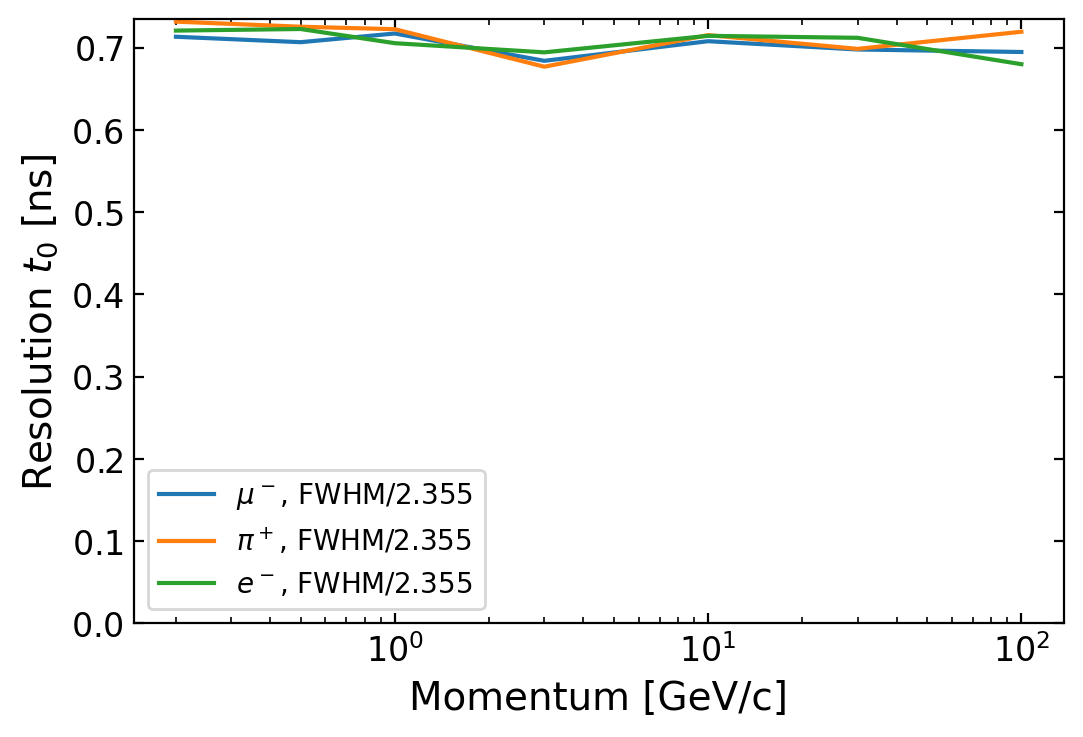

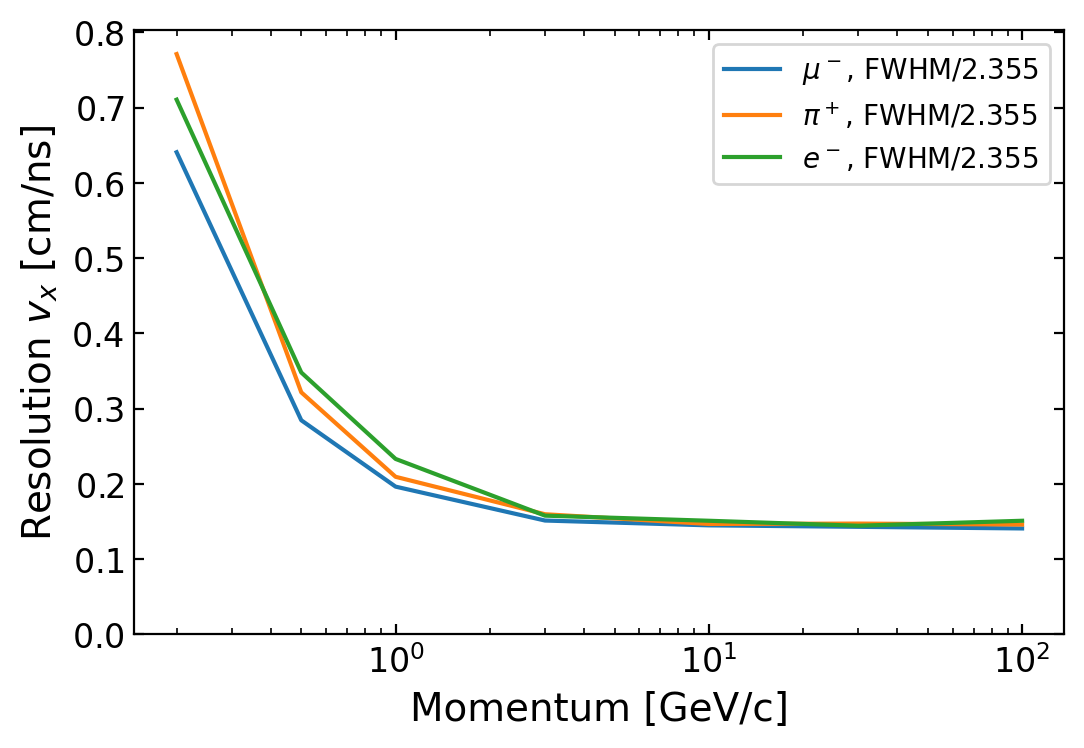

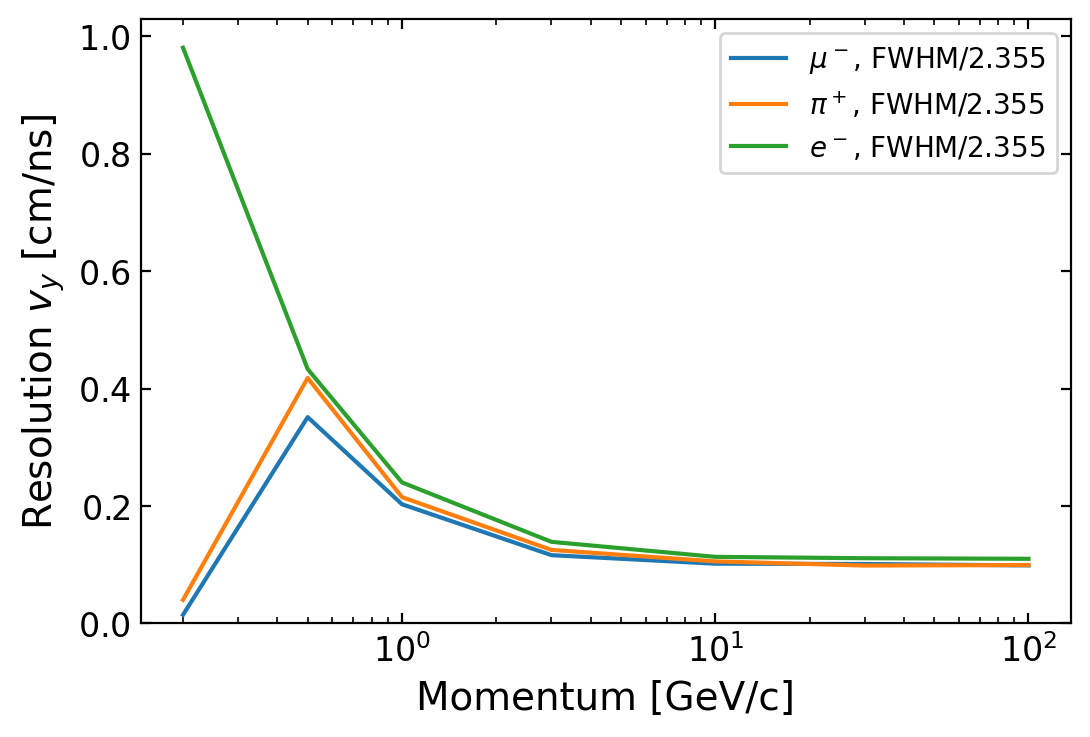

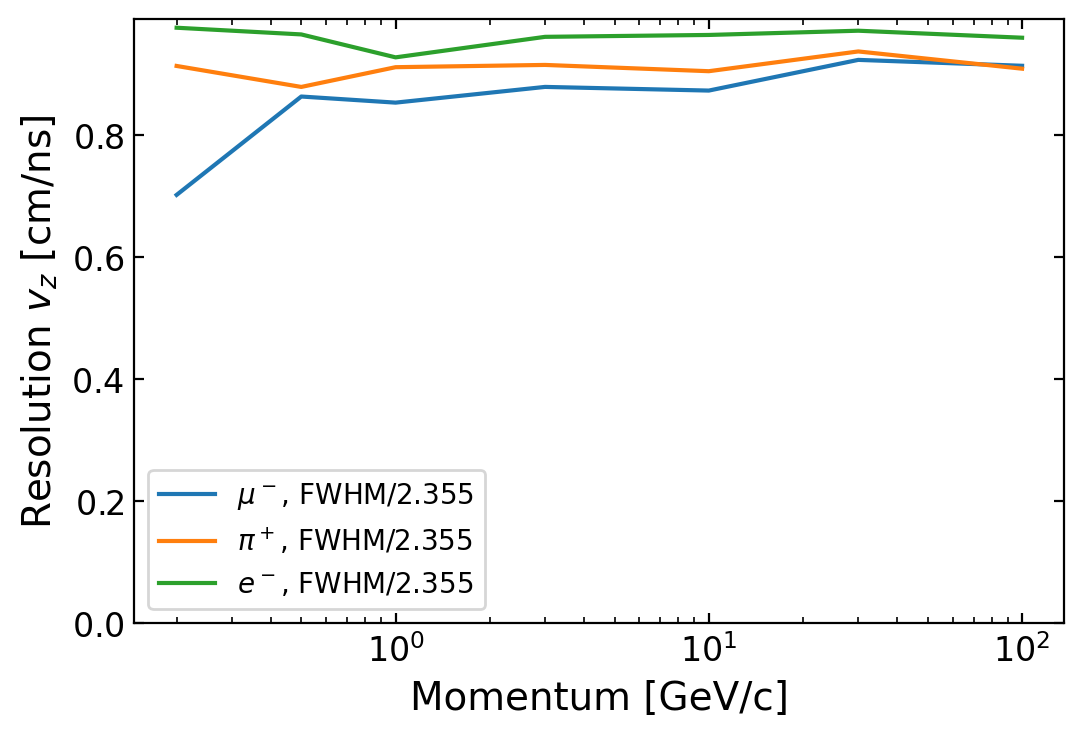

In [30]:
# Plot Resolution
resolutions = np.array(resolutions)
for i  in range(6):
    for data_ind in range(len(name_list)):
        data_name = name_list[data_ind]
        PDG_TRUTH = pdgid_list[data_ind]

        results=joblib.load(f"data/plotdata_{data_name}_efficiency_resolution.joblib")
        energy_list = results["energy_list"]
        effs = results["efficiencies"]
        resolutions = results["resolutions"]   
        
        # errorbar(energy_list[1:], resolutions[1:,0,i], yerr= resolutions[1:,1,i], label=name_list_latex[data_ind]+", $\sigma$",fmt="o--", capsize=3,color=f"C{data_ind}")
        plot(energy_list[1:], resolutions[1:,2,i]/2.355, label=name_list_latex[data_ind]+", FWHM/2.355",color=f"C{data_ind}") 
    xlabel("Momentum [GeV/c]")
    ylabel("Resolution "+PAR_LABELS[i])
    ylim(bottom=0)
    xscale("log")
    legend(fontsize=10)
    # savefig(f"Resolution_{data_name}_{PAR_LABELS_RAW[i]}")
    show()

In [15]:
# effs=[]
# resolutions=[]
# for i in range(len(energy_list)):
#     data=Data[i]
#     if i==0:
#         figs = plot_res_pull(data,              label=f"{energy_list[i]} GeV/c", make_legend=False,  plot_gauss1=False)
#     elif i==len(energy_list)-1:
#         figs = plot_res_pull(data, figs = figs, label=f"{energy_list[i]} GeV/c", make_legend=True,  plot_gauss1=True)
#     else:
#         figs = plot_res_pull(data, figs = figs, label=f"{energy_list[i]} GeV/c", make_legend=False,  plot_gauss1=False)
        
        
#     # Calculate efficiency
#     eff_i = calc_eff(data, PDG_TRUTH=PDG_TRUTH)
#     effs.append(eff_i)
    
#     # Calculate resolution
#     res_i = calc_resolution(data)
#     resolutions.append(res_i)


# # Save spectrum
# for i in range(6):
#     figure(figs[i])
#     savefig(f"Residual_Pull_{data_name}_{PAR_LABELS_RAW[INDS_PAR[i]]}")
#     show()
#     close() # Use close to not show figures again

    
# # Plot efficiency
# effs = np.array(effs)    
# errorbar(energy_list, effs[:,1,0], yerr=(effs[:,1,1], effs[:,1,2]),fmt="o-",label="$\epsilon_{abs, TIGHT}$")
# errorbar(energy_list, effs[:,2,0], yerr=(effs[:,2,1], effs[:,2,2]),fmt="o-",label="$\epsilon_{abs, LOOSER}$")
# errorbar(energy_list, effs[:,3,0], yerr=(effs[:,3,1], effs[:,3,2]),fmt=".-",color="grey", linewidth=2,label="$k_{reconstructible}$")
# legend()
# xscale("log")
# ylim(0,1)
# xlabel("Momentum [GeV/c]")
# ylabel("Efficiency")
# savefig(f"Efficiency_{data_name}")
# show()

# errorbar(energy_list, effs[:,3,0], yerr=(effs[:,3,1], effs[:,3,2]),fmt="o-",color="grey",label="$k_{reconstructible}$")
# errorbar(energy_list, effs[:,4,0], yerr=(effs[:,4,1], effs[:,4,2]),fmt="o--",color="C2",label="$\epsilon_{recog}$")
# errorbar(energy_list, effs[:,5,0], yerr=(effs[:,5,1], effs[:,5,2]),fmt=".:",color="C3", linewidth=2,label="$\epsilon_{param}$")
# legend()
# xscale("log")
# ylim(0,1)
# xlabel("Momentum [GeV/c]")
# ylabel("Efficiency")
# savefig(f"Efficiency_breakdown_{data_name}")
# show()


# # Plot Resolution
# resolutions = np.array(resolutions)
# for i  in range(6):
#     errorbar(energy_list[1:], resolutions[1:,0,i], yerr= resolutions[1:,1,i], label="$\sigma$",fmt="o--", capsize=3)
#     plot(energy_list[1:], resolutions[1:,2,i]/2.355, label="FWHM/2.355")
#     xlabel("Momentum [GeV/c]")
#     ylabel("Resolution "+PAR_LABELS[i])
#     ylim(bottom=0)
#     xscale("log")
#     legend()
#     savefig(f"Resolution_{data_name}_{PAR_LABELS_RAW[i]}")
#     show()